In [1]:
import sys
import os
from glob import glob
sys.path.append("../NEAT")
from NEATModels import NEATStatic, nets
from NEATModels.Staticconfig  import static_config
from NEATUtils import helpers
from NEATUtils.helpers import save_json, load_json
os.environ["CUDA_VISIBLE_DEVICES"]="0"
os.environ["HDF5_USE_FILE_LOCKING"] = "FALSE"

Using TensorFlow backend.


In [2]:
npz_directory = '/home/sancere/Kepler/Incucyte/dataSMALL/'
npz_name = 'Incucyte64.npz'
npz_val_name = 'Incucyte64Val.npz'


model_dir = '/home/sancere/Kepler/Incucyte/model/'
#Model name based on wether it is residual or sequntial ONEAT network
model_name = 'incucyteseqnetd38SMALL.h5'


In [3]:
static_categories_json = model_dir + 'StaticCategories.json'
key_categories = load_json(static_categories_json)
static_cord_json = model_dir + 'StaticCord.json'
key_cord = load_json(static_cord_json)

#For ORNET use residual = True and for OSNET use residual = False
residual = False
#NUmber of starting convolutional filters, is doubled down with increasing depth
startfilter = 48
#CNN network start layer, mid layers and lstm layer kernel size
start_kernel = 7
mid_kernel = 7
#Network depth has to be 9n + 2, n= 3 or 4 is optimal for Notum dataset
depth = 38
#Size of the gradient descent length vector, start small and use callbacks to get smaller when reaching the minima
learning_rate = 1.0E-6
#For stochastic gradient decent, the batch size used for computing the gradients
batch_size = 100
# use softmax for single event per box, sigmoid for multi event per box
multievent = False
# Trainng image size
yolo_v0 = True
show = True
#Training epochs, longer the better with proper chosen learning rate
epochs = 250
nboxes = 1
#The inbuilt model stride which is equal to the nulber of times image was downsampled by the network
stride = 4
show = True
imagex = 48
imagey = 48

In [4]:
config = static_config(npz_directory =npz_directory, npz_name = npz_name, npz_val_name = npz_val_name, 
                         key_categories = key_categories, key_cord = key_cord, 
                         residual = residual, depth = depth, start_kernel = start_kernel, stride = stride, mid_kernel = mid_kernel,
                         startfiler = startfilter, nboxes = nboxes, gridx = 1, gridy = 1, show = show,
                         epochs = epochs, learning_rate = learning_rate, imagex = imagex, imagey = imagey,
                         batch_size = batch_size, model_name = model_name, yolo_v0 = yolo_v0, multievent = multievent)

config_json = config.to_json()

print(config)
save_json(config_json, model_dir + os.path.splitext(model_name)[0] + '_Parameter.json')

static_config(batch_size=100, box_vector=2, categories=2, depth=38, epochs=250, gridx=1, gridy=1, imagex=48, imagey=48, key_categories={'Normal': 0, 'Cells': 1}, key_cord={'x': 0, 'y': 1}, learning_rate=1e-06, mid_kernel=7, model_name='incucyteseqnetd38SMALL.h5', multievent=False, nboxes=1, npz_directory='/home/sancere/Kepler/Incucyte/dataSMALL/', npz_name='Incucyte64.npz', npz_val_name='Incucyte64Val.npz', residual=False, show=True, start_kernel=7, startfilter=32, stride=(4,), yolo_v0=True)


number of  images:	 4059
image size (2D):		 (48, 48)
axes:				 SXYC
channels in / out:		 1
number of  images:	 214
image size (2D):		 (48, 48)
axes:				 SXYC
channels in / out:		 1
(4059, 1, 1, 4) 1














Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, None, 1 0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, None, None, 3 1600        input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, None, None, 3 128         conv2d_1[0][0]                   
_____________________________________________________________________________

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 4059 samples, validate on 214 samples
Epoch 1/250
4059/4059 [==============================] - 10s 2ms/step - loss: 1.2587 - acc: 0.6366 - val_loss: 1.2174 - val_acc: 0.7290

Epoch 00001: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 1.2173915722659816, 'val_acc': 0.7289719537039784, 'loss': 1.2586980110966357, 'acc': 0.6366100013623187, 'lr': 1e-06}


<Figure size 432x288 with 0 Axes>

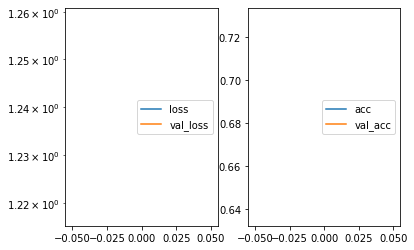

Predicted cell: Cells Probability: [[0.71184]]
True Cell type: Cells
x [[0.7417718]]
True positional value x 0.2916666666666667
y [[0.46257484]]
True positional value y 0.5


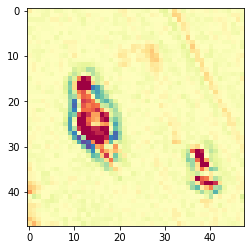

Epoch 2/250
4059/4059 [==============================] - 4s 1ms/step - loss: 1.1072 - acc: 0.7896 - val_loss: 1.0812 - val_acc: 0.7897

Epoch 00002: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 1.0812315723606358, 'val_acc': 0.7897196150271693, 'loss': 1.1071887882098272, 'acc': 0.7896033482294301, 'lr': 1e-06}


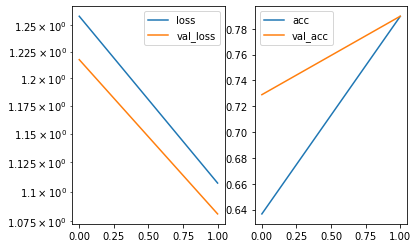

Predicted cell: Cells Probability: [[0.7957528]]
True Cell type: Cells
x [[0.31783462]]
True positional value x 0.2916666666666667
y [[0.23662233]]
True positional value y 0.2916666666666667


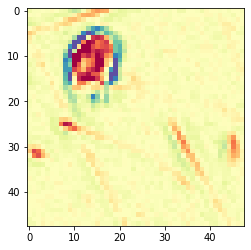

Epoch 3/250
4059/4059 [==============================] - 4s 1ms/step - loss: 0.9791 - acc: 0.8416 - val_loss: 1.0090 - val_acc: 0.8551

Epoch 00003: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 1.0089827508569877, 'val_acc': 0.8551401690901997, 'loss': 0.9790586108320245, 'acc': 0.8415865971408298, 'lr': 1e-06}


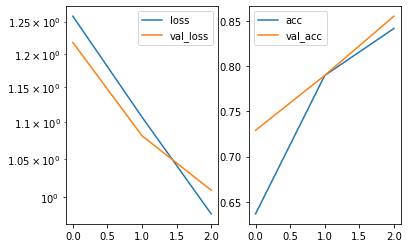

Predicted cell: Cells Probability: [[0.8120482]]
True Cell type: Cells
x [[0.33252746]]
True positional value x 0.7083333333333334
y [[0.7708936]]
True positional value y 0.7083333333333334


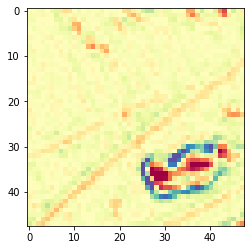

Epoch 4/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.9066 - acc: 0.8729 - val_loss: 0.9847 - val_acc: 0.8738

Epoch 00004: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.984685128537294, 'val_acc': 0.8738317762579874, 'loss': 0.9066248706157174, 'acc': 0.8728750881728177, 'lr': 1e-06}


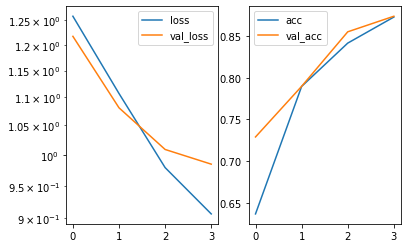

Predicted cell: Cells Probability: [[0.97644925]]
True Cell type: Cells
x [[0.41702157]]
True positional value x 0.2916666666666667
y [[0.81359065]]
True positional value y 0.7083333333333334


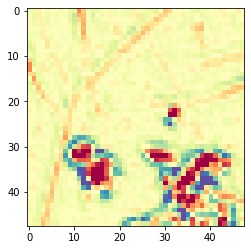

Epoch 5/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.8682 - acc: 0.8783 - val_loss: 0.9790 - val_acc: 0.8738

Epoch 00005: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.9789627027288775, 'val_acc': 0.8738317762579874, 'loss': 0.8682387586766553, 'acc': 0.8782951416097624, 'lr': 1e-06}


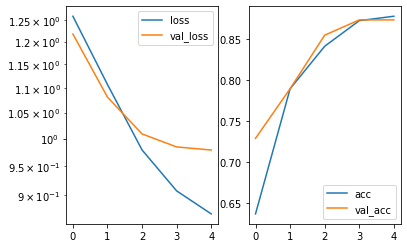

Predicted cell: Cells Probability: [[0.98952955]]
True Cell type: Cells
x [[0.65874034]]
True positional value x 0.7083333333333334
y [[0.17130896]]
True positional value y 0.5


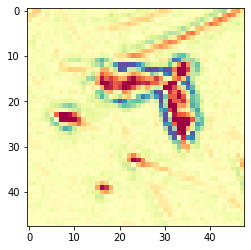

Epoch 6/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.8350 - acc: 0.8827 - val_loss: 0.9673 - val_acc: 0.8832

Epoch 00006: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.9672639046874002, 'val_acc': 0.8831775918185154, 'loss': 0.8349915187797631, 'acc': 0.8827297383560045, 'lr': 1e-06}


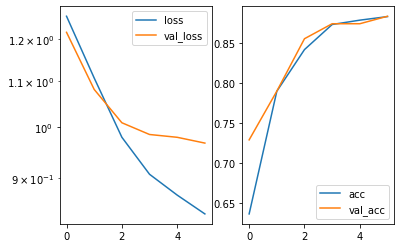

Predicted cell: Cells Probability: [[0.9606181]]
True Cell type: Cells
x [[0.6283457]]
True positional value x 0.7083333333333334
y [[0.18169391]]
True positional value y 0.2916666666666667


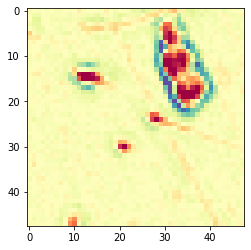

Epoch 7/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.8079 - acc: 0.8845 - val_loss: 0.9535 - val_acc: 0.8832

Epoch 00007: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.9534515181434489, 'val_acc': 0.8831775918185154, 'loss': 0.8079142750675204, 'acc': 0.884454301731667, 'lr': 1e-06}


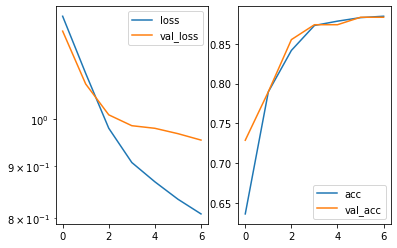

Predicted cell: Cells Probability: [[0.99460864]]
True Cell type: Cells
x [[0.48269856]]
True positional value x 0.7083333333333334
y [[0.35817558]]
True positional value y 0.2916666666666667


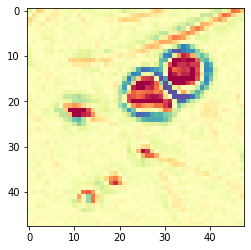

Epoch 8/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.7757 - acc: 0.8859 - val_loss: 0.9350 - val_acc: 0.8832

Epoch 00008: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.9350459709345738, 'val_acc': 0.8831775918185154, 'loss': 0.7757106040698256, 'acc': 0.8859324978472242, 'lr': 1e-06}


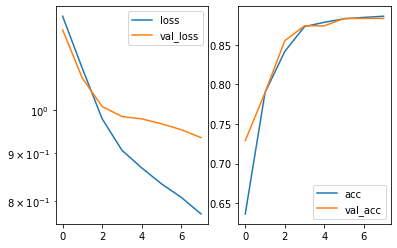

Predicted cell: Cells Probability: [[0.97173417]]
True Cell type: Cells
x [[0.6099088]]
True positional value x 0.2916666666666667
y [[0.394537]]
True positional value y 0.2916666666666667


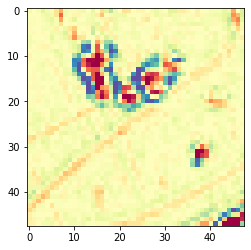

Epoch 9/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.7475 - acc: 0.8852 - val_loss: 0.9172 - val_acc: 0.8832

Epoch 00009: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.9171973723117436, 'val_acc': 0.8831775918185154, 'loss': 0.7475134687460124, 'acc': 0.8851933949215126, 'lr': 1e-06}


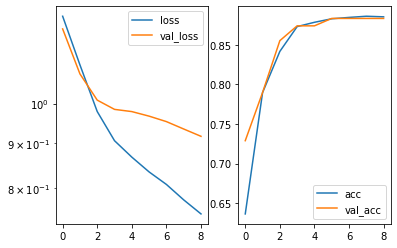

Predicted cell: Cells Probability: [[0.9930025]]
True Cell type: Cells
x [[0.48427257]]
True positional value x 0.7083333333333334
y [[0.3568428]]
True positional value y 0.2916666666666667


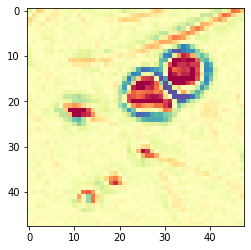

Epoch 10/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.7196 - acc: 0.8857 - val_loss: 0.9033 - val_acc: 0.8832

Epoch 00010: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.9032659023721642, 'val_acc': 0.8831775918185154, 'loss': 0.7196288185185415, 'acc': 0.8856861228630384, 'lr': 1e-06}


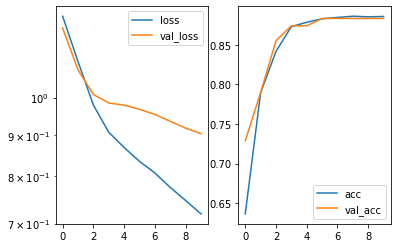

Predicted cell: Cells Probability: [[0.973942]]
True Cell type: Cells
x [[0.30961245]]
True positional value x 0.2916666666666667
y [[0.4435885]]
True positional value y 0.5


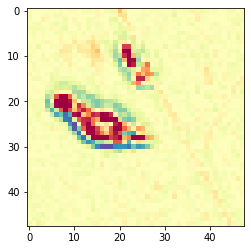

Epoch 11/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.6957 - acc: 0.8857 - val_loss: 0.8932 - val_acc: 0.8832

Epoch 00011: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.8931675558892366, 'val_acc': 0.8831775918185154, 'loss': 0.6956519262489352, 'acc': 0.8856861334065552, 'lr': 1e-06}


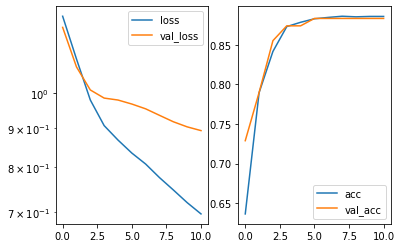

Predicted cell: Cells Probability: [[0.9358315]]
True Cell type: Cells
x [[0.69682986]]
True positional value x 0.5
y [[0.58115655]]
True positional value y 0.5


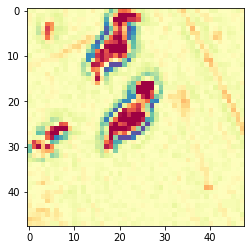

Epoch 12/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.6782 - acc: 0.8872 - val_loss: 0.8858 - val_acc: 0.8738

Epoch 00012: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.8857655792592842, 'val_acc': 0.8738317979830448, 'loss': 0.6781968804497118, 'acc': 0.8871643280096023, 'lr': 1e-06}


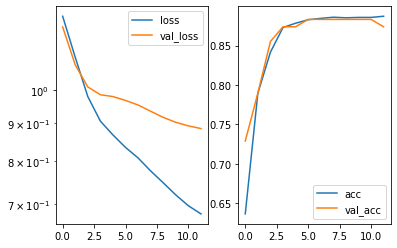

Predicted cell: Cells Probability: [[0.9703141]]
True Cell type: Cells
x [[0.6797524]]
True positional value x 0.7083333333333334
y [[0.6686036]]
True positional value y 0.7083333333333334


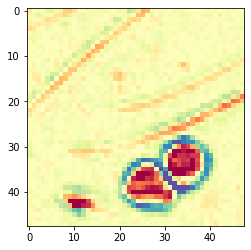

Epoch 13/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.6595 - acc: 0.8852 - val_loss: 0.8797 - val_acc: 0.8738

Epoch 00013: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.8796938919575414, 'val_acc': 0.8738317979830448, 'loss': 0.6595303154426362, 'acc': 0.8851933934824253, 'lr': 1e-06}


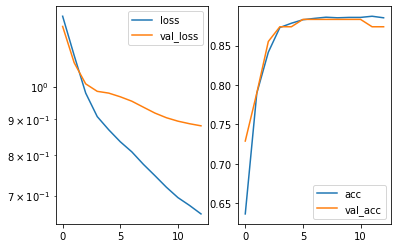

Predicted cell: Cells Probability: [[0.98358166]]
True Cell type: Cells
x [[0.71531504]]
True positional value x 0.2916666666666667
y [[0.84437966]]
True positional value y 0.7083333333333334


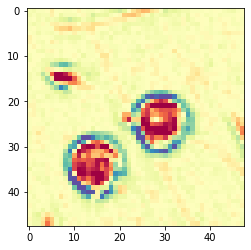

Epoch 14/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.6448 - acc: 0.8857 - val_loss: 0.8740 - val_acc: 0.8738

Epoch 00014: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.8739873705623306, 'val_acc': 0.8738317979830448, 'loss': 0.6448238797597798, 'acc': 0.8856861293242465, 'lr': 1e-06}


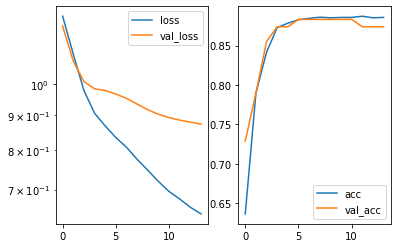

Predicted cell: Cells Probability: [[0.954108]]
True Cell type: Cells
x [[0.42769334]]
True positional value x 0.5
y [[0.74642026]]
True positional value y 0.7083333333333334


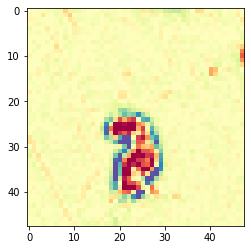

Epoch 15/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.6283 - acc: 0.8867 - val_loss: 0.8676 - val_acc: 0.8645

Epoch 00015: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.8676450029711857, 'val_acc': 0.8644859824225167, 'loss': 0.6282972198720341, 'acc': 0.8866715942383048, 'lr': 1e-06}


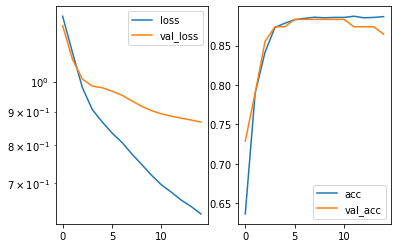

Predicted cell: Cells Probability: [[0.9814342]]
True Cell type: Cells
x [[0.8200994]]
True positional value x 0.7083333333333334
y [[0.3199409]]
True positional value y 0.2916666666666667


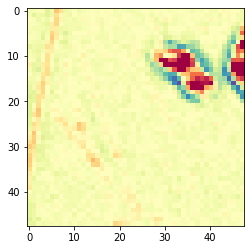

Epoch 16/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.6164 - acc: 0.8896 - val_loss: 0.8630 - val_acc: 0.8598

Epoch 00016: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.8629978588808362, 'val_acc': 0.8598130618300394, 'loss': 0.6164119708975655, 'acc': 0.8896279861023051, 'lr': 1e-06}


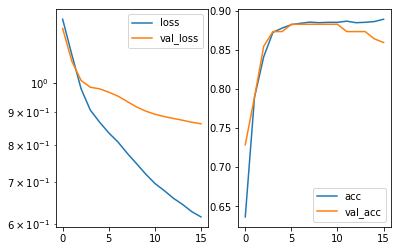

Predicted cell: Cells Probability: [[0.8695723]]
True Cell type: Normal
x [[0.8609525]]
True positional value x 0.5
y [[0.45775732]]
True positional value y 0.5


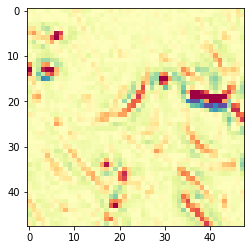

Epoch 17/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.6058 - acc: 0.8889 - val_loss: 0.8571 - val_acc: 0.8551

Epoch 00017: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.8571149160928815, 'val_acc': 0.8551401690901997, 'loss': 0.6058409149995077, 'acc': 0.8888888928977748, 'lr': 1e-06}


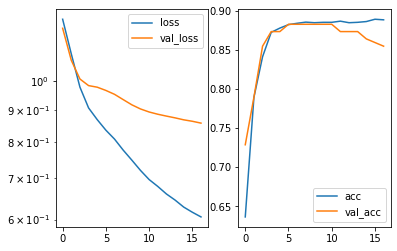

Predicted cell: Cells Probability: [[0.84326637]]
True Cell type: Cells
x [[0.3748837]]
True positional value x 0.7083333333333334
y [[0.7806043]]
True positional value y 0.7083333333333334


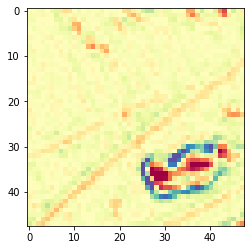

Epoch 18/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.5937 - acc: 0.8901 - val_loss: 0.8528 - val_acc: 0.8551

Epoch 00018: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.852829523732729, 'val_acc': 0.8551401690901997, 'loss': 0.5936961076505727, 'acc': 0.8901207207693611, 'lr': 1e-06}


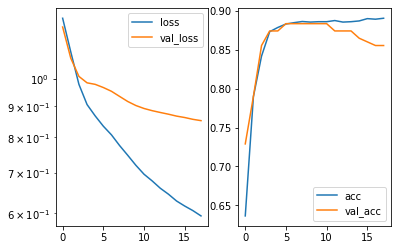

Predicted cell: Cells Probability: [[0.9774606]]
True Cell type: Cells
x [[0.7091103]]
True positional value x 0.5
y [[0.25991148]]
True positional value y 0.7083333333333334


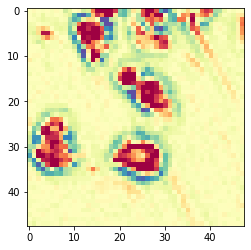

Epoch 19/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.5791 - acc: 0.8958 - val_loss: 0.8478 - val_acc: 0.8551

Epoch 00019: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.847805242115092, 'val_acc': 0.8551401690901997, 'loss': 0.5791262925684408, 'acc': 0.8957871385882364, 'lr': 1e-06}


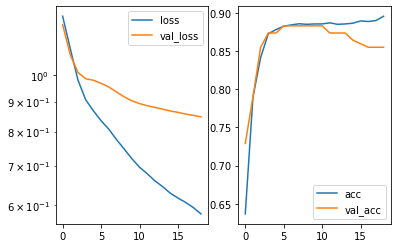

Predicted cell: Cells Probability: [[0.9128095]]
True Cell type: Cells
x [[0.5677614]]
True positional value x 0.2916666666666667
y [[0.57901967]]
True positional value y 0.5


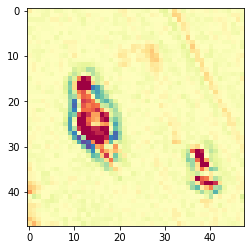

Epoch 20/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.5733 - acc: 0.8950 - val_loss: 0.8438 - val_acc: 0.8551

Epoch 00020: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.8438037739735897, 'val_acc': 0.8551401690901997, 'loss': 0.573298808902201, 'acc': 0.8950480427698538, 'lr': 1e-06}


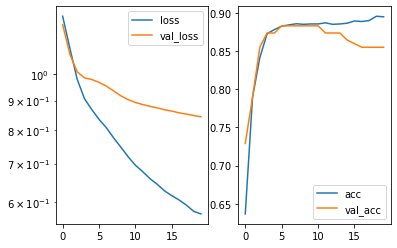

Predicted cell: Cells Probability: [[0.9126705]]
True Cell type: Cells
x [[0.56870914]]
True positional value x 0.2916666666666667
y [[0.58472216]]
True positional value y 0.5


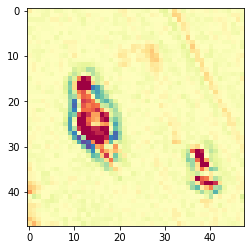

Epoch 21/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.5617 - acc: 0.9005 - val_loss: 0.8394 - val_acc: 0.8598

Epoch 00021: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.8393653720338768, 'val_acc': 0.8598130618300394, 'loss': 0.5616887422816804, 'acc': 0.9004680964858052, 'lr': 1e-06}


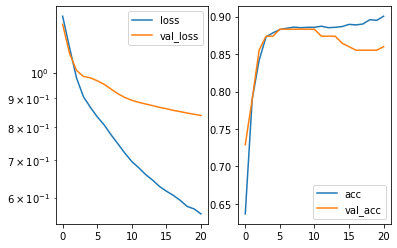

Predicted cell: Cells Probability: [[0.97439903]]
True Cell type: Cells
x [[0.5458639]]
True positional value x 0.2916666666666667
y [[0.162685]]
True positional value y 0.2916666666666667


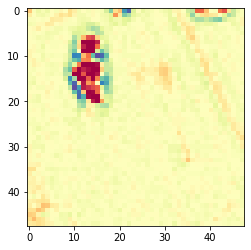

Epoch 22/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.5543 - acc: 0.9037 - val_loss: 0.8360 - val_acc: 0.8645

Epoch 00022: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.836035289497019, 'val_acc': 0.8644859824225167, 'loss': 0.5542867430973358, 'acc': 0.903670858326555, 'lr': 1e-06}


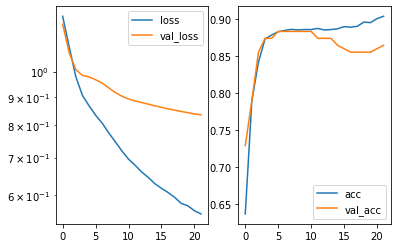

Predicted cell: Cells Probability: [[0.96501666]]
True Cell type: Cells
x [[0.39987797]]
True positional value x 0.5
y [[0.4861518]]
True positional value y 0.5


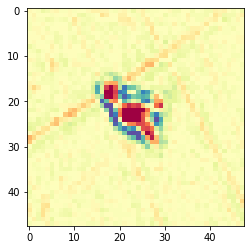

Epoch 23/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.5478 - acc: 0.9069 - val_loss: 0.8323 - val_acc: 0.8645

Epoch 00023: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.832269581121819, 'val_acc': 0.8644859824225167, 'loss': 0.5477725010283565, 'acc': 0.906873613999788, 'lr': 1e-06}


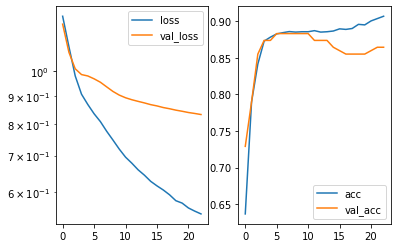

Predicted cell: Cells Probability: [[0.9294117]]
True Cell type: Cells
x [[0.32215786]]
True positional value x 0.2916666666666667
y [[0.6392785]]
True positional value y 0.7083333333333334


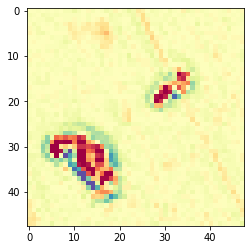

Epoch 24/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.5367 - acc: 0.9145 - val_loss: 0.8297 - val_acc: 0.8645

Epoch 00024: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.8296653812176713, 'val_acc': 0.8644859824225167, 'loss': 0.5367299280280579, 'acc': 0.9145109651710752, 'lr': 1e-06}


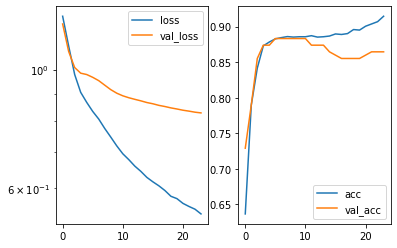

Predicted cell: Cells Probability: [[0.93300885]]
True Cell type: Cells
x [[0.3310427]]
True positional value x 0.2916666666666667
y [[0.6392235]]
True positional value y 0.7083333333333334


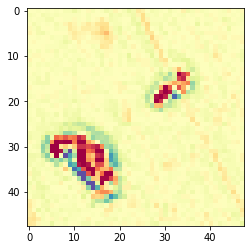

Epoch 25/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.5335 - acc: 0.9194 - val_loss: 0.8263 - val_acc: 0.8645

Epoch 00025: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.8263340369563237, 'val_acc': 0.8644859824225167, 'loss': 0.533518054870644, 'acc': 0.9194382863345478, 'lr': 1e-06}


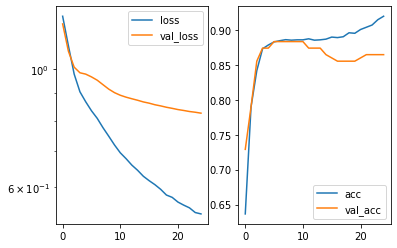

Predicted cell: Cells Probability: [[0.9968016]]
True Cell type: Cells
x [[0.58409023]]
True positional value x 0.5
y [[0.23936407]]
True positional value y 0.2916666666666667


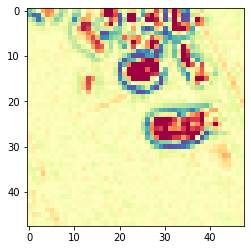

Epoch 26/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.5250 - acc: 0.9209 - val_loss: 0.8239 - val_acc: 0.8645

Epoch 00026: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.8238551817207693, 'val_acc': 0.8644859824225167, 'loss': 0.5249850443062097, 'acc': 0.9209164818039842, 'lr': 1e-06}


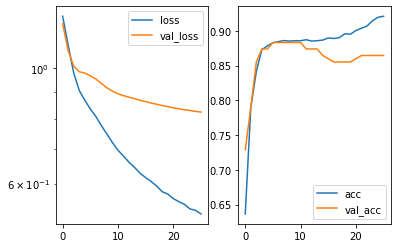

Predicted cell: Cells Probability: [[0.934627]]
True Cell type: Cells
x [[0.49004582]]
True positional value x 0.2916666666666667
y [[0.33774883]]
True positional value y 0.7083333333333334


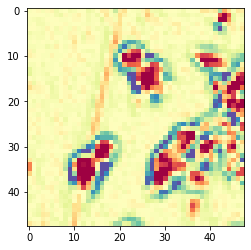

Epoch 27/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.5235 - acc: 0.9231 - val_loss: 0.8216 - val_acc: 0.8645

Epoch 00027: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.8216450164251239, 'val_acc': 0.8644859824225167, 'loss': 0.5235310315380957, 'acc': 0.9231337778349175, 'lr': 1e-06}


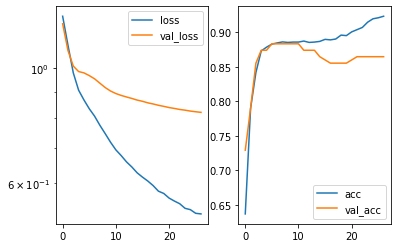

Predicted cell: Cells Probability: [[0.5671065]]
True Cell type: Normal
x [[0.3250413]]
True positional value x 0.5
y [[0.5930616]]
True positional value y 0.5


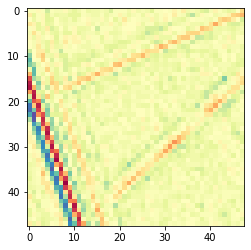

Epoch 28/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.5130 - acc: 0.9298 - val_loss: 0.8189 - val_acc: 0.8645

Epoch 00028: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.8188876565371719, 'val_acc': 0.8644859824225167, 'loss': 0.5130007857464605, 'acc': 0.9297856605972201, 'lr': 1e-06}


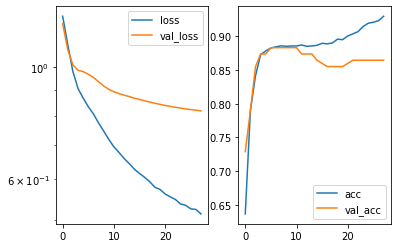

Predicted cell: Cells Probability: [[0.8837012]]
True Cell type: Cells
x [[0.640098]]
True positional value x 0.5
y [[0.5903626]]
True positional value y 0.5


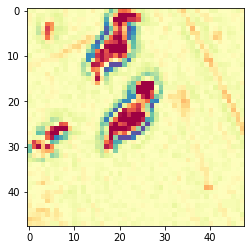

Epoch 29/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.5089 - acc: 0.9322 - val_loss: 0.8165 - val_acc: 0.8645

Epoch 00029: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.8164553876235107, 'val_acc': 0.8644859824225167, 'loss': 0.5088575523191556, 'acc': 0.9322493230659229, 'lr': 1e-06}


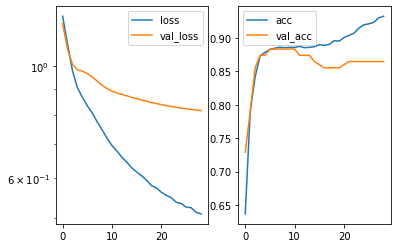

Predicted cell: Cells Probability: [[0.80805045]]
True Cell type: Cells
x [[0.80885255]]
True positional value x 0.7083333333333334
y [[0.41627702]]
True positional value y 0.2916666666666667


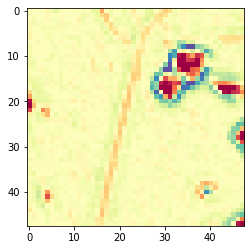

Epoch 30/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.5043 - acc: 0.9347 - val_loss: 0.8142 - val_acc: 0.8692

Epoch 00030: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.8141987808396883, 'val_acc': 0.8691588773905674, 'loss': 0.5042703654135234, 'acc': 0.934712983772478, 'lr': 1e-06}


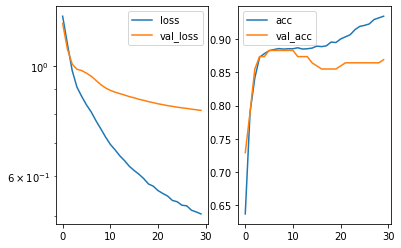

Predicted cell: Cells Probability: [[0.7340284]]
True Cell type: Normal
x [[0.39512894]]
True positional value x 0.5
y [[0.5671479]]
True positional value y 0.5


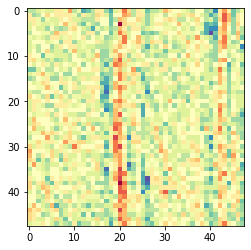

Epoch 31/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.5007 - acc: 0.9396 - val_loss: 0.8115 - val_acc: 0.8692

Epoch 00031: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.8114660075891797, 'val_acc': 0.8691588773905674, 'loss': 0.5006779208210308, 'acc': 0.9396403089888903, 'lr': 1e-06}


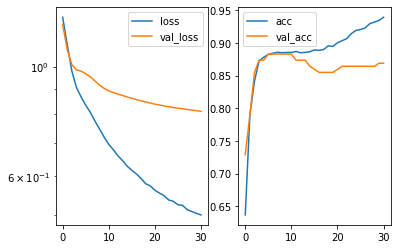

Predicted cell: Cells Probability: [[0.98308736]]
True Cell type: Cells
x [[0.7000947]]
True positional value x 0.2916666666666667
y [[0.8350937]]
True positional value y 0.7083333333333334


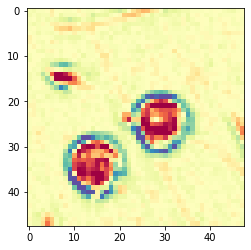

Epoch 32/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.4912 - acc: 0.9428 - val_loss: 0.8097 - val_acc: 0.8692

Epoch 00032: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.8096514895697621, 'val_acc': 0.8691588773905674, 'loss': 0.4911661564672366, 'acc': 0.9428430658222038, 'lr': 1e-06}


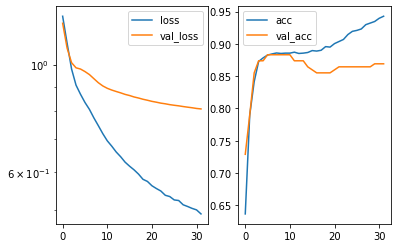

Predicted cell: Cells Probability: [[0.96693856]]
True Cell type: Cells
x [[0.47225797]]
True positional value x 0.5
y [[0.5607552]]
True positional value y 0.2916666666666667


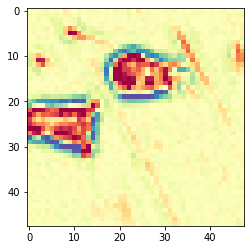

Epoch 33/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.4885 - acc: 0.9456 - val_loss: 0.8072 - val_acc: 0.8692

Epoch 00033: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.8071810241057494, 'val_acc': 0.8691588773905674, 'loss': 0.4885351996346629, 'acc': 0.9455530947433607, 'lr': 1e-06}


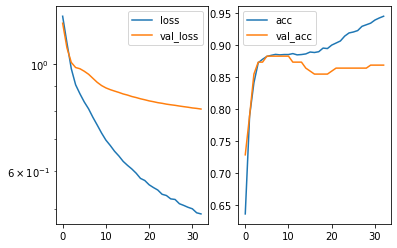

Predicted cell: Cells Probability: [[0.98792505]]
True Cell type: Cells
x [[0.5048532]]
True positional value x 0.5
y [[0.17915936]]
True positional value y 0.2916666666666667


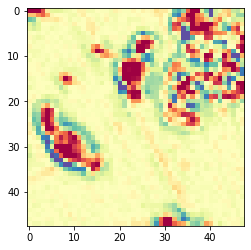

Epoch 34/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.4884 - acc: 0.9475 - val_loss: 0.8052 - val_acc: 0.8692

Epoch 00034: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.8052318653213644, 'val_acc': 0.8691588773905674, 'loss': 0.4884286048627305, 'acc': 0.947524025790296, 'lr': 1e-06}


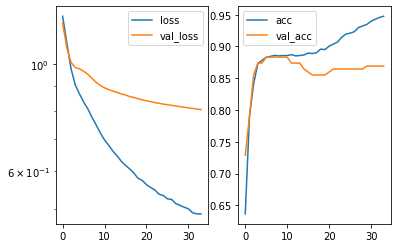

Predicted cell: Cells Probability: [[0.9686046]]
True Cell type: Cells
x [[0.2548664]]
True positional value x 0.2916666666666667
y [[0.24190335]]
True positional value y 0.5


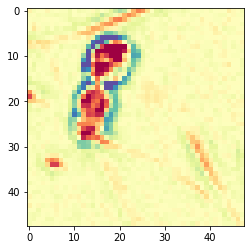

Epoch 35/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.4845 - acc: 0.9515 - val_loss: 0.8035 - val_acc: 0.8692

Epoch 00035: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.8035364206706253, 'val_acc': 0.8691588773905674, 'loss': 0.48454056519773625, 'acc': 0.9514658816725963, 'lr': 1e-06}


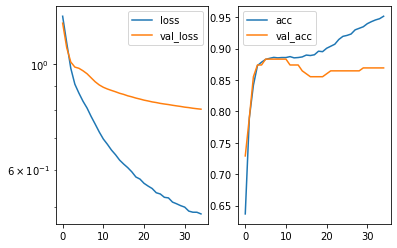

Predicted cell: Cells Probability: [[0.910529]]
True Cell type: Cells
x [[0.27004352]]
True positional value x 0.2916666666666667
y [[0.3212932]]
True positional value y 0.2916666666666667


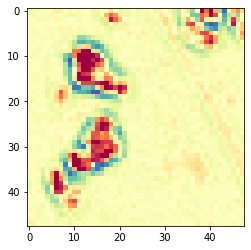

Epoch 36/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.4779 - acc: 0.9561 - val_loss: 0.8014 - val_acc: 0.8692

Epoch 00036: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.8014063874137736, 'val_acc': 0.8691588773905674, 'loss': 0.4778728339877085, 'acc': 0.9561468372500039, 'lr': 1e-06}


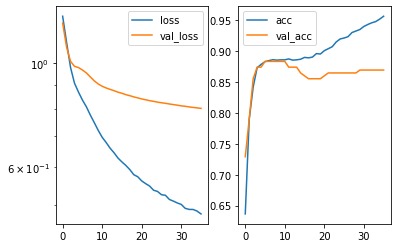

Predicted cell: Cells Probability: [[0.98070383]]
True Cell type: Cells
x [[0.6305705]]
True positional value x 0.7083333333333334
y [[0.63692385]]
True positional value y 0.5


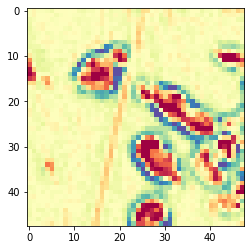

Epoch 37/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.4764 - acc: 0.9601 - val_loss: 0.7998 - val_acc: 0.8692

Epoch 00037: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.7998308500396871, 'val_acc': 0.8691588773905674, 'loss': 0.47636614823229767, 'acc': 0.9600886981250559, 'lr': 1e-06}


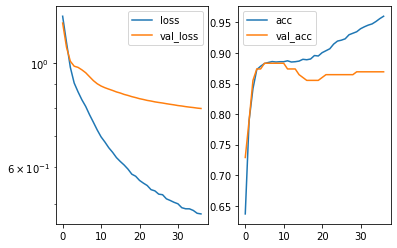

Predicted cell: Cells Probability: [[0.9651562]]
True Cell type: Cells
x [[0.3485249]]
True positional value x 0.5
y [[0.07351998]]
True positional value y 0.2916666666666667


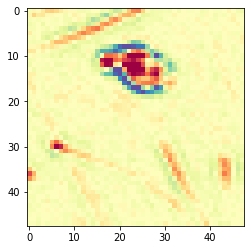

Epoch 38/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.4730 - acc: 0.9581 - val_loss: 0.7985 - val_acc: 0.8692

Epoch 00038: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.7984927040394222, 'val_acc': 0.8691588773905674, 'loss': 0.47302044855752406, 'acc': 0.9581177627021205, 'lr': 1e-06}


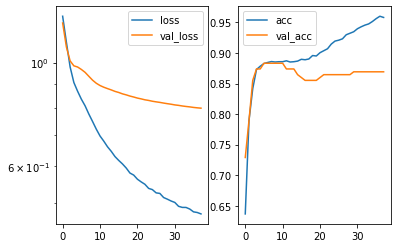

Predicted cell: Cells Probability: [[0.9643943]]
True Cell type: Cells
x [[0.47122183]]
True positional value x 0.2916666666666667
y [[0.38106632]]
True positional value y 0.5


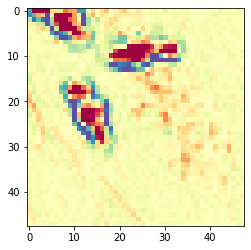

Epoch 39/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.4665 - acc: 0.9638 - val_loss: 0.7971 - val_acc: 0.8692

Epoch 00039: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.79709020730491, 'val_acc': 0.8691588773905674, 'loss': 0.46653980183378174, 'acc': 0.9637841878779624, 'lr': 1e-06}


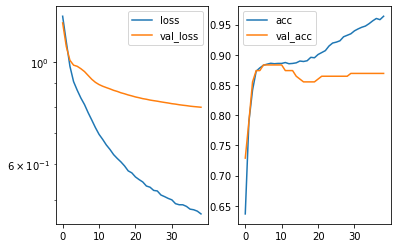

Predicted cell: Cells Probability: [[0.99744844]]
True Cell type: Cells
x [[0.8484356]]
True positional value x 0.7083333333333334
y [[0.6126564]]
True positional value y 0.5


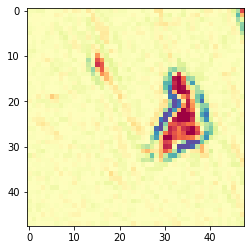

Epoch 40/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.4632 - acc: 0.9665 - val_loss: 0.7958 - val_acc: 0.8692

Epoch 00040: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.7958315789142502, 'val_acc': 0.8691588773905674, 'loss': 0.4632434628813923, 'acc': 0.9664942200150387, 'lr': 1e-06}


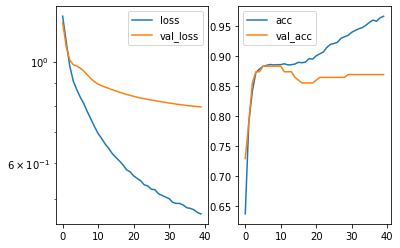

Predicted cell: Cells Probability: [[0.8293481]]
True Cell type: Cells
x [[0.8075366]]
True positional value x 0.7083333333333334
y [[0.41785508]]
True positional value y 0.2916666666666667


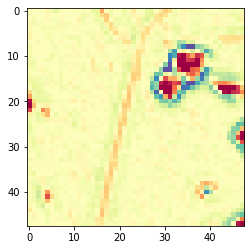

Epoch 41/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.4633 - acc: 0.9672 - val_loss: 0.7941 - val_acc: 0.8738

Epoch 00041: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.7940706426852218, 'val_acc': 0.873831770130407, 'loss': 0.4632728346597094, 'acc': 0.9672333102679717, 'lr': 1e-06}


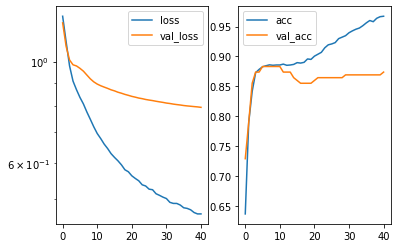

Predicted cell: Cells Probability: [[0.96668667]]
True Cell type: Cells
x [[0.34075007]]
True positional value x 0.5
y [[0.07534734]]
True positional value y 0.2916666666666667


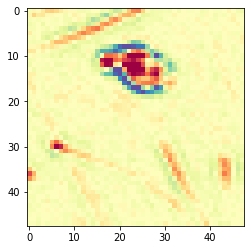

Epoch 42/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.4624 - acc: 0.9660 - val_loss: 0.7922 - val_acc: 0.8785

Epoch 00042: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.792207178668441, 'val_acc': 0.8785046907228844, 'loss': 0.4624325629157602, 'acc': 0.9660014862290566, 'lr': 1e-06}


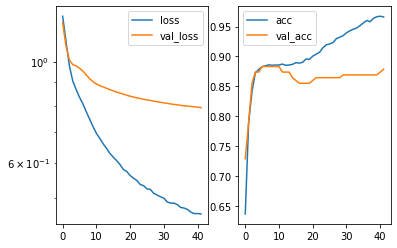

Predicted cell: Cells Probability: [[0.84456646]]
True Cell type: Cells
x [[0.38128248]]
True positional value x 0.7083333333333334
y [[0.7838099]]
True positional value y 0.7083333333333334


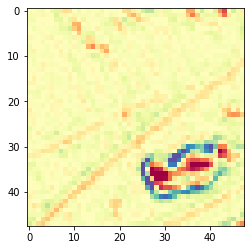

Epoch 43/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.4579 - acc: 0.9695 - val_loss: 0.7905 - val_acc: 0.8785

Epoch 00043: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.7905287486370479, 'val_acc': 0.8785046907228844, 'loss': 0.4578916052639499, 'acc': 0.9694506109685961, 'lr': 1e-06}


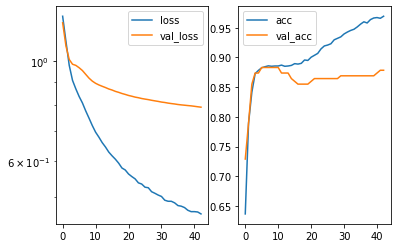

Predicted cell: Cells Probability: [[0.9356418]]
True Cell type: Cells
x [[0.1312876]]
True positional value x 0.2916666666666667
y [[0.66832125]]
True positional value y 0.7083333333333334


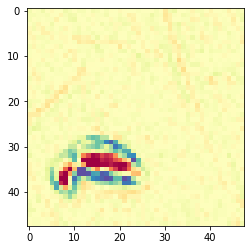

Epoch 44/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.4509 - acc: 0.9744 - val_loss: 0.7893 - val_acc: 0.8785

Epoch 00044: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.7892833118126771, 'val_acc': 0.8785046907228844, 'loss': 0.45089723217161337, 'acc': 0.9743779359206862, 'lr': 1e-06}


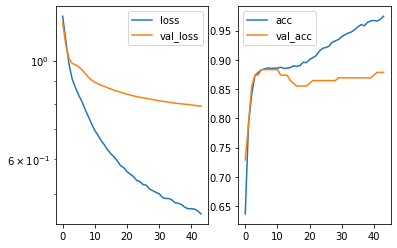

Predicted cell: Cells Probability: [[0.8417733]]
True Cell type: Cells
x [[0.35630524]]
True positional value x 0.2916666666666667
y [[0.2966087]]
True positional value y 0.2916666666666667


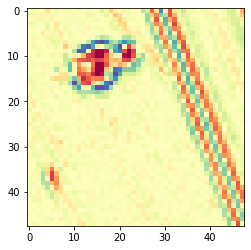

Epoch 45/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.4517 - acc: 0.9746 - val_loss: 0.7884 - val_acc: 0.8785

Epoch 00045: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.7883969974295001, 'val_acc': 0.8785046907228844, 'loss': 0.451712311812004, 'acc': 0.9746243056184289, 'lr': 1e-06}


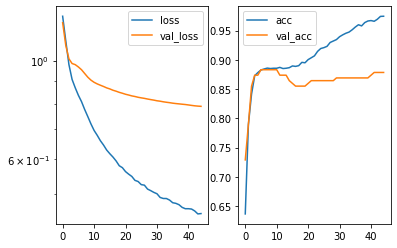

Predicted cell: Cells Probability: [[0.9947825]]
True Cell type: Cells
x [[0.58131444]]
True positional value x 0.7083333333333334
y [[0.418084]]
True positional value y 0.2916666666666667


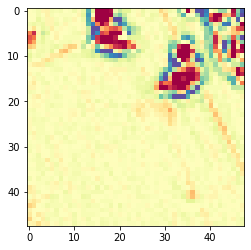

Epoch 46/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.4484 - acc: 0.9761 - val_loss: 0.7868 - val_acc: 0.8785

Epoch 00046: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.7867894880125456, 'val_acc': 0.8785046907228844, 'loss': 0.4484323802238675, 'acc': 0.9761024987530197, 'lr': 1e-06}


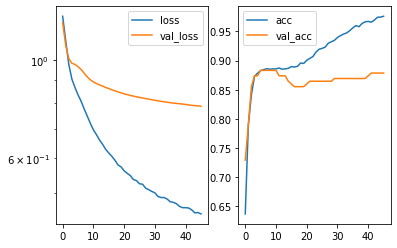

Predicted cell: Cells Probability: [[0.9381331]]
True Cell type: Cells
x [[0.37244728]]
True positional value x 0.7083333333333334
y [[0.7293021]]
True positional value y 0.5


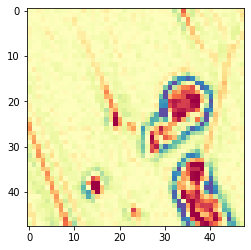

Epoch 47/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.4450 - acc: 0.9766 - val_loss: 0.7861 - val_acc: 0.8785

Epoch 00047: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.7861074760695484, 'val_acc': 0.8785046907228844, 'loss': 0.4450053481610428, 'acc': 0.9765952290147065, 'lr': 1e-06}


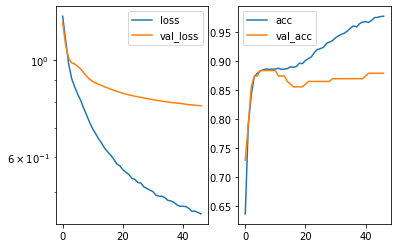

Predicted cell: Cells Probability: [[0.98769623]]
True Cell type: Cells
x [[0.5750751]]
True positional value x 0.5
y [[0.66306716]]
True positional value y 0.7083333333333334


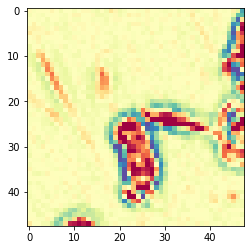

Epoch 48/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.4434 - acc: 0.9786 - val_loss: 0.7848 - val_acc: 0.8785

Epoch 00048: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.7848220244746342, 'val_acc': 0.8785046907228844, 'loss': 0.44338339504040825, 'acc': 0.9785661591511989, 'lr': 1e-06}


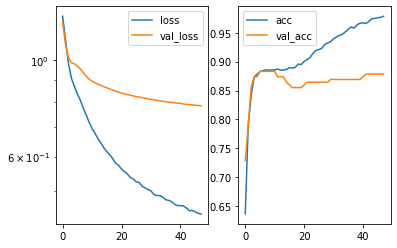

Predicted cell: Cells Probability: [[0.9780698]]
True Cell type: Cells
x [[0.3364302]]
True positional value x 0.2916666666666667
y [[0.45706087]]
True positional value y 0.2916666666666667


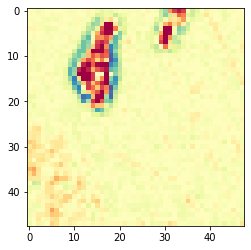

Epoch 49/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.4398 - acc: 0.9798 - val_loss: 0.7841 - val_acc: 0.8785

Epoch 00049: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.7840665216757873, 'val_acc': 0.8785046907228844, 'loss': 0.43980983577358457, 'acc': 0.9797979896660067, 'lr': 1e-06}


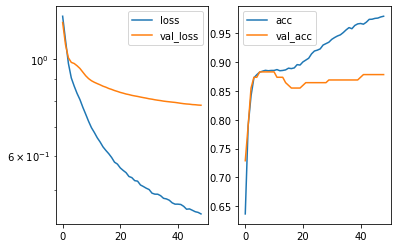

Predicted cell: Cells Probability: [[0.93524647]]
True Cell type: Cells
x [[0.57505834]]
True positional value x 0.2916666666666667
y [[0.47421253]]
True positional value y 0.2916666666666667


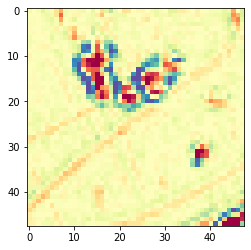

Epoch 50/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.4395 - acc: 0.9803 - val_loss: 0.7828 - val_acc: 0.8785

Epoch 00050: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.7827951484751479, 'val_acc': 0.8785046907228844, 'loss': 0.4395072455622346, 'acc': 0.9802907246120695, 'lr': 1e-06}


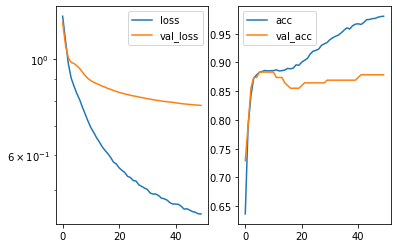

Predicted cell: Cells Probability: [[0.96471447]]
True Cell type: Cells
x [[0.45874944]]
True positional value x 0.2916666666666667
y [[0.6706849]]
True positional value y 0.7083333333333334


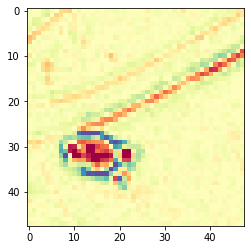

Epoch 51/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.4399 - acc: 0.9793 - val_loss: 0.7815 - val_acc: 0.8832

Epoch 00051: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.7815373116564528, 'val_acc': 0.883177583462724, 'loss': 0.43988412148731043, 'acc': 0.9793052567464138, 'lr': 1e-06}


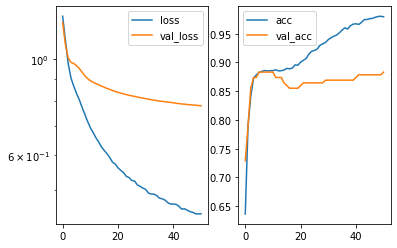

Predicted cell: Cells Probability: [[0.9036904]]
True Cell type: Cells
x [[0.4946833]]
True positional value x 0.7083333333333334
y [[0.31577566]]
True positional value y 0.2916666666666667


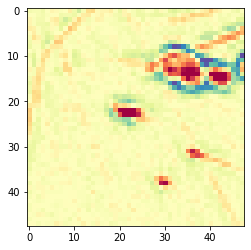

Epoch 52/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.4349 - acc: 0.9823 - val_loss: 0.7804 - val_acc: 0.8832

Epoch 00052: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.7804441724982217, 'val_acc': 0.883177583462724, 'loss': 0.43491097178973714, 'acc': 0.9822616515326423, 'lr': 1e-06}


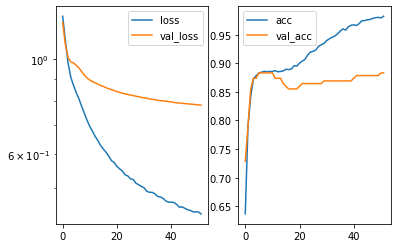

Predicted cell: Cells Probability: [[0.8517173]]
True Cell type: Cells
x [[0.38035247]]
True positional value x 0.7083333333333334
y [[0.7786121]]
True positional value y 0.7083333333333334


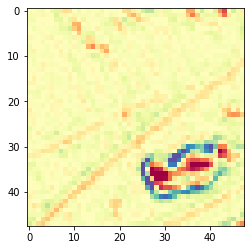

Epoch 53/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.4325 - acc: 0.9845 - val_loss: 0.7800 - val_acc: 0.8832

Epoch 00053: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.7799767740418978, 'val_acc': 0.883177583462724, 'loss': 0.4325295590391063, 'acc': 0.9844789443182869, 'lr': 1e-06}


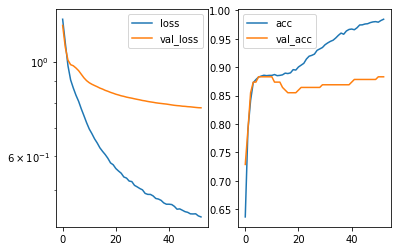

Predicted cell: Cells Probability: [[0.98135835]]
True Cell type: Cells
x [[0.4694746]]
True positional value x 0.2916666666666667
y [[0.20602618]]
True positional value y 0.2916666666666667


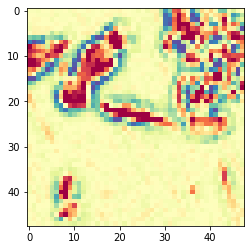

Epoch 54/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.4319 - acc: 0.9847 - val_loss: 0.7789 - val_acc: 0.8879

Epoch 00054: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.7788580199268377, 'val_acc': 0.8878504762025637, 'loss': 0.4319438410380933, 'acc': 0.9847253131202712, 'lr': 1e-06}


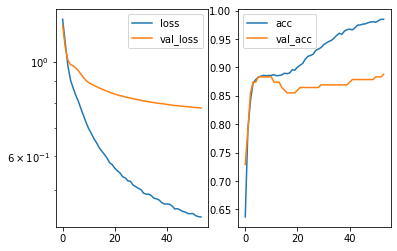

Predicted cell: Cells Probability: [[0.8138172]]
True Cell type: Cells
x [[0.51443774]]
True positional value x 0.2916666666666667
y [[0.49034533]]
True positional value y 0.7083333333333334


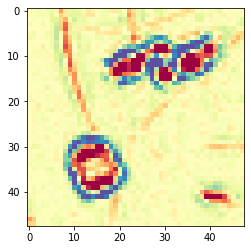

Epoch 55/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.4301 - acc: 0.9850 - val_loss: 0.7782 - val_acc: 0.8879

Epoch 00055: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.7781905403761106, 'val_acc': 0.8878504762025637, 'loss': 0.43008681424705525, 'acc': 0.9849716780895845, 'lr': 1e-06}


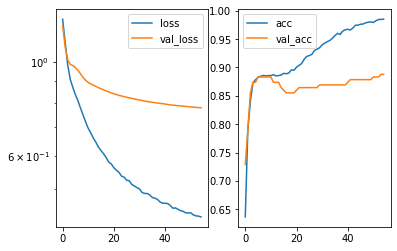

Predicted cell: Cells Probability: [[0.95973885]]
True Cell type: Cells
x [[0.38190418]]
True positional value x 0.2916666666666667
y [[0.589941]]
True positional value y 0.7083333333333334


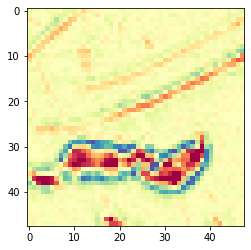

Epoch 56/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.4293 - acc: 0.9860 - val_loss: 0.7764 - val_acc: 0.8879

Epoch 00056: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.7763634519042256, 'val_acc': 0.8878504762025637, 'loss': 0.42932925875711453, 'acc': 0.9859571421372535, 'lr': 1e-06}


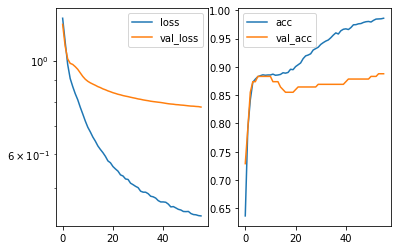

Predicted cell: Cells Probability: [[0.99684453]]
True Cell type: Cells
x [[0.45029148]]
True positional value x 0.7083333333333334
y [[0.25542775]]
True positional value y 0.2916666666666667


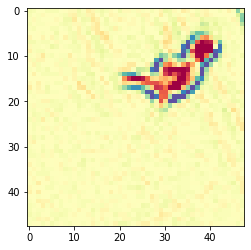

Epoch 57/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.4267 - acc: 0.9864 - val_loss: 0.7763 - val_acc: 0.8879

Epoch 00057: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.7763331772011017, 'val_acc': 0.8878504762025637, 'loss': 0.4266977478686034, 'acc': 0.9864498744841484, 'lr': 1e-06}


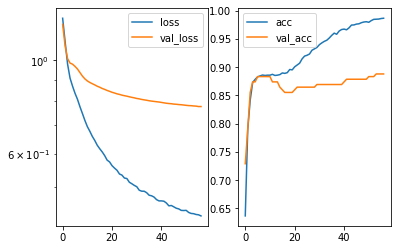

Predicted cell: Cells Probability: [[0.97044015]]
True Cell type: Cells
x [[0.25129497]]
True positional value x 0.5
y [[0.4136592]]
True positional value y 0.5


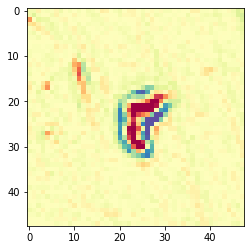

Epoch 58/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.4235 - acc: 0.9889 - val_loss: 0.7748 - val_acc: 0.8879

Epoch 00058: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.774806690550296, 'val_acc': 0.8878504762025637, 'loss': 0.42346373716578983, 'acc': 0.9889135342949451, 'lr': 1e-06}


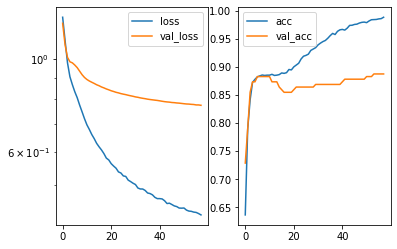

Predicted cell: Cells Probability: [[0.98586607]]
True Cell type: Cells
x [[0.5072548]]
True positional value x 0.2916666666666667
y [[0.37452942]]
True positional value y 0.2916666666666667


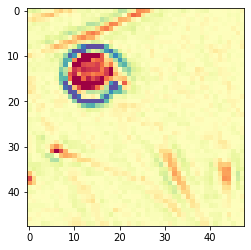

Epoch 59/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.4235 - acc: 0.9887 - val_loss: 0.7742 - val_acc: 0.8879

Epoch 00059: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.7742301075257988, 'val_acc': 0.8878504762025637, 'loss': 0.4235459709731368, 'acc': 0.9886671687382493, 'lr': 1e-06}


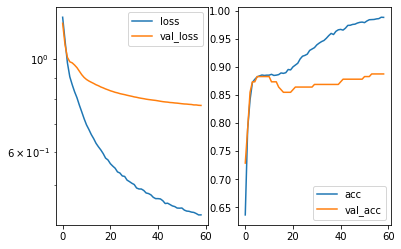

Predicted cell: Cells Probability: [[0.979656]]
True Cell type: Cells
x [[0.2596489]]
True positional value x 0.2916666666666667
y [[0.26305592]]
True positional value y 0.5


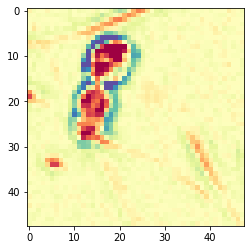

Epoch 60/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.4230 - acc: 0.9879 - val_loss: 0.7740 - val_acc: 0.8879

Epoch 00060: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.7739785085214632, 'val_acc': 0.8878504762025637, 'loss': 0.4229535493806067, 'acc': 0.9879280705556519, 'lr': 1e-06}


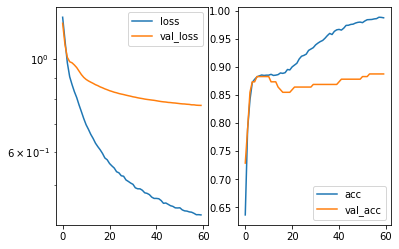

Predicted cell: Cells Probability: [[0.99060315]]
True Cell type: Cells
x [[0.58916575]]
True positional value x 0.5
y [[0.4823624]]
True positional value y 0.7083333333333334


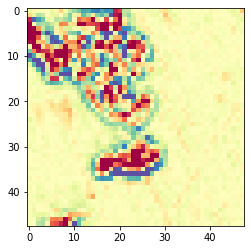

Epoch 61/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.4186 - acc: 0.9916 - val_loss: 0.7732 - val_acc: 0.8879

Epoch 00061: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.7732053382374416, 'val_acc': 0.8878504762025637, 'loss': 0.4186030286863303, 'acc': 0.9916235600001826, 'lr': 1e-06}


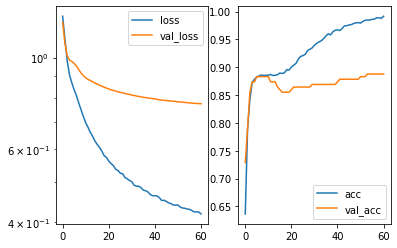

Predicted cell: Cells Probability: [[0.99444145]]
True Cell type: Cells
x [[0.456005]]
True positional value x 0.5
y [[0.23344605]]
True positional value y 0.2916666666666667


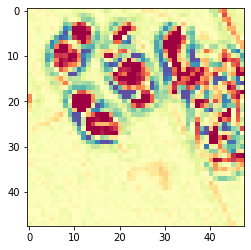

Epoch 62/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.4218 - acc: 0.9897 - val_loss: 0.7722 - val_acc: 0.8879

Epoch 00062: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.7721507014515244, 'val_acc': 0.8878504762025637, 'loss': 0.4218018952923239, 'acc': 0.9896526321985358, 'lr': 1e-06}


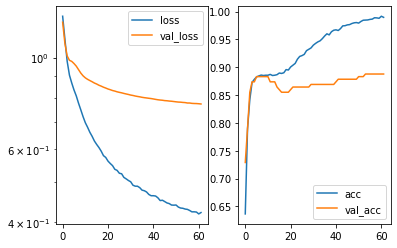

Predicted cell: Cells Probability: [[0.841091]]
True Cell type: Cells
x [[0.36069164]]
True positional value x 0.2916666666666667
y [[0.28321537]]
True positional value y 0.2916666666666667


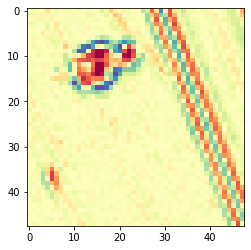

Epoch 63/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.4162 - acc: 0.9914 - val_loss: 0.7705 - val_acc: 0.8879

Epoch 00063: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.7704597672569418, 'val_acc': 0.8878504762025637, 'loss': 0.4161993396285133, 'acc': 0.9913771929456613, 'lr': 1e-06}


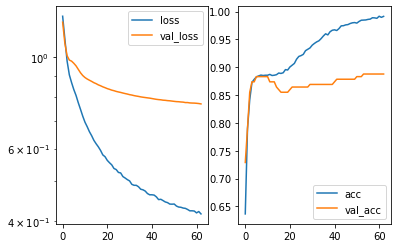

Predicted cell: Cells Probability: [[0.9882167]]
True Cell type: Cells
x [[0.6779891]]
True positional value x 0.7083333333333334
y [[0.32378232]]
True positional value y 0.2916666666666667


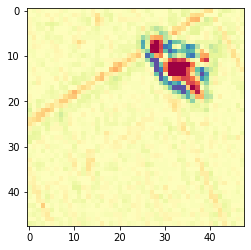

Epoch 64/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.4177 - acc: 0.9906 - val_loss: 0.7693 - val_acc: 0.8879

Epoch 00064: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.7693474593563615, 'val_acc': 0.8878504762025637, 'loss': 0.417748885455464, 'acc': 0.9906380953504464, 'lr': 1e-06}


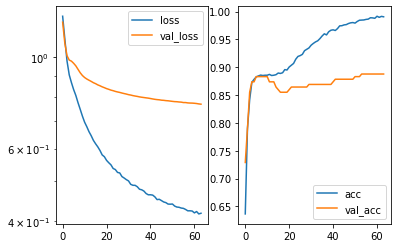

Predicted cell: Cells Probability: [[0.9819879]]
True Cell type: Cells
x [[0.75424534]]
True positional value x 0.5
y [[0.3749066]]
True positional value y 0.2916666666666667


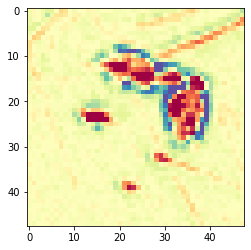

Epoch 65/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.4192 - acc: 0.9901 - val_loss: 0.7682 - val_acc: 0.8925

Epoch 00065: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.7682066504086289, 'val_acc': 0.8925233689424034, 'loss': 0.41920090332557547, 'acc': 0.9901453633412964, 'lr': 1e-06}


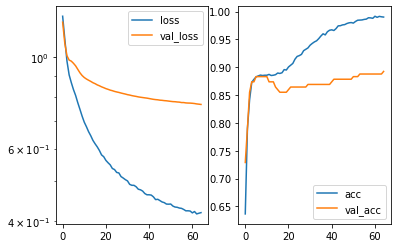

Predicted cell: Cells Probability: [[0.924277]]
True Cell type: Cells
x [[0.28032738]]
True positional value x 0.2916666666666667
y [[0.31270438]]
True positional value y 0.7083333333333334


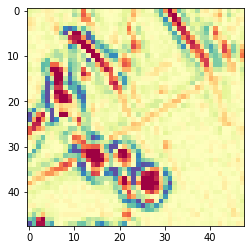

Epoch 66/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.4132 - acc: 0.9924 - val_loss: 0.7679 - val_acc: 0.8925

Epoch 00066: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.7678845591634234, 'val_acc': 0.8925233689424034, 'loss': 0.4131582635146228, 'acc': 0.9923626546584846, 'lr': 1e-06}


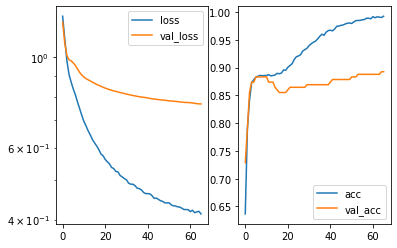

Predicted cell: Normal Probability: [[0.56100255]]
True Cell type: Normal
x [[0.27940363]]
True positional value x 0.5
y [[0.5878403]]
True positional value y 0.5


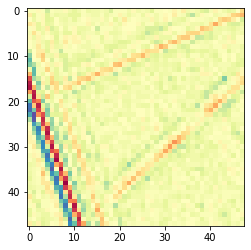

Epoch 67/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.4136 - acc: 0.9931 - val_loss: 0.7669 - val_acc: 0.8925

Epoch 00067: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.7669294950003936, 'val_acc': 0.8925233689424034, 'loss': 0.41357480379036715, 'acc': 0.9931017557779948, 'lr': 1e-06}


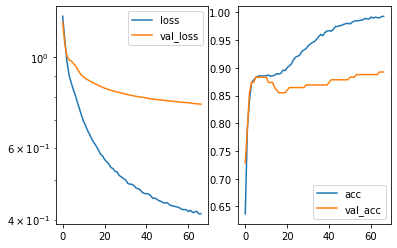

Predicted cell: Cells Probability: [[0.9867555]]
True Cell type: Cells
x [[0.441532]]
True positional value x 0.5
y [[0.71417356]]
True positional value y 0.7083333333333334


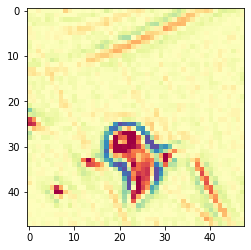

Epoch 68/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.4101 - acc: 0.9936 - val_loss: 0.7672 - val_acc: 0.8925

Epoch 00068: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.7672310477105256, 'val_acc': 0.8925233689424034, 'loss': 0.4101454502815506, 'acc': 0.9935944875081381, 'lr': 1e-06}


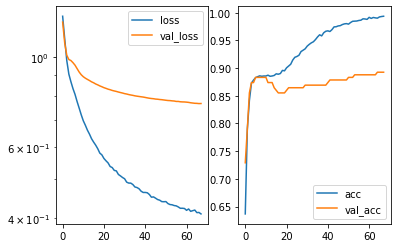

Predicted cell: Cells Probability: [[0.9890348]]
True Cell type: Cells
x [[0.5436218]]
True positional value x 0.5
y [[0.39326337]]
True positional value y 0.2916666666666667


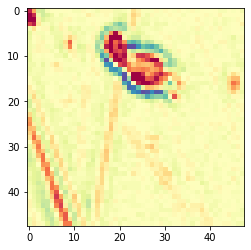

Epoch 69/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.4103 - acc: 0.9941 - val_loss: 0.7667 - val_acc: 0.8925

Epoch 00069: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.7666932968335731, 'val_acc': 0.8925233689424034, 'loss': 0.4102573659244386, 'acc': 0.9940872186508987, 'lr': 1e-06}


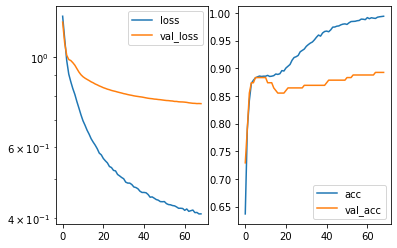

Predicted cell: Cells Probability: [[0.51193243]]
True Cell type: Normal
x [[0.7015428]]
True positional value x 0.5
y [[0.6117011]]
True positional value y 0.5


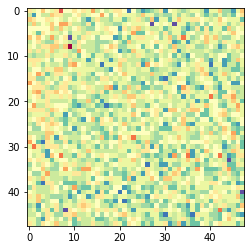

Epoch 70/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.4087 - acc: 0.9943 - val_loss: 0.7666 - val_acc: 0.8925

Epoch 00070: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.766567703719451, 'val_acc': 0.8925233689424034, 'loss': 0.4087203297820048, 'acc': 0.9943335851033529, 'lr': 1e-06}


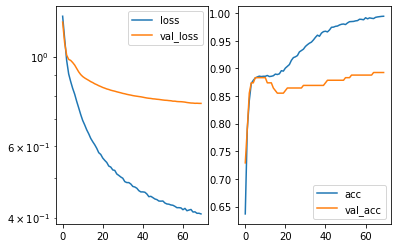

Predicted cell: Cells Probability: [[0.99339044]]
True Cell type: Cells
x [[0.32688114]]
True positional value x 0.5
y [[0.16669817]]
True positional value y 0.2916666666666667


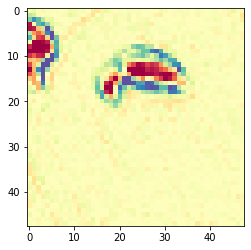

Epoch 71/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.4087 - acc: 0.9938 - val_loss: 0.7655 - val_acc: 0.8925

Epoch 00071: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.7655171183782203, 'val_acc': 0.8925233689424034, 'loss': 0.4087135431639635, 'acc': 0.9938408533732096, 'lr': 1e-06}


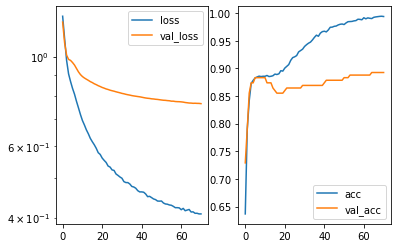

Predicted cell: Cells Probability: [[0.9369298]]
True Cell type: Cells
x [[0.7437073]]
True positional value x 0.7083333333333334
y [[0.33040187]]
True positional value y 0.2916666666666667


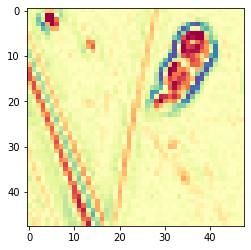

Epoch 72/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.4066 - acc: 0.9946 - val_loss: 0.7652 - val_acc: 0.8925

Epoch 00072: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.765223655188195, 'val_acc': 0.8925233689424034, 'loss': 0.40660520843256576, 'acc': 0.994579950381042, 'lr': 1e-06}


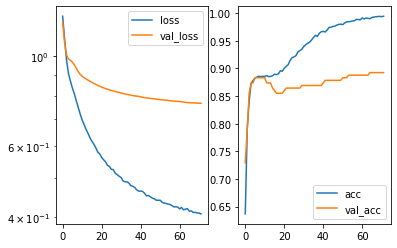

Predicted cell: Cells Probability: [[0.92860574]]
True Cell type: Cells
x [[0.6550272]]
True positional value x 0.5
y [[0.5849209]]
True positional value y 0.5


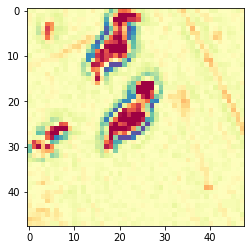

Epoch 73/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.4051 - acc: 0.9946 - val_loss: 0.7641 - val_acc: 0.8925

Epoch 00073: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.7640944017428104, 'val_acc': 0.8925233689424034, 'loss': 0.4050970425245121, 'acc': 0.9945799509684244, 'lr': 1e-06}


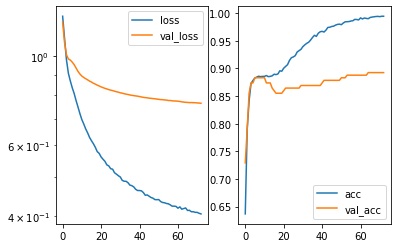

Predicted cell: Cells Probability: [[0.9815104]]
True Cell type: Cells
x [[0.72413695]]
True positional value x 0.5
y [[0.7412035]]
True positional value y 0.7083333333333334


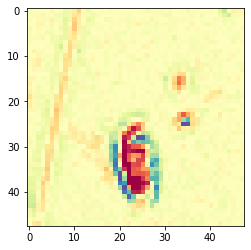

Epoch 74/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.4047 - acc: 0.9956 - val_loss: 0.7638 - val_acc: 0.8925

Epoch 00074: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.7637782135856486, 'val_acc': 0.8925233689424034, 'loss': 0.4046937888495057, 'acc': 0.9955654138413284, 'lr': 1e-06}


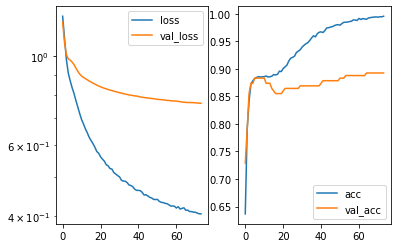

Predicted cell: Cells Probability: [[0.91203344]]
True Cell type: Cells
x [[0.49953705]]
True positional value x 0.7083333333333334
y [[0.3225943]]
True positional value y 0.2916666666666667


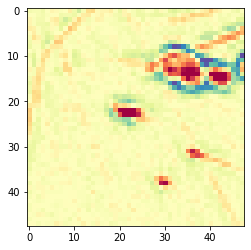

Epoch 75/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.4043 - acc: 0.9956 - val_loss: 0.7629 - val_acc: 0.8925

Epoch 00075: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.7629157716982833, 'val_acc': 0.8925233689424034, 'loss': 0.40427005673517996, 'acc': 0.9955654138413284, 'lr': 1e-06}


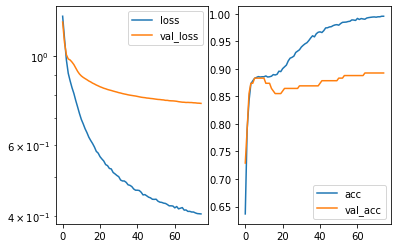

Predicted cell: Cells Probability: [[0.99889886]]
True Cell type: Cells
x [[0.56119686]]
True positional value x 0.2916666666666667
y [[0.47329807]]
True positional value y 0.2916666666666667


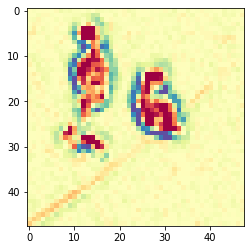

Epoch 76/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.4019 - acc: 0.9961 - val_loss: 0.7628 - val_acc: 0.8925

Epoch 00076: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.7627914748459219, 'val_acc': 0.8925233689424034, 'loss': 0.401856137382247, 'acc': 0.9960581455714717, 'lr': 1e-06}


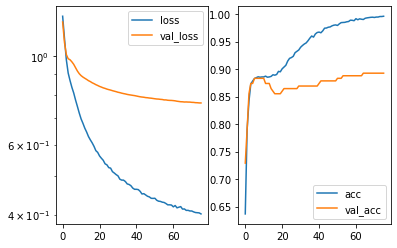

Predicted cell: Cells Probability: [[0.9837588]]
True Cell type: Cells
x [[0.42205405]]
True positional value x 0.5
y [[0.63519627]]
True positional value y 0.7083333333333334


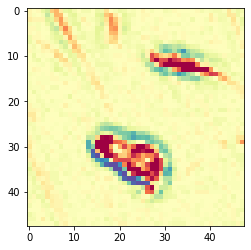

Epoch 77/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.4039 - acc: 0.9956 - val_loss: 0.7621 - val_acc: 0.9019

Epoch 00077: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.7620507902074083, 'val_acc': 0.9018691544220826, 'loss': 0.40391687128484527, 'acc': 0.9955654144287109, 'lr': 1e-06}


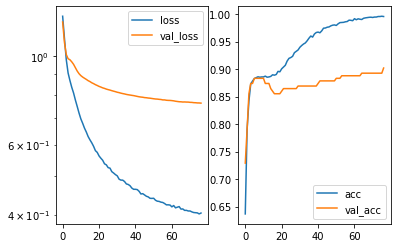

Predicted cell: Cells Probability: [[0.99365824]]
True Cell type: Cells
x [[0.20984873]]
True positional value x 0.5
y [[0.64382446]]
True positional value y 0.7083333333333334


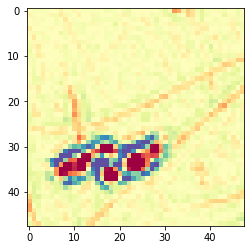

Epoch 78/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.4016 - acc: 0.9958 - val_loss: 0.7620 - val_acc: 0.9019

Epoch 00078: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.7620359581207561, 'val_acc': 0.9018691544220826, 'loss': 0.40158414757730454, 'acc': 0.9958117797064, 'lr': 1e-06}


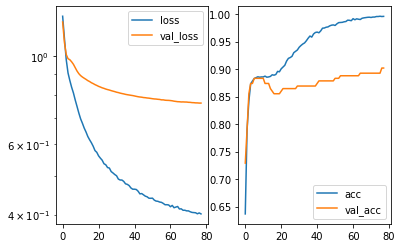

Predicted cell: Cells Probability: [[0.9942331]]
True Cell type: Cells
x [[0.32193735]]
True positional value x 0.5
y [[0.16373026]]
True positional value y 0.2916666666666667


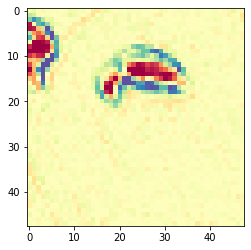

Epoch 79/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.4011 - acc: 0.9958 - val_loss: 0.7610 - val_acc: 0.9065

Epoch 00079: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.7610486439455335, 'val_acc': 0.9065420532895025, 'loss': 0.4011254356276904, 'acc': 0.9958117802937826, 'lr': 1e-06}


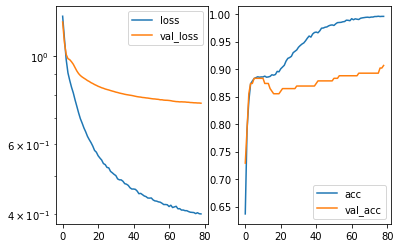

Predicted cell: Cells Probability: [[0.9847519]]
True Cell type: Cells
x [[0.70074916]]
True positional value x 0.5
y [[0.8240703]]
True positional value y 0.7083333333333334


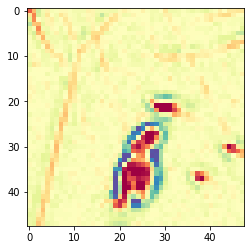

Epoch 80/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.3992 - acc: 0.9966 - val_loss: 0.7613 - val_acc: 0.9065

Epoch 00080: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.7612892979773406, 'val_acc': 0.9065420532895025, 'loss': 0.39921557606661606, 'acc': 0.9965508778889974, 'lr': 1e-06}


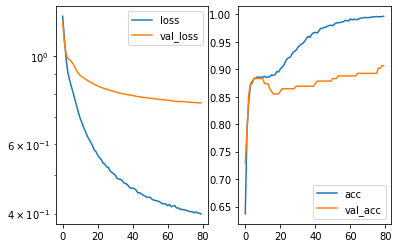

Predicted cell: Cells Probability: [[0.9745054]]
True Cell type: Cells
x [[0.18579012]]
True positional value x 0.5
y [[0.16989438]]
True positional value y 0.5


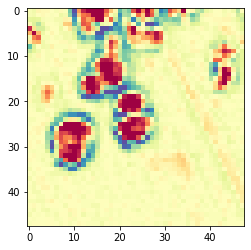

Epoch 81/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.4007 - acc: 0.9948 - val_loss: 0.7596 - val_acc: 0.9065

Epoch 00081: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.7596066131770054, 'val_acc': 0.9065420532895025, 'loss': 0.4007022106594627, 'acc': 0.9948263162461135, 'lr': 1e-06}


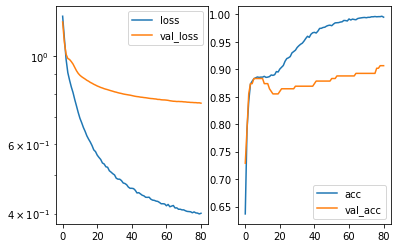

Predicted cell: Cells Probability: [[0.9888304]]
True Cell type: Cells
x [[0.39869833]]
True positional value x 0.5
y [[0.37983757]]
True positional value y 0.2916666666666667


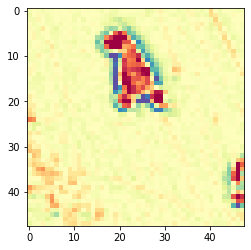

Epoch 82/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.3985 - acc: 0.9968 - val_loss: 0.7597 - val_acc: 0.9019

Epoch 00082: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.7596884993749244, 'val_acc': 0.9018691544220826, 'loss': 0.39846374824676173, 'acc': 0.996797243754069, 'lr': 1e-06}


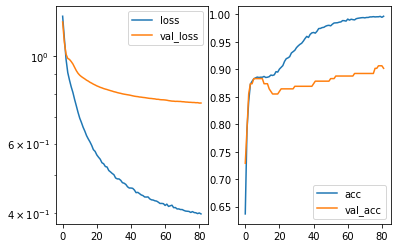

Predicted cell: Cells Probability: [[0.9751717]]
True Cell type: Cells
x [[0.36007094]]
True positional value x 0.5
y [[0.08099813]]
True positional value y 0.2916666666666667


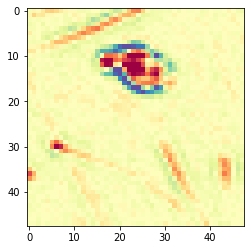

Epoch 83/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.3980 - acc: 0.9963 - val_loss: 0.7590 - val_acc: 0.9019

Epoch 00083: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.7589852782053368, 'val_acc': 0.9018691544220826, 'loss': 0.39796915814100625, 'acc': 0.9963045120239258, 'lr': 1e-06}


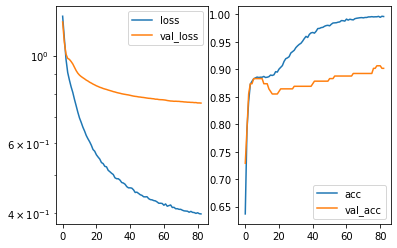

Predicted cell: Cells Probability: [[0.96842897]]
True Cell type: Cells
x [[0.5818605]]
True positional value x 0.2916666666666667
y [[0.6087708]]
True positional value y 0.5


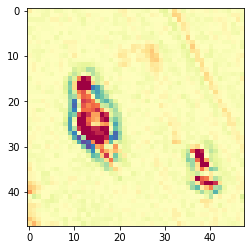

Epoch 84/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.3974 - acc: 0.9970 - val_loss: 0.7586 - val_acc: 0.9019

Epoch 00084: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.7585831351369341, 'val_acc': 0.9018691544220826, 'loss': 0.3973559728394767, 'acc': 0.9970436096191406, 'lr': 1e-06}


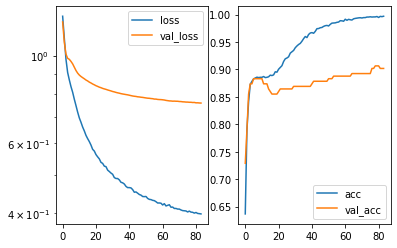

Predicted cell: Cells Probability: [[0.83084965]]
True Cell type: Normal
x [[0.45969692]]
True positional value x 0.5
y [[0.8356549]]
True positional value y 0.5


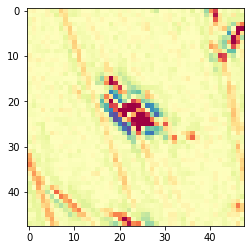

Epoch 85/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.3953 - acc: 0.9966 - val_loss: 0.7584 - val_acc: 0.9019

Epoch 00085: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.7584377053742096, 'val_acc': 0.9018691544220826, 'loss': 0.39532330369356083, 'acc': 0.9965508773016148, 'lr': 1e-06}


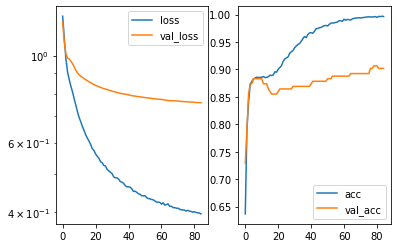

Predicted cell: Cells Probability: [[0.969317]]
True Cell type: Cells
x [[0.13397118]]
True positional value x 0.2916666666666667
y [[0.6764763]]
True positional value y 0.7083333333333334


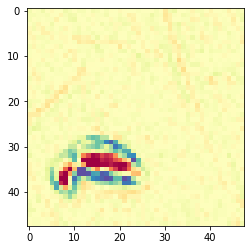

Epoch 86/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.3938 - acc: 0.9968 - val_loss: 0.7576 - val_acc: 0.9112

Epoch 00086: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.7575672720080224, 'val_acc': 0.9112149460293423, 'loss': 0.3937511035714075, 'acc': 0.9967972431666865, 'lr': 1e-06}


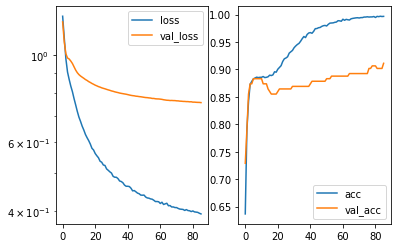

Predicted cell: Cells Probability: [[0.98752624]]
True Cell type: Cells
x [[0.34965685]]
True positional value x 0.2916666666666667
y [[0.77448106]]
True positional value y 0.7083333333333334


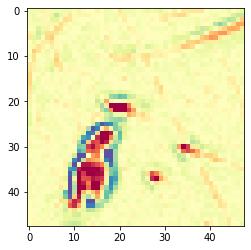

Epoch 87/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.3930 - acc: 0.9968 - val_loss: 0.7573 - val_acc: 0.9112

Epoch 00087: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.757306999692293, 'val_acc': 0.9112149460293423, 'loss': 0.3929907363839677, 'acc': 0.996797243754069, 'lr': 1e-06}


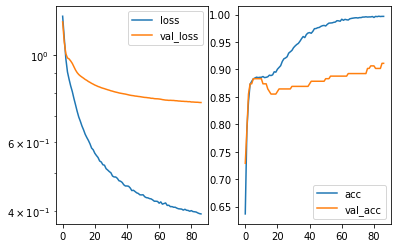

Predicted cell: Cells Probability: [[0.9763737]]
True Cell type: Cells
x [[0.3587106]]
True positional value x 0.5
y [[0.08115094]]
True positional value y 0.2916666666666667


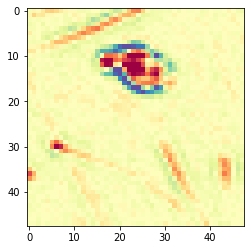

Epoch 88/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.3931 - acc: 0.9975 - val_loss: 0.7569 - val_acc: 0.9159

Epoch 00088: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.7568886447175641, 'val_acc': 0.9158878409973928, 'loss': 0.3931437871687575, 'acc': 0.9975363413492838, 'lr': 1e-06}


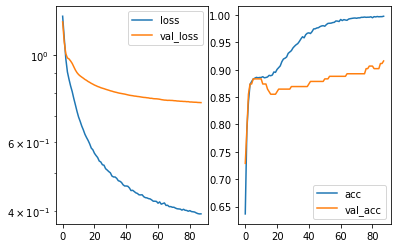

Predicted cell: Cells Probability: [[0.9979692]]
True Cell type: Cells
x [[0.12422126]]
True positional value x 0.2916666666666667
y [[0.40586567]]
True positional value y 0.5


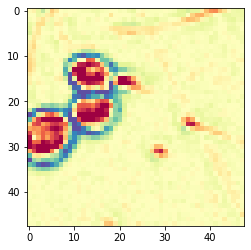

Epoch 89/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.3926 - acc: 0.9970 - val_loss: 0.7559 - val_acc: 0.9159

Epoch 00089: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.7558914556681553, 'val_acc': 0.9158878409973928, 'loss': 0.3926314451653959, 'acc': 0.9970436096191406, 'lr': 1e-06}


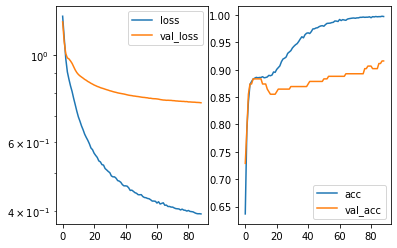

Predicted cell: Cells Probability: [[0.9865594]]
True Cell type: Cells
x [[0.27435276]]
True positional value x 0.2916666666666667
y [[0.270386]]
True positional value y 0.5


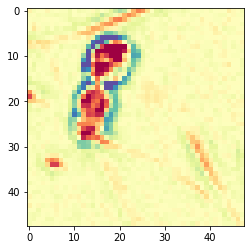

Epoch 90/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.3928 - acc: 0.9961 - val_loss: 0.7558 - val_acc: 0.9112

Epoch 00090: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.7558374527458832, 'val_acc': 0.9112149460293423, 'loss': 0.3928021228160727, 'acc': 0.9960581455714717, 'lr': 1e-06}


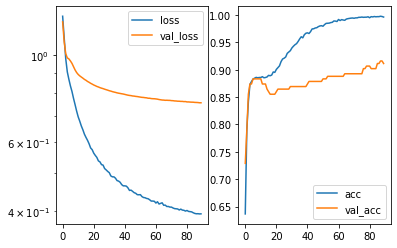

Predicted cell: Cells Probability: [[0.7746359]]
True Cell type: Cells
x [[0.6803523]]
True positional value x 0.7083333333333334
y [[0.39309534]]
True positional value y 0.7083333333333334


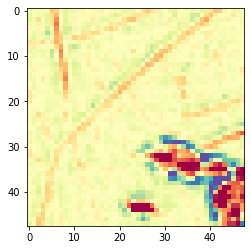

Epoch 91/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.3904 - acc: 0.9975 - val_loss: 0.7544 - val_acc: 0.9159

Epoch 00091: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.7543521718444112, 'val_acc': 0.9158878409973928, 'loss': 0.390370794993429, 'acc': 0.9975363413492838, 'lr': 1e-06}


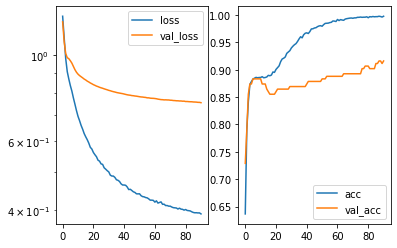

Predicted cell: Cells Probability: [[0.9958919]]
True Cell type: Cells
x [[0.5276338]]
True positional value x 0.2916666666666667
y [[0.22357647]]
True positional value y 0.2916666666666667


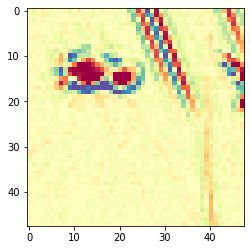

Epoch 92/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.3900 - acc: 0.9970 - val_loss: 0.7543 - val_acc: 0.9159

Epoch 00092: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.7542813253179889, 'val_acc': 0.9158878409973928, 'loss': 0.39000383710356057, 'acc': 0.9970436096191406, 'lr': 1e-06}


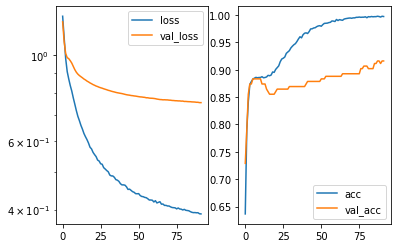

Predicted cell: Cells Probability: [[0.9953578]]
True Cell type: Cells
x [[0.64023465]]
True positional value x 0.7083333333333334
y [[0.61646634]]
True positional value y 0.5


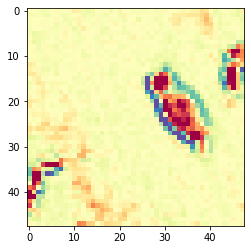

Epoch 93/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.3907 - acc: 0.9973 - val_loss: 0.7533 - val_acc: 0.9159

Epoch 00093: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.7533251264384974, 'val_acc': 0.9158878409973928, 'loss': 0.3906546004316612, 'acc': 0.9972899754842123, 'lr': 1e-06}


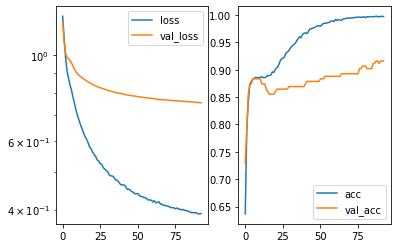

Predicted cell: Normal Probability: [[0.66080344]]
True Cell type: Normal
x [[0.4340213]]
True positional value x 0.5
y [[0.67503464]]
True positional value y 0.5


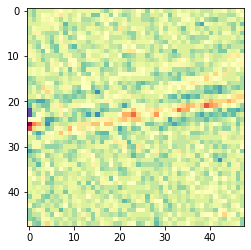

Epoch 94/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.3879 - acc: 0.9975 - val_loss: 0.7532 - val_acc: 0.9159

Epoch 00094: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.7531783708902163, 'val_acc': 0.9158878409973928, 'loss': 0.3879057515736547, 'acc': 0.9975363413492838, 'lr': 1e-06}


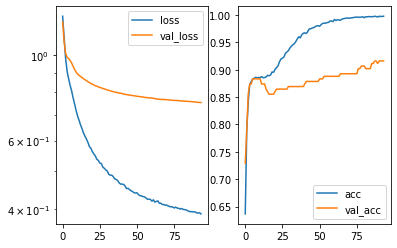

Predicted cell: Cells Probability: [[0.990256]]
True Cell type: Cells
x [[0.71456975]]
True positional value x 0.7083333333333334
y [[0.50681764]]
True positional value y 0.5


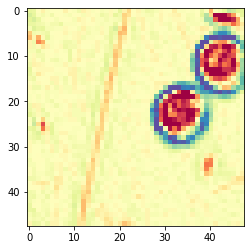

Epoch 95/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.3880 - acc: 0.9968 - val_loss: 0.7524 - val_acc: 0.9159

Epoch 00095: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.7523619627284113, 'val_acc': 0.9158878409973928, 'loss': 0.38803318498991607, 'acc': 0.9967972422856126, 'lr': 1e-06}


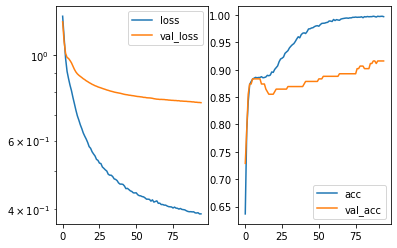

Predicted cell: Cells Probability: [[0.97344536]]
True Cell type: Cells
x [[0.20609866]]
True positional value x 0.2916666666666667
y [[0.2512777]]
True positional value y 0.2916666666666667


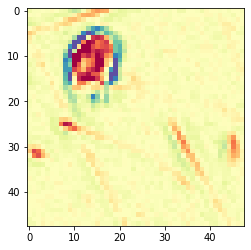

Epoch 96/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.3891 - acc: 0.9973 - val_loss: 0.7522 - val_acc: 0.9159

Epoch 00096: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.7521508375060892, 'val_acc': 0.9158878409973928, 'loss': 0.3890708248936563, 'acc': 0.9972899754842123, 'lr': 1e-06}


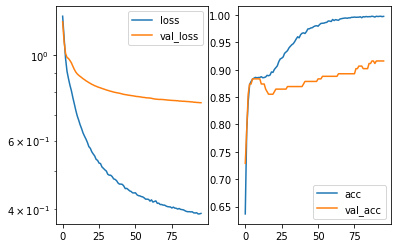

Predicted cell: Cells Probability: [[0.9733792]]
True Cell type: Cells
x [[0.134895]]
True positional value x 0.2916666666666667
y [[0.6768343]]
True positional value y 0.7083333333333334


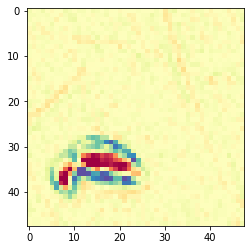

Epoch 97/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.3870 - acc: 0.9973 - val_loss: 0.7511 - val_acc: 0.9159

Epoch 00097: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.7511235709502319, 'val_acc': 0.9158878409973928, 'loss': 0.38704901018821714, 'acc': 0.9972899754842123, 'lr': 1e-06}


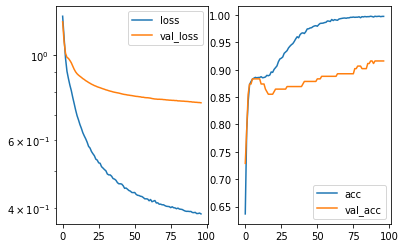

Predicted cell: Cells Probability: [[0.9913737]]
True Cell type: Cells
x [[0.18146603]]
True positional value x 0.2916666666666667
y [[0.1914885]]
True positional value y 0.2916666666666667


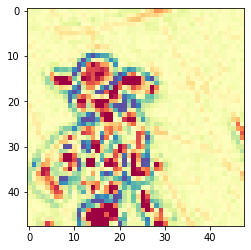

Epoch 98/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.3891 - acc: 0.9973 - val_loss: 0.7509 - val_acc: 0.9159

Epoch 00098: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.750853580849193, 'val_acc': 0.9158878409973928, 'loss': 0.3891103386761491, 'acc': 0.9972899754842123, 'lr': 1e-06}


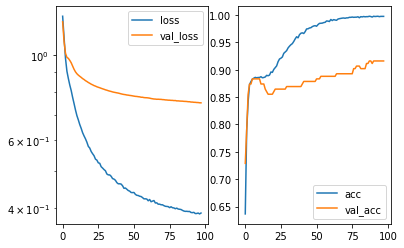

Predicted cell: Cells Probability: [[0.917686]]
True Cell type: Cells
x [[0.502594]]
True positional value x 0.5
y [[0.4677393]]
True positional value y 0.2916666666666667


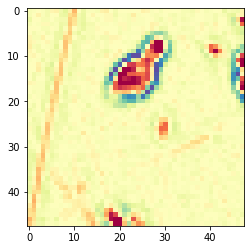

Epoch 99/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.3847 - acc: 0.9978 - val_loss: 0.7501 - val_acc: 0.9206

Epoch 00099: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.7501449122607151, 'val_acc': 0.9205607337372326, 'loss': 0.3847154544386026, 'acc': 0.9977827072143555, 'lr': 1e-06}


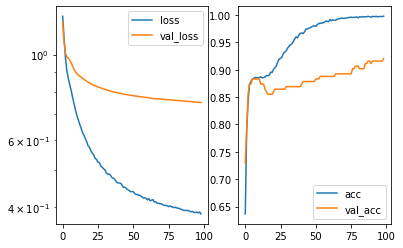

Predicted cell: Cells Probability: [[0.9459004]]
True Cell type: Cells
x [[0.38699588]]
True positional value x 0.7083333333333334
y [[0.7243525]]
True positional value y 0.5


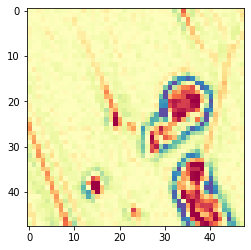

Epoch 100/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.3847 - acc: 0.9980 - val_loss: 0.7500 - val_acc: 0.9206

Epoch 00100: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.7500328098502115, 'val_acc': 0.9205607337372326, 'loss': 0.3847172022467912, 'acc': 0.9980290724920445, 'lr': 1e-06}


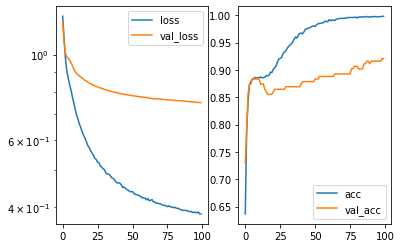

Predicted cell: Cells Probability: [[0.9961063]]
True Cell type: Cells
x [[0.49742493]]
True positional value x 0.2916666666666667
y [[0.16090442]]
True positional value y 0.2916666666666667


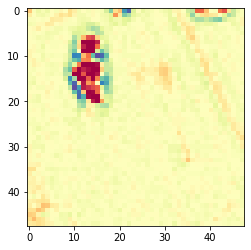

Epoch 101/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.3852 - acc: 0.9978 - val_loss: 0.7494 - val_acc: 0.9206

Epoch 00101: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.7493981991972879, 'val_acc': 0.9205607337372326, 'loss': 0.3852021435735025, 'acc': 0.9977827066269729, 'lr': 1e-06}


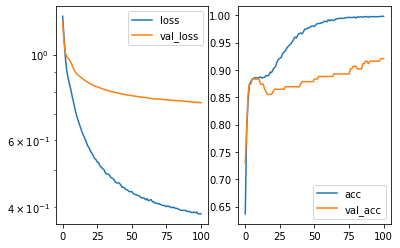

Predicted cell: Cells Probability: [[0.99581796]]
True Cell type: Cells
x [[0.7086138]]
True positional value x 0.7083333333333334
y [[0.3847855]]
True positional value y 0.5


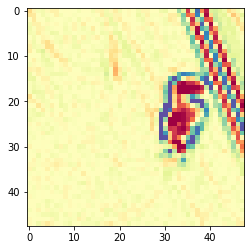

Epoch 102/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.3847 - acc: 0.9975 - val_loss: 0.7493 - val_acc: 0.9206

Epoch 00102: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.7492528942143806, 'val_acc': 0.9205607337372326, 'loss': 0.38468427024735813, 'acc': 0.9975363413492838, 'lr': 1e-06}


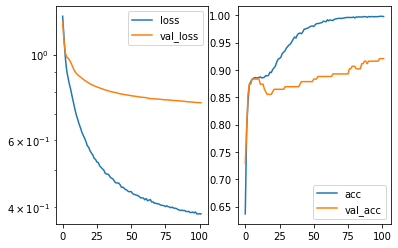

Predicted cell: Cells Probability: [[0.71671534]]
True Cell type: Normal
x [[0.57336354]]
True positional value x 0.5
y [[0.82064074]]
True positional value y 0.5


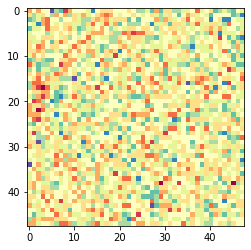

Epoch 103/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.3843 - acc: 0.9980 - val_loss: 0.7495 - val_acc: 0.9206

Epoch 00103: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.7494846459861114, 'val_acc': 0.9205607337372326, 'loss': 0.3842749999247328, 'acc': 0.9980290730794271, 'lr': 1e-06}


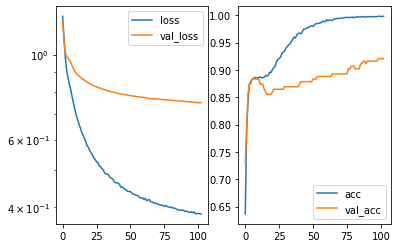

Predicted cell: Cells Probability: [[0.9946477]]
True Cell type: Cells
x [[0.847131]]
True positional value x 0.7083333333333334
y [[0.5063424]]
True positional value y 0.5


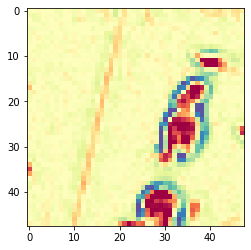

Epoch 104/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.3831 - acc: 0.9983 - val_loss: 0.7494 - val_acc: 0.9206

Epoch 00104: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.7493659876217352, 'val_acc': 0.9205607337372326, 'loss': 0.38311086555043006, 'acc': 0.9982754389444987, 'lr': 1e-06}


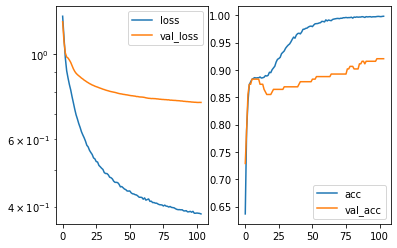

Predicted cell: Cells Probability: [[0.9896818]]
True Cell type: Cells
x [[0.35077462]]
True positional value x 0.2916666666666667
y [[0.7810251]]
True positional value y 0.7083333333333334


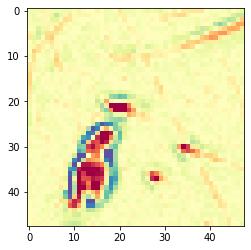

Epoch 105/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.3835 - acc: 0.9975 - val_loss: 0.7493 - val_acc: 0.9206

Epoch 00105: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.7492954742128604, 'val_acc': 0.9205607337372326, 'loss': 0.38350162676591304, 'acc': 0.9975363413492838, 'lr': 1e-06}


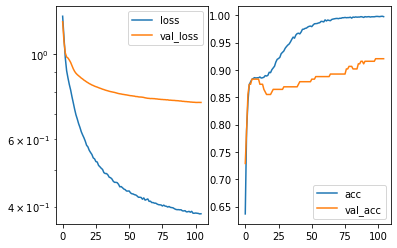

Predicted cell: Cells Probability: [[0.9923968]]
True Cell type: Cells
x [[0.5523605]]
True positional value x 0.5
y [[0.38430676]]
True positional value y 0.2916666666666667


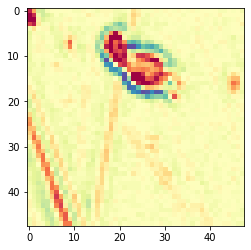

Epoch 106/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.3829 - acc: 0.9980 - val_loss: 0.7491 - val_acc: 0.9206

Epoch 00106: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.7490861917210516, 'val_acc': 0.9205607337372326, 'loss': 0.38290881338187643, 'acc': 0.9980290730794271, 'lr': 1e-06}


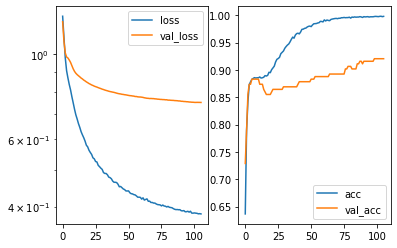

Predicted cell: Cells Probability: [[0.9991942]]
True Cell type: Cells
x [[0.5671621]]
True positional value x 0.2916666666666667
y [[0.47938457]]
True positional value y 0.2916666666666667


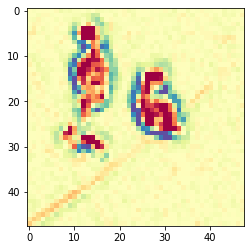

Epoch 107/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.3831 - acc: 0.9978 - val_loss: 0.7489 - val_acc: 0.9252

Epoch 00107: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.7489238509507937, 'val_acc': 0.9252336264770722, 'loss': 0.383140323446372, 'acc': 0.9977827066269729, 'lr': 1e-06}


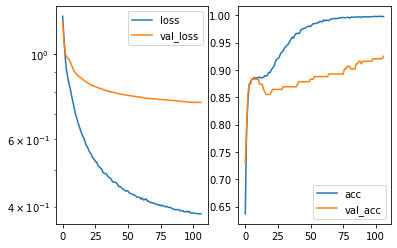

Predicted cell: Cells Probability: [[0.98887503]]
True Cell type: Cells
x [[0.7250868]]
True positional value x 0.5
y [[0.7273559]]
True positional value y 0.7083333333333334


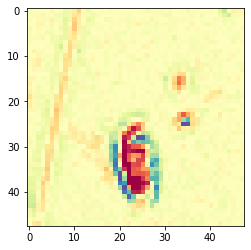

Epoch 108/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.3815 - acc: 0.9978 - val_loss: 0.7481 - val_acc: 0.9252

Epoch 00108: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.7481092637944444, 'val_acc': 0.9252336264770722, 'loss': 0.3814634483167179, 'acc': 0.9977827072143555, 'lr': 1e-06}


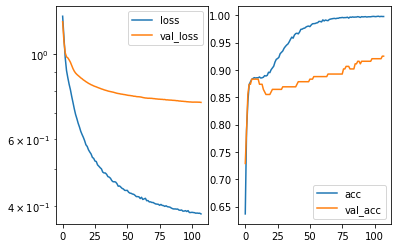

Predicted cell: Cells Probability: [[0.9542341]]
True Cell type: Normal
x [[0.46046695]]
True positional value x 0.5
y [[0.4605185]]
True positional value y 0.5


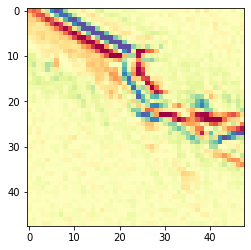

Epoch 109/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.3813 - acc: 0.9978 - val_loss: 0.7474 - val_acc: 0.9252

Epoch 00109: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.7473668801450284, 'val_acc': 0.9252336264770722, 'loss': 0.3812716310836024, 'acc': 0.9977827072143555, 'lr': 1e-06}


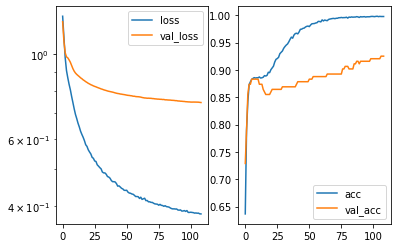

Predicted cell: Cells Probability: [[0.9956969]]
True Cell type: Cells
x [[0.73517585]]
True positional value x 0.7083333333333334
y [[0.4823326]]
True positional value y 0.5


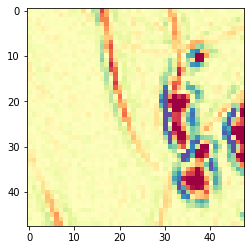

Epoch 110/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.3813 - acc: 0.9978 - val_loss: 0.7478 - val_acc: 0.9252

Epoch 00110: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.7477834375105171, 'val_acc': 0.9252336264770722, 'loss': 0.3812669281904907, 'acc': 0.9977827072143555, 'lr': 1e-06}


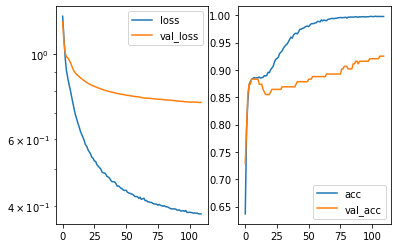

Predicted cell: Cells Probability: [[0.638432]]
True Cell type: Cells
x [[0.5816439]]
True positional value x 0.5
y [[0.6967267]]
True positional value y 0.5


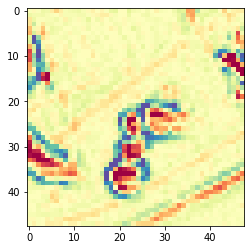

Epoch 111/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.3824 - acc: 0.9978 - val_loss: 0.7470 - val_acc: 0.9252

Epoch 00111: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.7470171919492917, 'val_acc': 0.9252336264770722, 'loss': 0.38235778606974685, 'acc': 0.9977827072143555, 'lr': 1e-06}


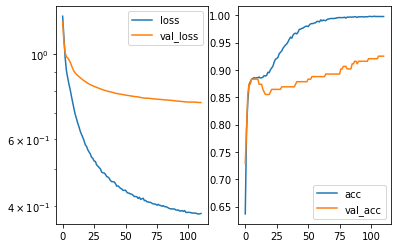

Predicted cell: Cells Probability: [[0.9944983]]
True Cell type: Cells
x [[0.44265664]]
True positional value x 0.7083333333333334
y [[0.46069458]]
True positional value y 0.7083333333333334


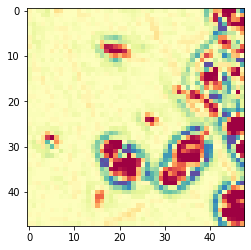

Epoch 112/250
4059/4059 [==============================] - 4s 1ms/step - loss: 0.3815 - acc: 0.9980 - val_loss: 0.7469 - val_acc: 0.9252

Epoch 00112: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.7469214462788305, 'val_acc': 0.9252336264770722, 'loss': 0.3815454357317675, 'acc': 0.9980290730794271, 'lr': 1e-06}


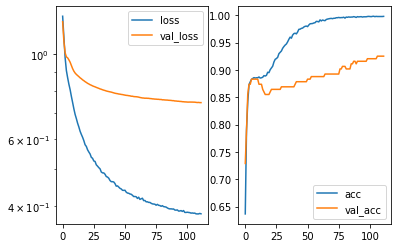

Predicted cell: Cells Probability: [[0.6466]]
True Cell type: Normal
x [[0.5331683]]
True positional value x 0.5
y [[0.78678626]]
True positional value y 0.5


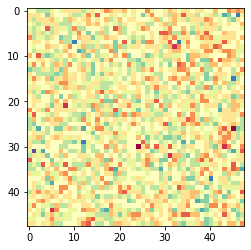

Epoch 113/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.3806 - acc: 0.9980 - val_loss: 0.7471 - val_acc: 0.9252

Epoch 00113: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.747111860279725, 'val_acc': 0.9252336264770722, 'loss': 0.38057462338392123, 'acc': 0.9980290730794271, 'lr': 1e-06}


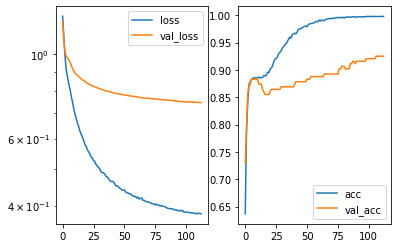

Predicted cell: Cells Probability: [[0.97532123]]
True Cell type: Cells
x [[0.21258156]]
True positional value x 0.2916666666666667
y [[0.25183025]]
True positional value y 0.2916666666666667


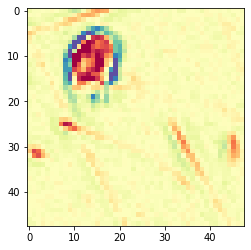

Epoch 114/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.3807 - acc: 0.9980 - val_loss: 0.7463 - val_acc: 0.9252

Epoch 00114: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.7463414468497873, 'val_acc': 0.9252336264770722, 'loss': 0.38072838156086436, 'acc': 0.9980290724920445, 'lr': 1e-06}


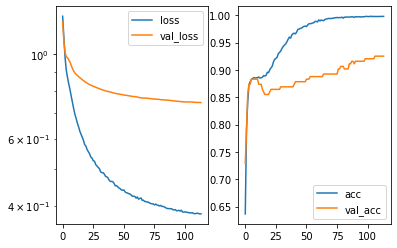

Predicted cell: Cells Probability: [[0.8893817]]
True Cell type: Cells
x [[0.4856161]]
True positional value x 0.7083333333333334
y [[0.61875397]]
True positional value y 0.2916666666666667


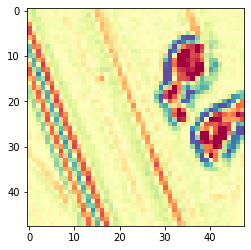

Epoch 115/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.3794 - acc: 0.9980 - val_loss: 0.7459 - val_acc: 0.9252

Epoch 00115: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.7458915264807015, 'val_acc': 0.9252336264770722, 'loss': 0.37941047381109483, 'acc': 0.9980290730794271, 'lr': 1e-06}


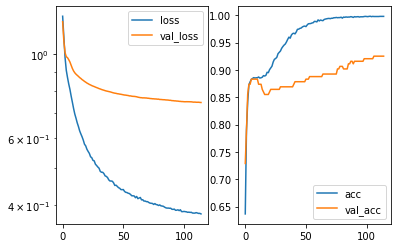

Predicted cell: Cells Probability: [[0.9494189]]
True Cell type: Cells
x [[0.24252874]]
True positional value x 0.2916666666666667
y [[0.2815295]]
True positional value y 0.5


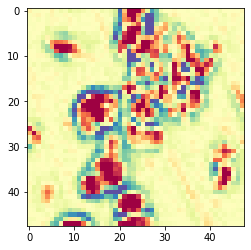

Epoch 116/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.3781 - acc: 0.9978 - val_loss: 0.7450 - val_acc: 0.9252

Epoch 00116: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.7449910590581805, 'val_acc': 0.9252336264770722, 'loss': 0.3781229774186575, 'acc': 0.9977827072143555, 'lr': 1e-06}


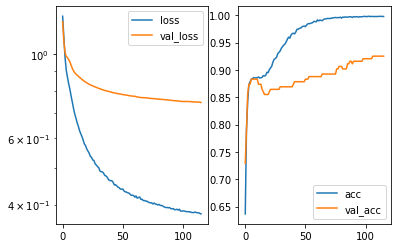

Predicted cell: Cells Probability: [[0.9974503]]
True Cell type: Cells
x [[0.16530941]]
True positional value x 0.2916666666666667
y [[0.7107935]]
True positional value y 0.5


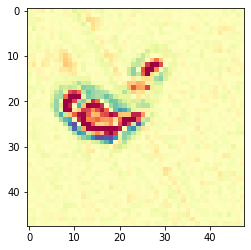

Epoch 117/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.3812 - acc: 0.9973 - val_loss: 0.7450 - val_acc: 0.9252

Epoch 00117: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.745034596630346, 'val_acc': 0.9252336264770722, 'loss': 0.38121423861697906, 'acc': 0.9972899754842123, 'lr': 1e-06}


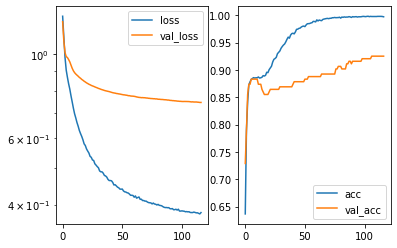

Predicted cell: Cells Probability: [[0.94655097]]
True Cell type: Cells
x [[0.39999267]]
True positional value x 0.7083333333333334
y [[0.5108137]]
True positional value y 0.5


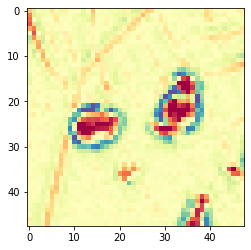

Epoch 118/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.3779 - acc: 0.9983 - val_loss: 0.7444 - val_acc: 0.9252

Epoch 00118: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.7443670390922332, 'val_acc': 0.9252336264770722, 'loss': 0.37787806194061774, 'acc': 0.9982754389444987, 'lr': 1e-06}


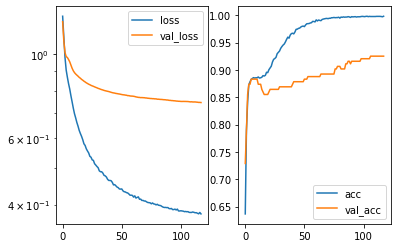

Predicted cell: Cells Probability: [[0.9983078]]
True Cell type: Cells
x [[0.7916533]]
True positional value x 0.7083333333333334
y [[0.33591387]]
True positional value y 0.2916666666666667


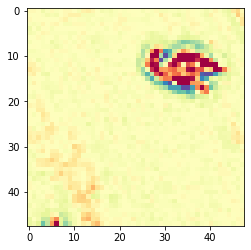

Epoch 119/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.3780 - acc: 0.9980 - val_loss: 0.7445 - val_acc: 0.9252

Epoch 00119: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.7445034780234934, 'val_acc': 0.9252336264770722, 'loss': 0.3780420478208513, 'acc': 0.9980290730794271, 'lr': 1e-06}


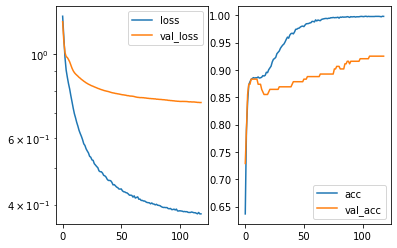

Predicted cell: Cells Probability: [[0.9883478]]
True Cell type: Cells
x [[0.74821794]]
True positional value x 0.5
y [[0.5324341]]
True positional value y 0.7083333333333334


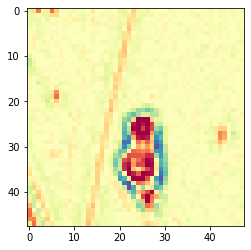

Epoch 120/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.3760 - acc: 0.9985 - val_loss: 0.7436 - val_acc: 0.9252

Epoch 00120: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.7436460635372412, 'val_acc': 0.9252336264770722, 'loss': 0.375960368862232, 'acc': 0.9985218048095703, 'lr': 1e-06}


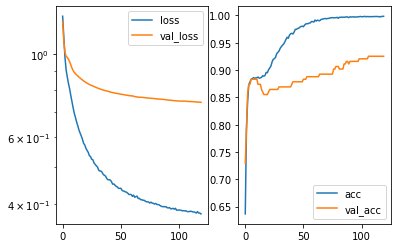

Predicted cell: Cells Probability: [[0.9643764]]
True Cell type: Cells
x [[0.6079528]]
True positional value x 0.2916666666666667
y [[0.6491765]]
True positional value y 0.5


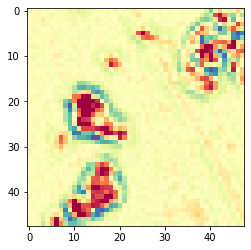

Epoch 121/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.3768 - acc: 0.9978 - val_loss: 0.7438 - val_acc: 0.9252

Epoch 00121: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.7437868146138771, 'val_acc': 0.9252336264770722, 'loss': 0.3768283611860555, 'acc': 0.9977827066269729, 'lr': 1e-06}


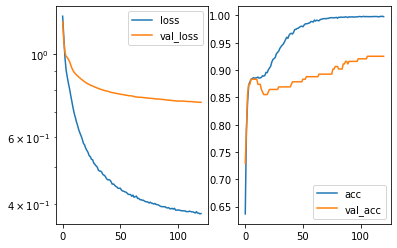

Predicted cell: Cells Probability: [[0.966234]]
True Cell type: Cells
x [[0.455613]]
True positional value x 0.5
y [[0.59987915]]
True positional value y 0.7083333333333334


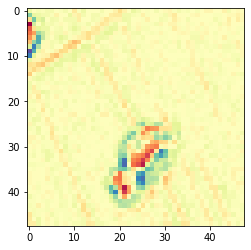

Epoch 122/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.3763 - acc: 0.9978 - val_loss: 0.7425 - val_acc: 0.9252

Epoch 00122: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.7425427319847535, 'val_acc': 0.9252336264770722, 'loss': 0.3763172314448379, 'acc': 0.9977827072143555, 'lr': 1e-06}


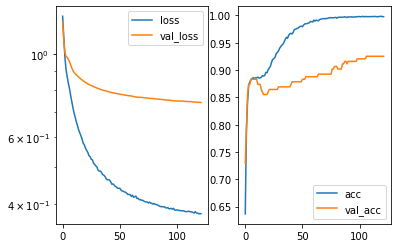

Predicted cell: Cells Probability: [[0.6444233]]
True Cell type: Cells
x [[0.5785565]]
True positional value x 0.5
y [[0.68913776]]
True positional value y 0.5


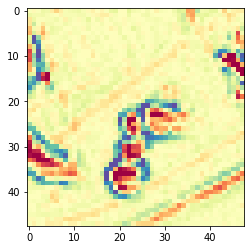

Epoch 123/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.3772 - acc: 0.9983 - val_loss: 0.7424 - val_acc: 0.9252

Epoch 00123: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.7423805889682235, 'val_acc': 0.9252336264770722, 'loss': 0.37715808871374484, 'acc': 0.9982754389444987, 'lr': 1e-06}


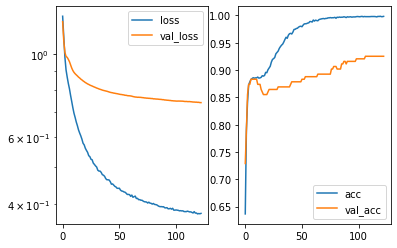

Predicted cell: Cells Probability: [[0.9832322]]
True Cell type: Cells
x [[0.5944657]]
True positional value x 0.2916666666666667
y [[0.7855877]]
True positional value y 0.7083333333333334


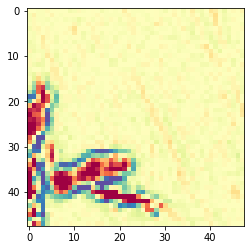

Epoch 124/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.3745 - acc: 0.9985 - val_loss: 0.7420 - val_acc: 0.9252

Epoch 00124: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.742008819758335, 'val_acc': 0.9252336264770722, 'loss': 0.3744980051001177, 'acc': 0.9985218048095703, 'lr': 1e-06}


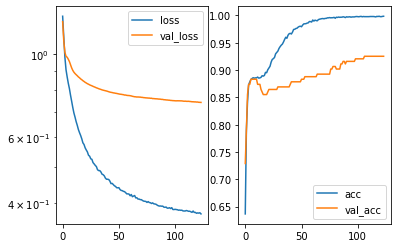

Predicted cell: Cells Probability: [[0.9808187]]
True Cell type: Cells
x [[0.18735465]]
True positional value x 0.5
y [[0.16207966]]
True positional value y 0.5


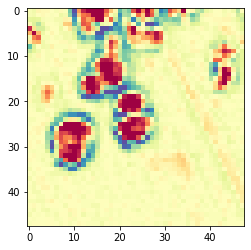

Epoch 125/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.3746 - acc: 0.9993 - val_loss: 0.7419 - val_acc: 0.9252

Epoch 00125: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.7418845396175563, 'val_acc': 0.9252336264770722, 'loss': 0.37459581037494577, 'acc': 0.9992609024047852, 'lr': 1e-06}


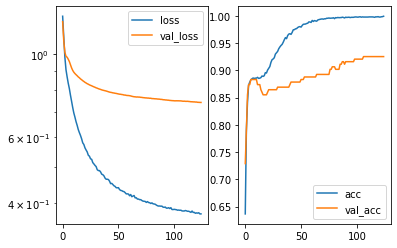

Predicted cell: Cells Probability: [[0.9951821]]
True Cell type: Cells
x [[0.4488306]]
True positional value x 0.7083333333333334
y [[0.4621946]]
True positional value y 0.7083333333333334


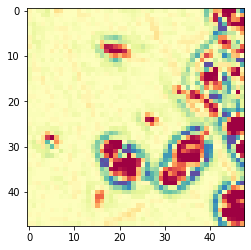

Epoch 126/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.3742 - acc: 0.9985 - val_loss: 0.7410 - val_acc: 0.9252

Epoch 00126: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.7410227383408591, 'val_acc': 0.9252336264770722, 'loss': 0.37424300832388935, 'acc': 0.9985218048095703, 'lr': 1e-06}


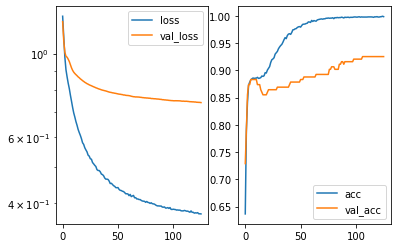

Predicted cell: Cells Probability: [[0.88550895]]
True Cell type: Cells
x [[0.49653485]]
True positional value x 0.5
y [[0.3615517]]
True positional value y 0.2916666666666667


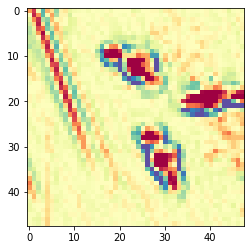

Epoch 127/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.3759 - acc: 0.9983 - val_loss: 0.7408 - val_acc: 0.9252

Epoch 00127: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.7407736850676135, 'val_acc': 0.9252336264770722, 'loss': 0.37593510531092783, 'acc': 0.9982754383571162, 'lr': 1e-06}


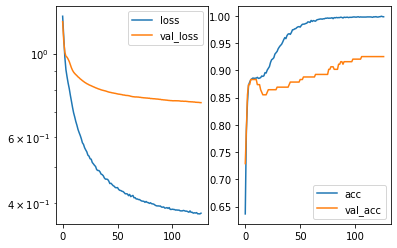

Predicted cell: Cells Probability: [[0.9920569]]
True Cell type: Cells
x [[0.35230052]]
True positional value x 0.2916666666666667
y [[0.777446]]
True positional value y 0.7083333333333334


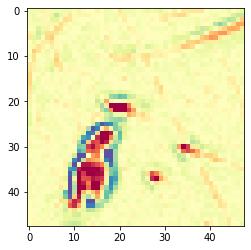

Epoch 128/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.3747 - acc: 0.9990 - val_loss: 0.7405 - val_acc: 0.9252

Epoch 00128: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.7404542058427758, 'val_acc': 0.9252336264770722, 'loss': 0.3746544076292701, 'acc': 0.9990145365397135, 'lr': 1e-06}


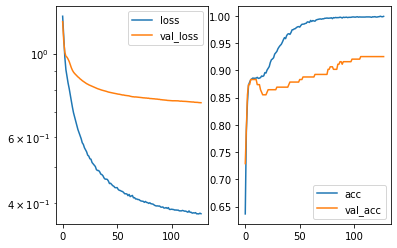

Predicted cell: Cells Probability: [[0.9701544]]
True Cell type: Cells
x [[0.3686547]]
True positional value x 0.2916666666666667
y [[0.41904125]]
True positional value y 0.2916666666666667


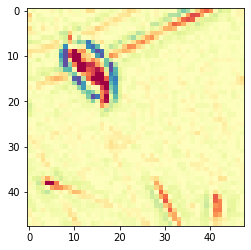

Epoch 129/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.3723 - acc: 0.9983 - val_loss: 0.7404 - val_acc: 0.9299

Epoch 00129: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.7404176024633033, 'val_acc': 0.9299065192169118, 'loss': 0.3722861795831884, 'acc': 0.9982754389444987, 'lr': 1e-06}


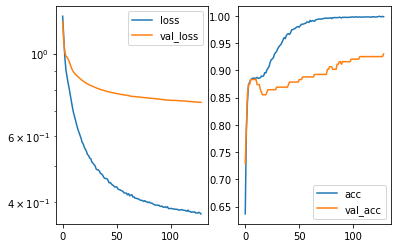

Predicted cell: Cells Probability: [[0.99968684]]
True Cell type: Cells
x [[0.8389049]]
True positional value x 0.7083333333333334
y [[0.66473454]]
True positional value y 0.5


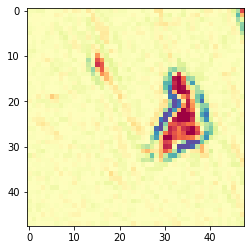

Epoch 130/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.3751 - acc: 0.9983 - val_loss: 0.7403 - val_acc: 0.9299

Epoch 00130: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.7402517645158501, 'val_acc': 0.9299065192169118, 'loss': 0.3750899008751268, 'acc': 0.9982754389444987, 'lr': 1e-06}


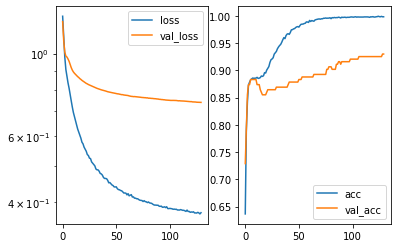

Predicted cell: Cells Probability: [[0.9954424]]
True Cell type: Cells
x [[0.4497406]]
True positional value x 0.7083333333333334
y [[0.4659617]]
True positional value y 0.7083333333333334


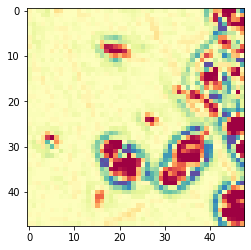

Epoch 131/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.3718 - acc: 0.9993 - val_loss: 0.7404 - val_acc: 0.9299

Epoch 00131: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.7404202122554601, 'val_acc': 0.9299065192169118, 'loss': 0.37184503306658817, 'acc': 0.9992609024047852, 'lr': 1e-06}


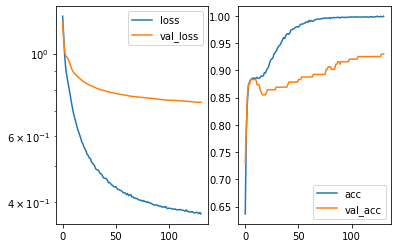

Predicted cell: Normal Probability: [[0.58148825]]
True Cell type: Normal
x [[0.6945097]]
True positional value x 0.5
y [[0.60580105]]
True positional value y 0.5


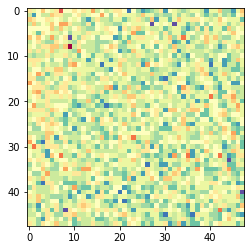

Epoch 132/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.3735 - acc: 0.9983 - val_loss: 0.7403 - val_acc: 0.9299

Epoch 00132: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.7402599114123906, 'val_acc': 0.9299065192169118, 'loss': 0.3734599038073805, 'acc': 0.9982754389444987, 'lr': 1e-06}


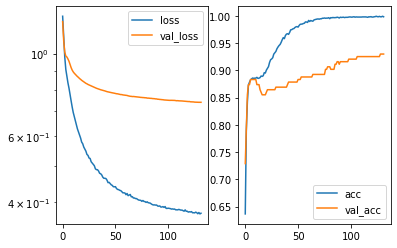

Predicted cell: Cells Probability: [[0.9746055]]
True Cell type: Cells
x [[0.5224243]]
True positional value x 0.2916666666666667
y [[0.8553166]]
True positional value y 0.7083333333333334


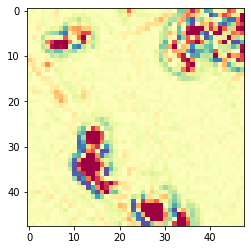

Epoch 133/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.3722 - acc: 0.9988 - val_loss: 0.7405 - val_acc: 0.9299

Epoch 00133: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.740455580091922, 'val_acc': 0.9299065192169118, 'loss': 0.3722031607096875, 'acc': 0.998768170674642, 'lr': 1e-06}


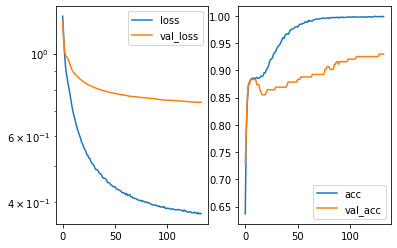

Predicted cell: Cells Probability: [[0.9975267]]
True Cell type: Cells
x [[0.5543249]]
True positional value x 0.2916666666666667
y [[0.41429374]]
True positional value y 0.2916666666666667


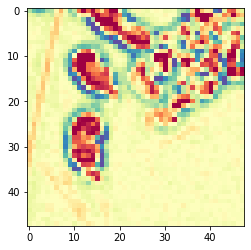

Epoch 134/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.3721 - acc: 0.9988 - val_loss: 0.7396 - val_acc: 0.9299

Epoch 00134: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.739636933135095, 'val_acc': 0.9299065192169118, 'loss': 0.37214171368078985, 'acc': 0.998768170674642, 'lr': 1e-06}


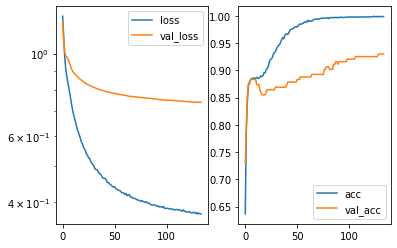

Predicted cell: Cells Probability: [[0.9954508]]
True Cell type: Cells
x [[0.4273032]]
True positional value x 0.7083333333333334
y [[0.45215073]]
True positional value y 0.2916666666666667


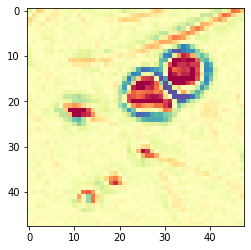

Epoch 135/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.3712 - acc: 0.9990 - val_loss: 0.7398 - val_acc: 0.9299

Epoch 00135: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.7397925614196563, 'val_acc': 0.9299065192169118, 'loss': 0.3711720921409397, 'acc': 0.9990145365397135, 'lr': 1e-06}


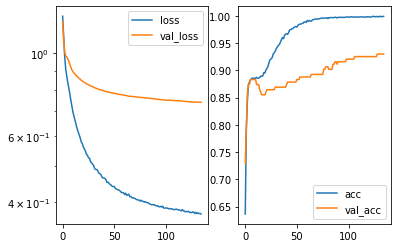

Predicted cell: Cells Probability: [[0.97845435]]
True Cell type: Cells
x [[0.39944515]]
True positional value x 0.2916666666666667
y [[0.61963195]]
True positional value y 0.7083333333333334


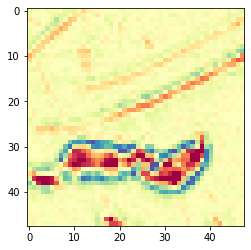

Epoch 136/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.3718 - acc: 0.9998 - val_loss: 0.7392 - val_acc: 0.9299

Epoch 00136: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.7392162780895412, 'val_acc': 0.9299065192169118, 'loss': 0.3717752172092876, 'acc': 0.9997536341349283, 'lr': 1e-06}


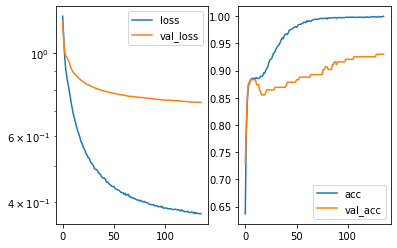

Predicted cell: Normal Probability: [[0.7699271]]
True Cell type: Normal
x [[0.42397168]]
True positional value x 0.5
y [[0.6850098]]
True positional value y 0.5


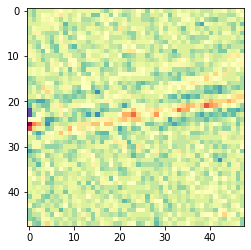

Epoch 137/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.3724 - acc: 0.9990 - val_loss: 0.7396 - val_acc: 0.9299

Epoch 00137: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.7396405511927382, 'val_acc': 0.9299065192169118, 'loss': 0.3723772406563379, 'acc': 0.9990145365397135, 'lr': 1e-06}


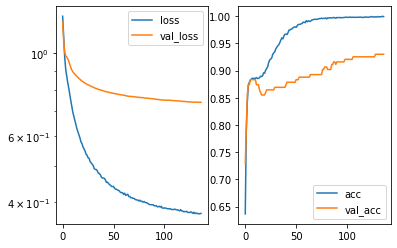

Predicted cell: Cells Probability: [[0.9842572]]
True Cell type: Cells
x [[0.4287]]
True positional value x 0.2916666666666667
y [[0.22070408]]
True positional value y 0.2916666666666667


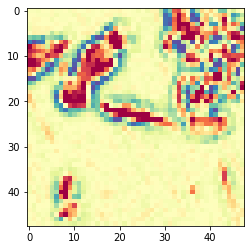

Epoch 138/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.3711 - acc: 0.9995 - val_loss: 0.7387 - val_acc: 0.9299

Epoch 00138: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.7386872133361959, 'val_acc': 0.9299065192169118, 'loss': 0.3710781606320355, 'acc': 0.9995072682698568, 'lr': 1e-06}


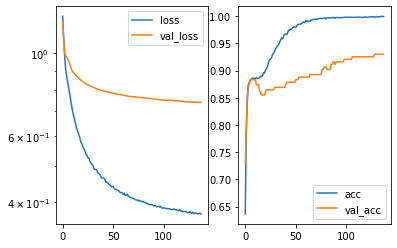

Predicted cell: Cells Probability: [[0.9974613]]
True Cell type: Cells
x [[0.21655405]]
True positional value x 0.5
y [[0.6392171]]
True positional value y 0.7083333333333334


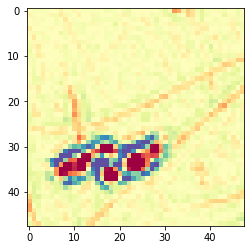

Epoch 139/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.3715 - acc: 0.9993 - val_loss: 0.7385 - val_acc: 0.9299

Epoch 00139: ReduceLROnPlateau reducing learning rate to 9.999999974752428e-08.

Epoch 00139: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.7384601530627669, 'val_acc': 0.9299065192169118, 'loss': 0.3715166502851781, 'acc': 0.9992609024047852, 'lr': 1e-06}


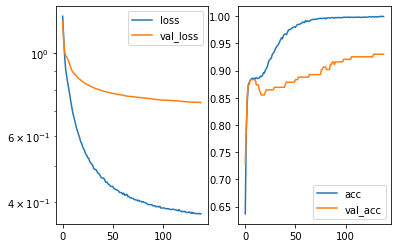

Predicted cell: Cells Probability: [[0.97157526]]
True Cell type: Cells
x [[0.36971074]]
True positional value x 0.2916666666666667
y [[0.41950712]]
True positional value y 0.2916666666666667


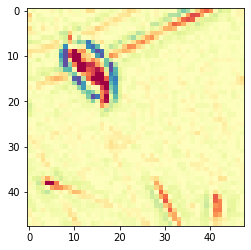

Epoch 140/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.3720 - acc: 0.9993 - val_loss: 0.7383 - val_acc: 0.9299

Epoch 00140: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.7383137740821482, 'val_acc': 0.9299065192169118, 'loss': 0.3719996431685046, 'acc': 0.9992609024047852, 'lr': 1e-07}


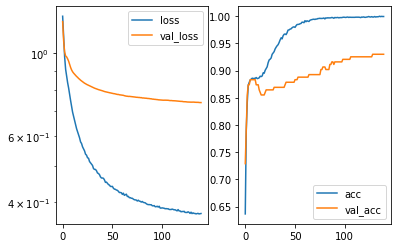

Predicted cell: Cells Probability: [[0.9608322]]
True Cell type: Normal
x [[0.4653499]]
True positional value x 0.5
y [[0.4643904]]
True positional value y 0.5


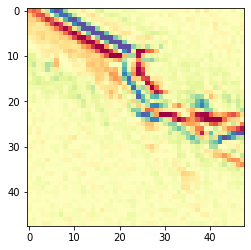

Epoch 141/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.3700 - acc: 0.9988 - val_loss: 0.7380 - val_acc: 0.9299

Epoch 00141: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.7379713894050812, 'val_acc': 0.9299065192169118, 'loss': 0.37004735622390733, 'acc': 0.998768170674642, 'lr': 1e-07}


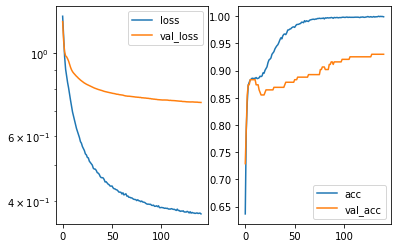

Predicted cell: Cells Probability: [[0.99247074]]
True Cell type: Cells
x [[0.28570732]]
True positional value x 0.2916666666666667
y [[0.28783157]]
True positional value y 0.5


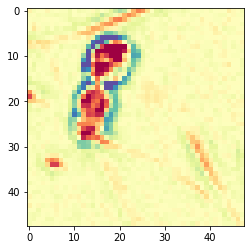

Epoch 142/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.3715 - acc: 0.9995 - val_loss: 0.7378 - val_acc: 0.9299

Epoch 00142: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.7377585490173268, 'val_acc': 0.9299065192169118, 'loss': 0.3714523222916935, 'acc': 0.9995072682698568, 'lr': 1e-07}


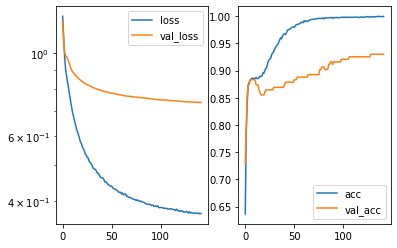

Predicted cell: Cells Probability: [[0.99898714]]
True Cell type: Cells
x [[0.8039717]]
True positional value x 0.7083333333333334
y [[0.17181453]]
True positional value y 0.2916666666666667


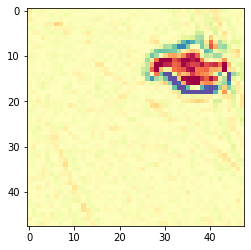

Epoch 143/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.3713 - acc: 0.9993 - val_loss: 0.7378 - val_acc: 0.9299

Epoch 00143: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.7377618567965855, 'val_acc': 0.9299065192169118, 'loss': 0.37129441460942836, 'acc': 0.9992609024047852, 'lr': 1e-07}


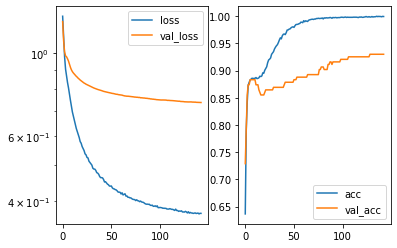

Predicted cell: Cells Probability: [[0.99572986]]
True Cell type: Cells
x [[0.16881879]]
True positional value x 0.7083333333333334
y [[0.51768917]]
True positional value y 0.7083333333333334


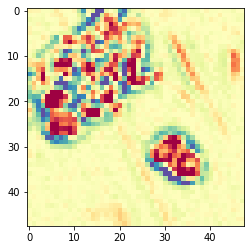

Epoch 144/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.3700 - acc: 0.9995 - val_loss: 0.7377 - val_acc: 0.9299

Epoch 00144: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.7377067809907075, 'val_acc': 0.9299065192169118, 'loss': 0.37004473787071845, 'acc': 0.9995072682698568, 'lr': 1e-07}


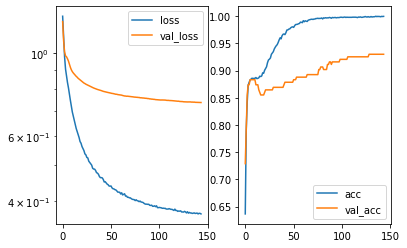

Predicted cell: Cells Probability: [[0.99626046]]
True Cell type: Cells
x [[0.3464929]]
True positional value x 0.5
y [[0.46372944]]
True positional value y 0.2916666666666667


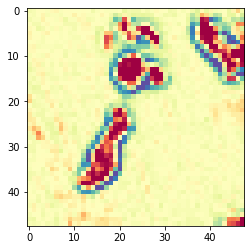

Epoch 145/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.3704 - acc: 0.9990 - val_loss: 0.7376 - val_acc: 0.9299

Epoch 00145: ReduceLROnPlateau reducing learning rate to 1.0000000116860975e-08.

Epoch 00145: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.7375680503444136, 'val_acc': 0.9299065192169118, 'loss': 0.3704175842266477, 'acc': 0.9990145365397135, 'lr': 1e-07}


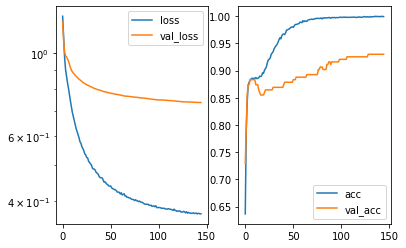

Predicted cell: Cells Probability: [[0.9819051]]
True Cell type: Cells
x [[0.28166315]]
True positional value x 0.2916666666666667
y [[0.53190297]]
True positional value y 0.7083333333333334


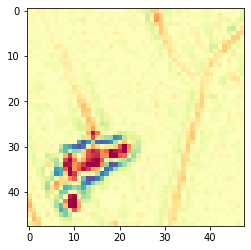

Epoch 146/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.3703 - acc: 0.9988 - val_loss: 0.7375 - val_acc: 0.9299

Epoch 00146: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.7375021866548841, 'val_acc': 0.9299065192169118, 'loss': 0.37027569813045796, 'acc': 0.998768170674642, 'lr': 1e-08}


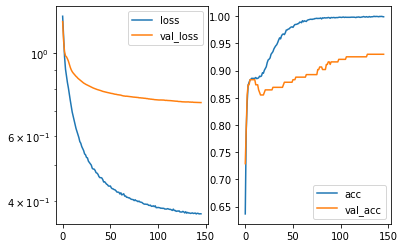

Predicted cell: Normal Probability: [[0.7822604]]
True Cell type: Normal
x [[0.42884615]]
True positional value x 0.5
y [[0.68977606]]
True positional value y 0.5


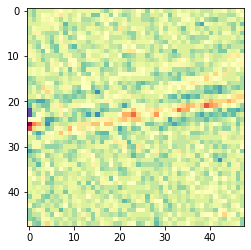

Epoch 147/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.3711 - acc: 0.9983 - val_loss: 0.7376 - val_acc: 0.9299

Epoch 00147: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.737622736770416, 'val_acc': 0.9299065192169118, 'loss': 0.37113991077235836, 'acc': 0.9982754383571162, 'lr': 1e-08}


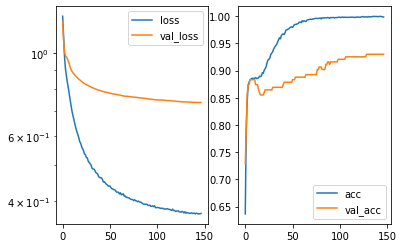

Predicted cell: Cells Probability: [[0.9881981]]
True Cell type: Cells
x [[0.47907466]]
True positional value x 0.2916666666666667
y [[0.67953116]]
True positional value y 0.7083333333333334


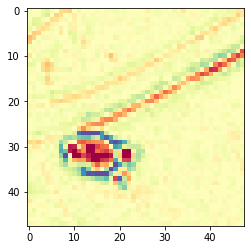

Epoch 148/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.3689 - acc: 0.9990 - val_loss: 0.7377 - val_acc: 0.9299

Epoch 00148: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.7376675438658099, 'val_acc': 0.9299065192169118, 'loss': 0.3688537016250312, 'acc': 0.9990145365397135, 'lr': 1e-08}


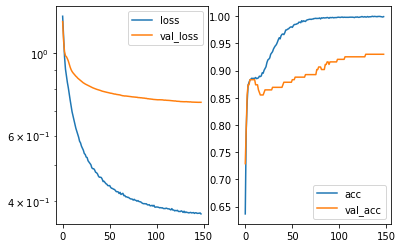

Predicted cell: Cells Probability: [[0.71930736]]
True Cell type: Normal
x [[0.5648517]]
True positional value x 0.5
y [[0.8253451]]
True positional value y 0.5


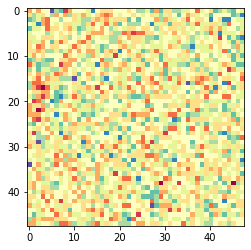

Epoch 149/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.3697 - acc: 0.9993 - val_loss: 0.7376 - val_acc: 0.9299

Epoch 00149: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.7376363934757554, 'val_acc': 0.9299065192169118, 'loss': 0.3696606603565108, 'acc': 0.9992609024047852, 'lr': 1e-08}


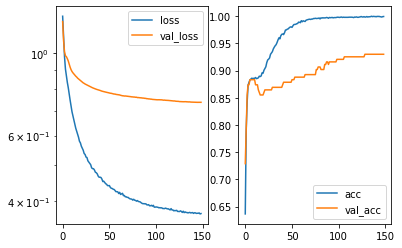

Predicted cell: Cells Probability: [[0.62295413]]
True Cell type: Normal
x [[0.39822617]]
True positional value x 0.5
y [[0.52627426]]
True positional value y 0.5


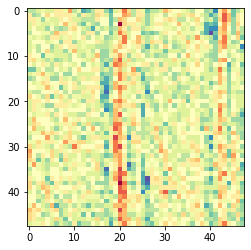

Epoch 150/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.3710 - acc: 0.9990 - val_loss: 0.7378 - val_acc: 0.9299

Epoch 00150: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.7377593116225484, 'val_acc': 0.9299065192169118, 'loss': 0.3709783774051915, 'acc': 0.9990145365397135, 'lr': 1e-08}


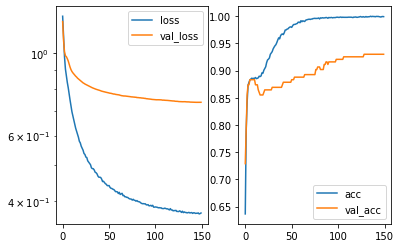

Predicted cell: Cells Probability: [[0.99549735]]
True Cell type: Cells
x [[0.37470987]]
True positional value x 0.7083333333333334
y [[0.46786934]]
True positional value y 0.2916666666666667


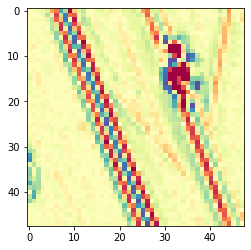

Epoch 151/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.3706 - acc: 0.9993 - val_loss: 0.7377 - val_acc: 0.9299

Epoch 00151: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.7377171416148961, 'val_acc': 0.9299065192169118, 'loss': 0.3705735341114609, 'acc': 0.9992609024047852, 'lr': 1e-08}


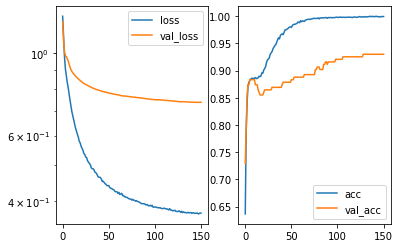

Predicted cell: Cells Probability: [[0.8956359]]
True Cell type: Cells
x [[0.48659557]]
True positional value x 0.7083333333333334
y [[0.61501366]]
True positional value y 0.2916666666666667


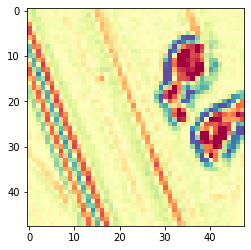

Epoch 152/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.3721 - acc: 0.9993 - val_loss: 0.7378 - val_acc: 0.9299

Epoch 00152: ReduceLROnPlateau reducing learning rate to 9.999999939225292e-10.

Epoch 00152: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.7377736145090834, 'val_acc': 0.9299065192169118, 'loss': 0.3720573952747819, 'acc': 0.9992609024047852, 'lr': 1e-08}


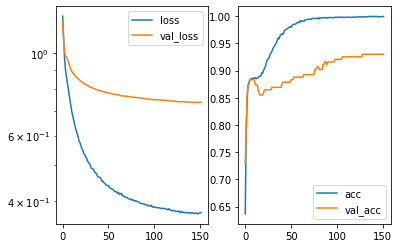

Predicted cell: Cells Probability: [[0.9792746]]
True Cell type: Cells
x [[0.21610326]]
True positional value x 0.2916666666666667
y [[0.2507689]]
True positional value y 0.2916666666666667


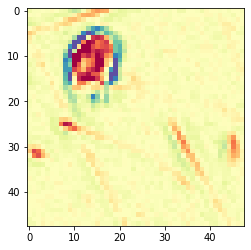

Epoch 153/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.3716 - acc: 0.9990 - val_loss: 0.7377 - val_acc: 0.9299

Epoch 00153: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.7377337607267861, 'val_acc': 0.9299065192169118, 'loss': 0.3715836055820932, 'acc': 0.9990145365397135, 'lr': 1e-09}


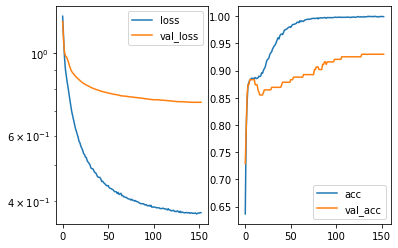

Predicted cell: Cells Probability: [[0.62263423]]
True Cell type: Normal
x [[0.3991825]]
True positional value x 0.5
y [[0.52717805]]
True positional value y 0.5


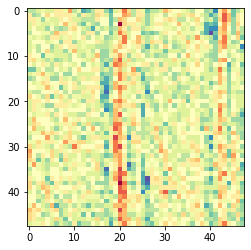

Epoch 154/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.3715 - acc: 0.9993 - val_loss: 0.7378 - val_acc: 0.9299

Epoch 00154: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.7377964870952, 'val_acc': 0.9299065192169118, 'loss': 0.37148547284149075, 'acc': 0.9992609018174026, 'lr': 1e-09}


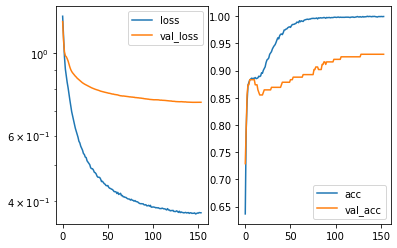

Predicted cell: Cells Probability: [[0.9997503]]
True Cell type: Cells
x [[0.8388756]]
True positional value x 0.7083333333333334
y [[0.6695835]]
True positional value y 0.5


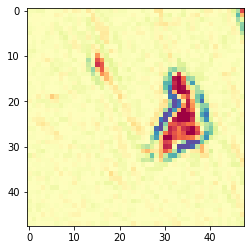

Epoch 155/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.3718 - acc: 0.9995 - val_loss: 0.7378 - val_acc: 0.9299

Epoch 00155: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.7378037677747067, 'val_acc': 0.9299065192169118, 'loss': 0.3718096279810144, 'acc': 0.9995072682698568, 'lr': 1e-09}


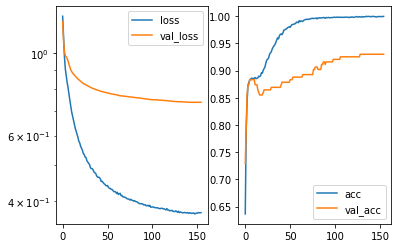

Predicted cell: Cells Probability: [[0.99227726]]
True Cell type: Cells
x [[0.33298868]]
True positional value x 0.2916666666666667
y [[0.48228833]]
True positional value y 0.2916666666666667


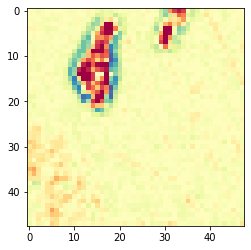

Epoch 156/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.3697 - acc: 0.9993 - val_loss: 0.7378 - val_acc: 0.9299

Epoch 00156: ReduceLROnPlateau reducing learning rate to 9.999999717180686e-11.

Epoch 00156: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.7377696939717944, 'val_acc': 0.9299065192169118, 'loss': 0.369698394142251, 'acc': 0.9992609024047852, 'lr': 1e-09}


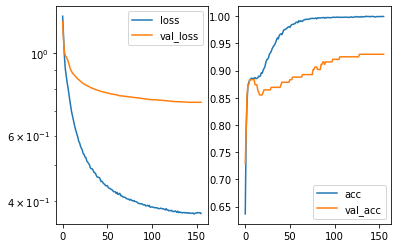

Predicted cell: Cells Probability: [[0.99896824]]
True Cell type: Cells
x [[0.12387463]]
True positional value x 0.2916666666666667
y [[0.4269667]]
True positional value y 0.5


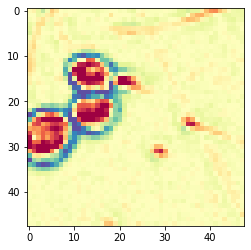

Epoch 157/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.3687 - acc: 0.9993 - val_loss: 0.7378 - val_acc: 0.9299

Epoch 00157: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.7377770559810032, 'val_acc': 0.9299065192169118, 'loss': 0.3686946394056427, 'acc': 0.9992609024047852, 'lr': 9.9999994e-11}


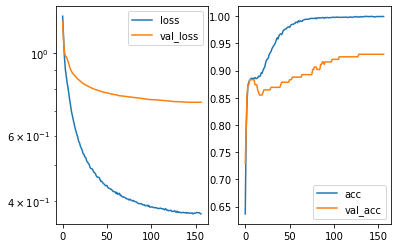

Predicted cell: Cells Probability: [[0.9758213]]
True Cell type: Cells
x [[0.3287913]]
True positional value x 0.2916666666666667
y [[0.6552433]]
True positional value y 0.7083333333333334


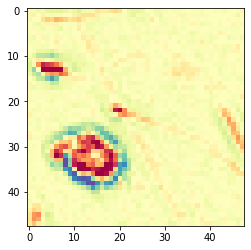

Epoch 158/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.3692 - acc: 0.9990 - val_loss: 0.7377 - val_acc: 0.9299

Epoch 00158: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.7377223968505859, 'val_acc': 0.9299065192169118, 'loss': 0.36919120041482345, 'acc': 0.9990145365397135, 'lr': 9.9999994e-11}


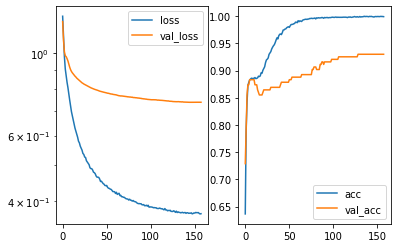

Predicted cell: Cells Probability: [[0.9721105]]
True Cell type: Cells
x [[0.37150112]]
True positional value x 0.2916666666666667
y [[0.42164114]]
True positional value y 0.2916666666666667


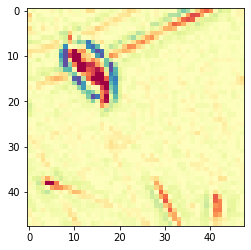

Epoch 159/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.3710 - acc: 0.9995 - val_loss: 0.7377 - val_acc: 0.9299

Epoch 00159: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.7377319670169153, 'val_acc': 0.9299065192169118, 'loss': 0.3710023330023912, 'acc': 0.9995072682698568, 'lr': 9.9999994e-11}


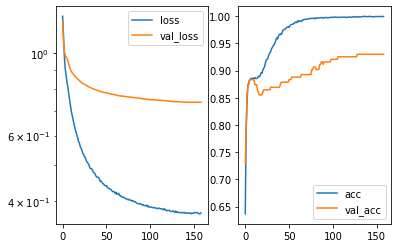

Predicted cell: Cells Probability: [[0.9854484]]
True Cell type: Cells
x [[0.240406]]
True positional value x 0.5
y [[0.45700717]]
True positional value y 0.5


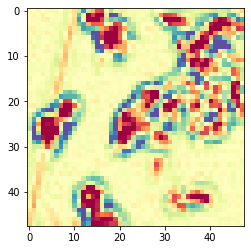

Epoch 160/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.3701 - acc: 0.9990 - val_loss: 0.7377 - val_acc: 0.9299

Epoch 00160: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.7377473828948546, 'val_acc': 0.9299065192169118, 'loss': 0.3700766409888412, 'acc': 0.9990145365397135, 'lr': 9.9999994e-11}


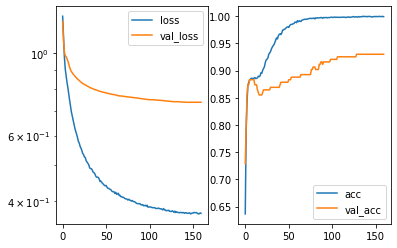

Predicted cell: Cells Probability: [[0.957221]]
True Cell type: Cells
x [[0.46509078]]
True positional value x 0.5
y [[0.18848938]]
True positional value y 0.5


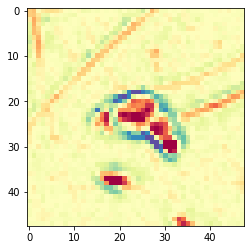

Epoch 161/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.3691 - acc: 0.9993 - val_loss: 0.7377 - val_acc: 0.9299

Epoch 00161: ReduceLROnPlateau reducing learning rate to 9.99999943962493e-12.

Epoch 00161: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.7377025446045065, 'val_acc': 0.9299065192169118, 'loss': 0.3690692217927403, 'acc': 0.9992609024047852, 'lr': 9.9999994e-11}


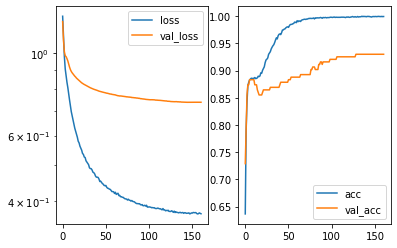

Predicted cell: Cells Probability: [[0.98573303]]
True Cell type: Cells
x [[0.33623466]]
True positional value x 0.2916666666666667
y [[0.8365484]]
True positional value y 0.7083333333333334


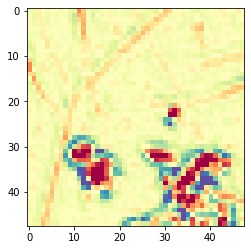

Epoch 162/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.3700 - acc: 0.9990 - val_loss: 0.7377 - val_acc: 0.9299

Epoch 00162: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.7377402804722296, 'val_acc': 0.9299065192169118, 'loss': 0.3700169151670447, 'acc': 0.9990145365397135, 'lr': 9.999999e-12}


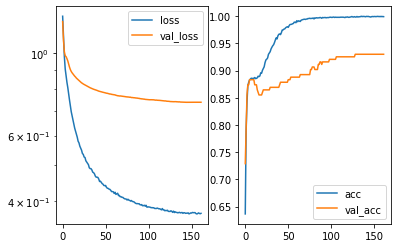

Predicted cell: Cells Probability: [[0.9964706]]
True Cell type: Cells
x [[0.9218907]]
True positional value x 0.7083333333333334
y [[0.30884632]]
True positional value y 0.7083333333333334


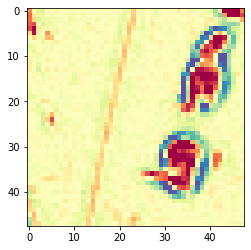

Epoch 163/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.3712 - acc: 0.9990 - val_loss: 0.7379 - val_acc: 0.9299

Epoch 00163: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.7378870906116807, 'val_acc': 0.9299065192169118, 'loss': 0.3712137132537985, 'acc': 0.999014535952331, 'lr': 9.999999e-12}


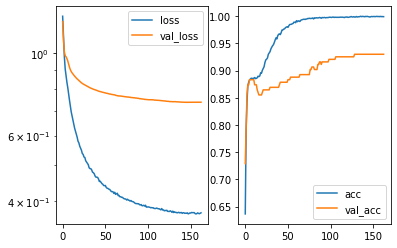

Predicted cell: Cells Probability: [[0.97504234]]
True Cell type: Cells
x [[0.47548035]]
True positional value x 0.7083333333333334
y [[0.81366366]]
True positional value y 0.5


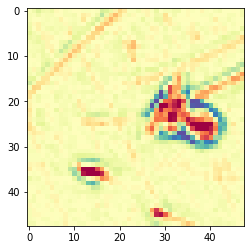

Epoch 164/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.3713 - acc: 0.9990 - val_loss: 0.7378 - val_acc: 0.9299

Epoch 00164: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.7378397188454031, 'val_acc': 0.9299065192169118, 'loss': 0.37131239093856644, 'acc': 0.9990145365397135, 'lr': 9.999999e-12}


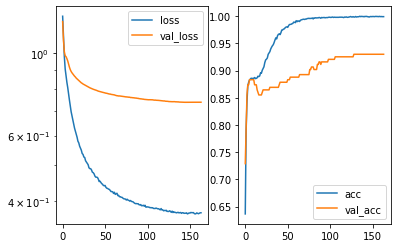

Predicted cell: Cells Probability: [[0.9831383]]
True Cell type: Cells
x [[0.4113931]]
True positional value x 0.7083333333333334
y [[0.542404]]
True positional value y 0.2916666666666667


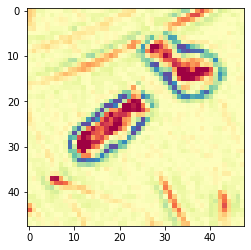

Epoch 165/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.3694 - acc: 0.9993 - val_loss: 0.7377 - val_acc: 0.9299

Epoch 00165: ReduceLROnPlateau reducing learning rate to 9.999999092680235e-13.

Epoch 00165: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.7377419616574439, 'val_acc': 0.9299065192169118, 'loss': 0.3694304356025222, 'acc': 0.9992609024047852, 'lr': 9.999999e-12}


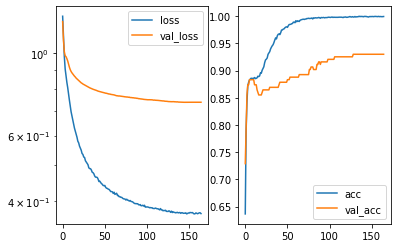

Predicted cell: Cells Probability: [[0.98561263]]
True Cell type: Cells
x [[0.5149711]]
True positional value x 0.7083333333333334
y [[0.40092888]]
True positional value y 0.2916666666666667


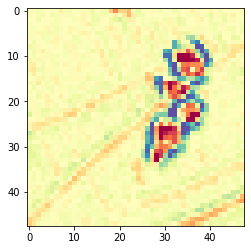

Epoch 166/250
4059/4059 [==============================] - 4s 1ms/step - loss: 0.3692 - acc: 0.9993 - val_loss: 0.7378 - val_acc: 0.9299

Epoch 00166: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.7377551159011984, 'val_acc': 0.9299065192169118, 'loss': 0.36920806435153647, 'acc': 0.9992609024047852, 'lr': 9.999999e-13}


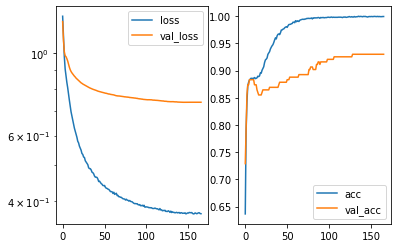

Predicted cell: Cells Probability: [[0.99878293]]
True Cell type: Cells
x [[0.79472166]]
True positional value x 0.7083333333333334
y [[0.34082073]]
True positional value y 0.2916666666666667


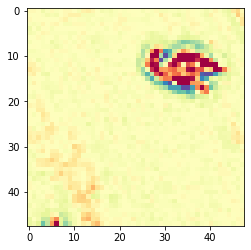

Epoch 167/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.3686 - acc: 0.9988 - val_loss: 0.7377 - val_acc: 0.9299

Epoch 00167: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.7377400509664945, 'val_acc': 0.9299065192169118, 'loss': 0.36861028121180883, 'acc': 0.998768170674642, 'lr': 9.999999e-13}


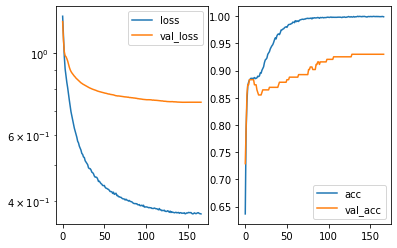

Predicted cell: Cells Probability: [[0.9533953]]
True Cell type: Cells
x [[0.23864694]]
True positional value x 0.2916666666666667
y [[0.29491523]]
True positional value y 0.5


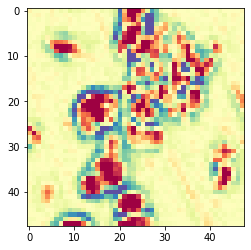

Epoch 168/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.3699 - acc: 0.9990 - val_loss: 0.7378 - val_acc: 0.9299

Epoch 00168: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.737772151688549, 'val_acc': 0.9299065192169118, 'loss': 0.3699381198017255, 'acc': 0.9990145365397135, 'lr': 9.999999e-13}


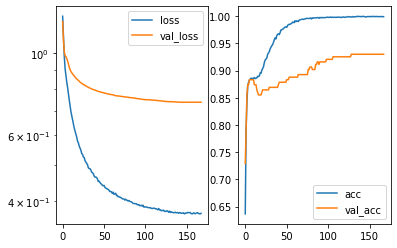

Predicted cell: Cells Probability: [[0.98200846]]
True Cell type: Cells
x [[0.7308122]]
True positional value x 0.7083333333333334
y [[0.32867253]]
True positional value y 0.2916666666666667


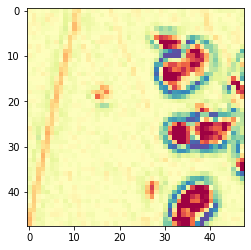

Epoch 169/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.3694 - acc: 0.9988 - val_loss: 0.7377 - val_acc: 0.9299

Epoch 00169: ReduceLROnPlateau reducing learning rate to 9.9999988758398e-14.

Epoch 00169: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.7376980135373981, 'val_acc': 0.9299065192169118, 'loss': 0.3694447418846911, 'acc': 0.998768170674642, 'lr': 9.999999e-13}


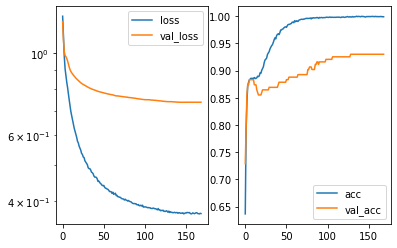

Predicted cell: Cells Probability: [[0.9994597]]
True Cell type: Cells
x [[0.571897]]
True positional value x 0.2916666666666667
y [[0.48387846]]
True positional value y 0.2916666666666667


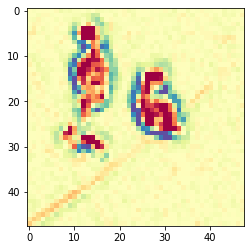

Epoch 170/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.3694 - acc: 0.9995 - val_loss: 0.7376 - val_acc: 0.9299

Epoch 00170: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.7376465396346333, 'val_acc': 0.9299065192169118, 'loss': 0.36938208335724687, 'acc': 0.9995072682698568, 'lr': 9.999999e-14}


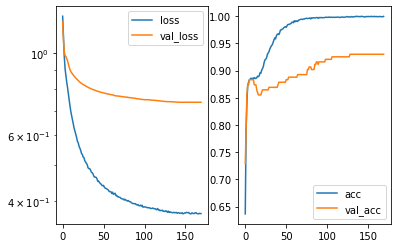

Predicted cell: Cells Probability: [[0.99016035]]
True Cell type: Cells
x [[0.8168906]]
True positional value x 0.7083333333333334
y [[0.7129312]]
True positional value y 0.7083333333333334


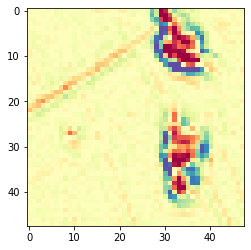

Epoch 171/250
4059/4059 [==============================] - 4s 1ms/step - loss: 0.3700 - acc: 0.9995 - val_loss: 0.7377 - val_acc: 0.9299

Epoch 00171: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.7376863254564945, 'val_acc': 0.9299065192169118, 'loss': 0.3700209246844193, 'acc': 0.9995072682698568, 'lr': 9.999999e-14}


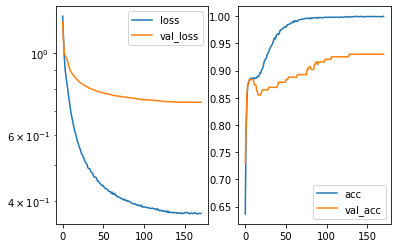

Predicted cell: Cells Probability: [[0.5229576]]
True Cell type: Normal
x [[0.6319499]]
True positional value x 0.5
y [[0.48746932]]
True positional value y 0.5


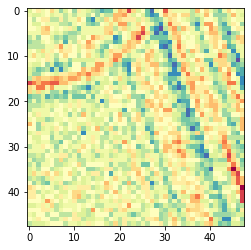

Epoch 172/250
4059/4059 [==============================] - 4s 1ms/step - loss: 0.3702 - acc: 0.9995 - val_loss: 0.7377 - val_acc: 0.9299

Epoch 00172: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.7377401389808298, 'val_acc': 0.9299065192169118, 'loss': 0.3701761182627968, 'acc': 0.9995072682698568, 'lr': 9.999999e-14}


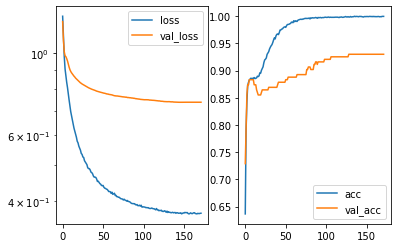

Predicted cell: Cells Probability: [[0.992882]]
True Cell type: Cells
x [[0.3540853]]
True positional value x 0.2916666666666667
y [[0.77848184]]
True positional value y 0.7083333333333334


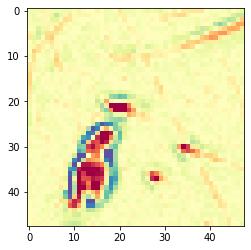

Epoch 173/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.3707 - acc: 0.9988 - val_loss: 0.7377 - val_acc: 0.9299

Epoch 00173: ReduceLROnPlateau reducing learning rate to 9.999999146890344e-15.

Epoch 00173: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.7376538102871903, 'val_acc': 0.9299065192169118, 'loss': 0.3707382571714857, 'acc': 0.998768170674642, 'lr': 9.999999e-14}


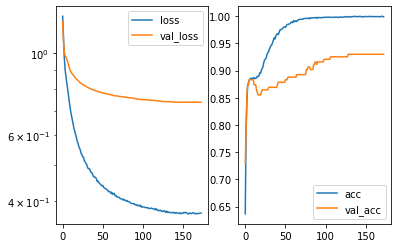

Predicted cell: Cells Probability: [[0.9969472]]
True Cell type: Cells
x [[0.42921117]]
True positional value x 0.5
y [[0.24298516]]
True positional value y 0.2916666666666667


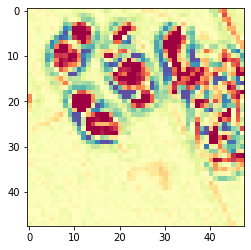

Epoch 174/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.3704 - acc: 0.9993 - val_loss: 0.7378 - val_acc: 0.9299

Epoch 00174: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.7378073106302279, 'val_acc': 0.9299065192169118, 'loss': 0.3703612898276574, 'acc': 0.9992609024047852, 'lr': 9.999999e-15}


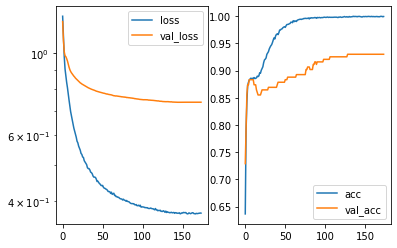

Predicted cell: Cells Probability: [[0.9943137]]
True Cell type: Cells
x [[0.69905967]]
True positional value x 0.7083333333333334
y [[0.49545676]]
True positional value y 0.5


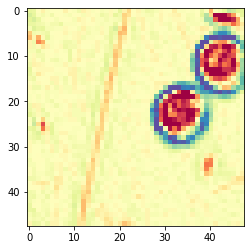

Epoch 175/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.3700 - acc: 0.9990 - val_loss: 0.7378 - val_acc: 0.9299

Epoch 00175: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.7377567748043025, 'val_acc': 0.9299065192169118, 'loss': 0.36999205710794514, 'acc': 0.9990145365397135, 'lr': 9.999999e-15}


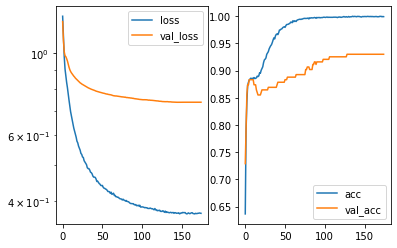

Predicted cell: Cells Probability: [[0.98574185]]
True Cell type: Cells
x [[0.17354186]]
True positional value x 0.2916666666666667
y [[0.6063583]]
True positional value y 0.7083333333333334


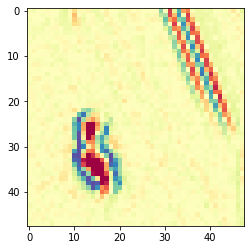

Epoch 176/250
4059/4059 [==============================] - 4s 1ms/step - loss: 0.3703 - acc: 0.9995 - val_loss: 0.7377 - val_acc: 0.9299

Epoch 00176: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.737733579127588, 'val_acc': 0.9299065192169118, 'loss': 0.37029292300640876, 'acc': 0.9995072682698568, 'lr': 9.999999e-15}


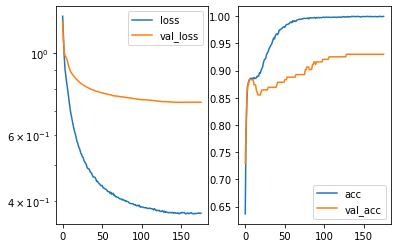

Predicted cell: Cells Probability: [[0.9969812]]
True Cell type: Cells
x [[0.33100584]]
True positional value x 0.5
y [[0.5857185]]
True positional value y 0.5


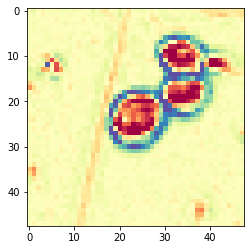

Epoch 177/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.3729 - acc: 0.9988 - val_loss: 0.7377 - val_acc: 0.9299

Epoch 00177: ReduceLROnPlateau reducing learning rate to 9.999998977483753e-16.

Epoch 00177: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.7376714877993147, 'val_acc': 0.9299065192169118, 'loss': 0.3729289065928082, 'acc': 0.998768170674642, 'lr': 9.999999e-15}


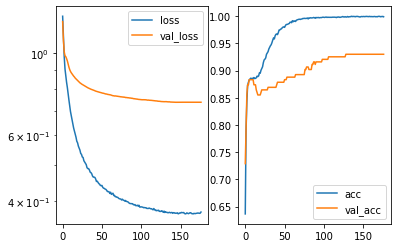

Predicted cell: Cells Probability: [[0.9925687]]
True Cell type: Cells
x [[0.2882288]]
True positional value x 0.2916666666666667
y [[0.28763956]]
True positional value y 0.5


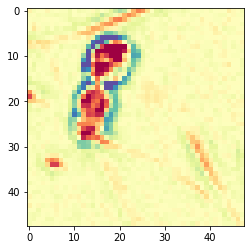

Epoch 178/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.3692 - acc: 0.9993 - val_loss: 0.7377 - val_acc: 0.9299

Epoch 00178: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.737723646876968, 'val_acc': 0.9299065192169118, 'loss': 0.36924100507360047, 'acc': 0.9992609024047852, 'lr': 9.999999e-16}


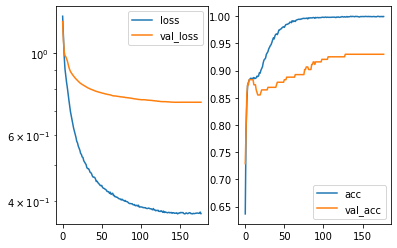

Predicted cell: Cells Probability: [[0.9876835]]
True Cell type: Cells
x [[0.6633035]]
True positional value x 0.7083333333333334
y [[0.6429175]]
True positional value y 0.5


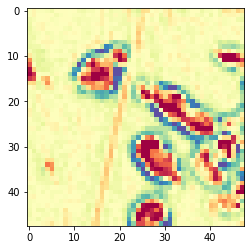

Epoch 179/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.3728 - acc: 0.9993 - val_loss: 0.7378 - val_acc: 0.9299

Epoch 00179: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.7377723210325865, 'val_acc': 0.9299065192169118, 'loss': 0.3728443809215234, 'acc': 0.9992609018174026, 'lr': 9.999999e-16}


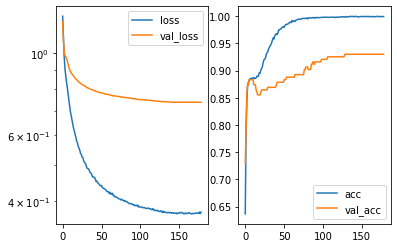

Predicted cell: Cells Probability: [[0.98582315]]
True Cell type: Cells
x [[0.336352]]
True positional value x 0.2916666666666667
y [[0.8365243]]
True positional value y 0.7083333333333334


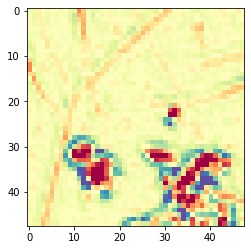

Epoch 180/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.3703 - acc: 0.9988 - val_loss: 0.7378 - val_acc: 0.9299

Epoch 00180: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.7378208525826998, 'val_acc': 0.9299065192169118, 'loss': 0.3703303986742274, 'acc': 0.998768170674642, 'lr': 9.999999e-16}


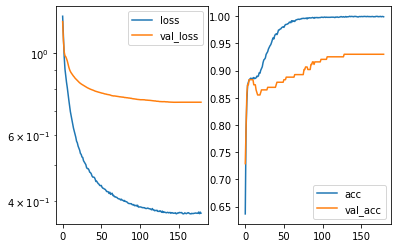

Predicted cell: Cells Probability: [[0.9944074]]
True Cell type: Cells
x [[0.5580377]]
True positional value x 0.5
y [[0.38585812]]
True positional value y 0.2916666666666667


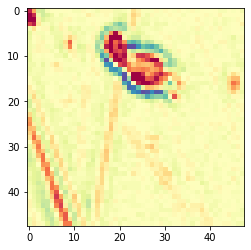

Epoch 181/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.3687 - acc: 0.9993 - val_loss: 0.7378 - val_acc: 0.9299

Epoch 00181: ReduceLROnPlateau reducing learning rate to 9.999998977483754e-17.

Epoch 00181: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.7377596491965178, 'val_acc': 0.9299065192169118, 'loss': 0.3687252203550031, 'acc': 0.9992609024047852, 'lr': 9.999999e-16}


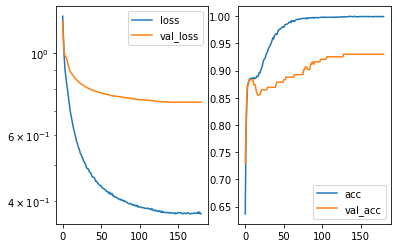

Predicted cell: Cells Probability: [[0.9704789]]
True Cell type: Cells
x [[0.455238]]
True positional value x 0.5
y [[0.59157354]]
True positional value y 0.7083333333333334


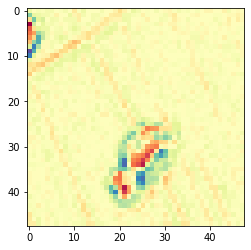

Epoch 182/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.3699 - acc: 0.9990 - val_loss: 0.7377 - val_acc: 0.9299

Epoch 00182: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.7377057153487874, 'val_acc': 0.9299065192169118, 'loss': 0.36987037998932754, 'acc': 0.9990145365397135, 'lr': 9.999999e-17}


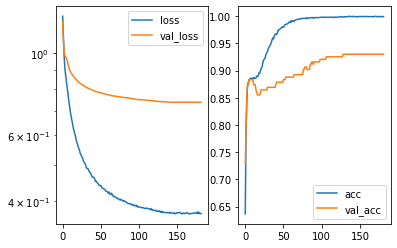

Predicted cell: Cells Probability: [[0.88148594]]
True Cell type: Cells
x [[0.5371798]]
True positional value x 0.2916666666666667
y [[0.6136326]]
True positional value y 0.7083333333333334


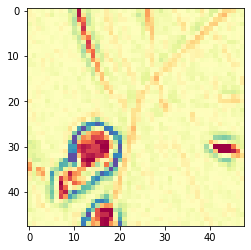

Epoch 183/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.3694 - acc: 0.9988 - val_loss: 0.7377 - val_acc: 0.9299

Epoch 00183: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.7377365214802395, 'val_acc': 0.9299065192169118, 'loss': 0.3694390586647796, 'acc': 0.998768170674642, 'lr': 9.999999e-17}


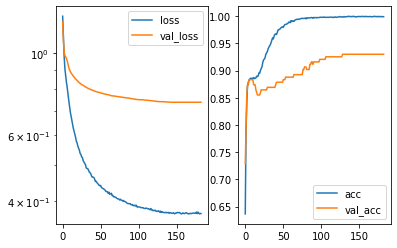

Predicted cell: Cells Probability: [[0.9166266]]
True Cell type: Cells
x [[0.6092243]]
True positional value x 0.7083333333333334
y [[0.7284007]]
True positional value y 0.7083333333333334


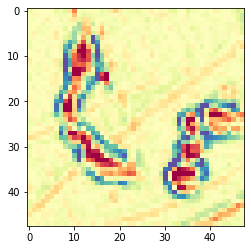

Epoch 184/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.3701 - acc: 0.9993 - val_loss: 0.7377 - val_acc: 0.9299

Epoch 00184: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.7377282559314621, 'val_acc': 0.9299065192169118, 'loss': 0.37010163579794186, 'acc': 0.9992609018174026, 'lr': 9.999999e-17}


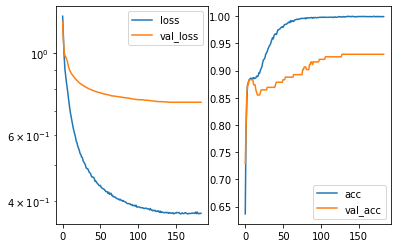

Predicted cell: Cells Probability: [[0.9942812]]
True Cell type: Cells
x [[0.33043855]]
True positional value x 0.2916666666666667
y [[0.4727291]]
True positional value y 0.5


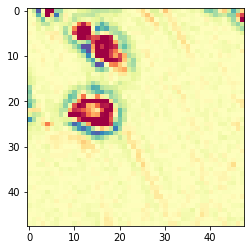

Epoch 185/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.3700 - acc: 0.9990 - val_loss: 0.7377 - val_acc: 0.9299

Epoch 00185: ReduceLROnPlateau reducing learning rate to 9.999998845134856e-18.

Epoch 00185: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.7376850564903188, 'val_acc': 0.9299065192169118, 'loss': 0.36996495918294836, 'acc': 0.9990145365397135, 'lr': 9.999999e-17}


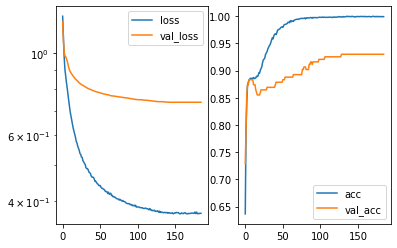

Predicted cell: Cells Probability: [[0.9646171]]
True Cell type: Cells
x [[0.6690202]]
True positional value x 0.5
y [[0.35334837]]
True positional value y 0.2916666666666667


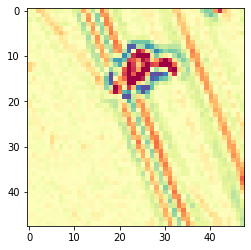

Epoch 186/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.3706 - acc: 0.9993 - val_loss: 0.7377 - val_acc: 0.9299

Epoch 00186: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.7376795093589854, 'val_acc': 0.9299065192169118, 'loss': 0.3706058218917344, 'acc': 0.9992609024047852, 'lr': 9.999999e-18}


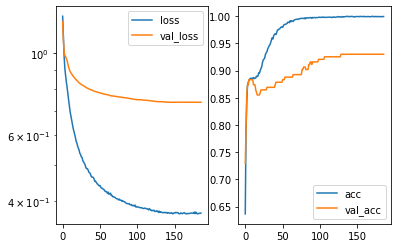

Predicted cell: Cells Probability: [[0.9820354]]
True Cell type: Cells
x [[0.2802598]]
True positional value x 0.2916666666666667
y [[0.531291]]
True positional value y 0.7083333333333334


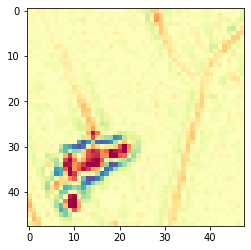

Epoch 187/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.3696 - acc: 0.9998 - val_loss: 0.7377 - val_acc: 0.9299

Epoch 00187: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.737653486082487, 'val_acc': 0.9299065192169118, 'loss': 0.36963527457089695, 'acc': 0.9997536341349283, 'lr': 9.999999e-18}


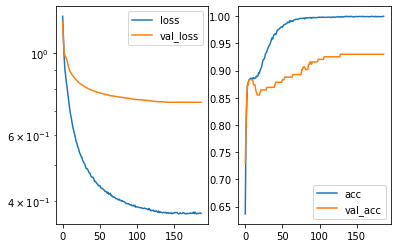

Predicted cell: Cells Probability: [[0.9892371]]
True Cell type: Cells
x [[0.6427409]]
True positional value x 0.7083333333333334
y [[0.24461253]]
True positional value y 0.2916666666666667


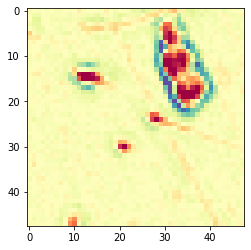

Epoch 188/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.3701 - acc: 0.9990 - val_loss: 0.7377 - val_acc: 0.9299

Epoch 00188: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.7376546737189605, 'val_acc': 0.9299065192169118, 'loss': 0.37013892481026905, 'acc': 0.9990145365397135, 'lr': 9.999999e-18}


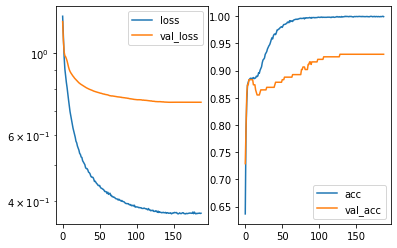

Predicted cell: Cells Probability: [[0.9819828]]
True Cell type: Cells
x [[0.3971767]]
True positional value x 0.2916666666666667
y [[0.28955778]]
True positional value y 0.2916666666666667


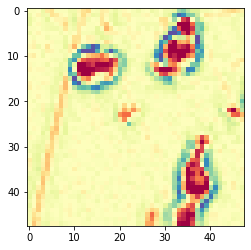

Epoch 189/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.3698 - acc: 0.9995 - val_loss: 0.7377 - val_acc: 0.9299

Epoch 00189: ReduceLROnPlateau reducing learning rate to 9.999999010570977e-19.

Epoch 00189: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.7377092615466252, 'val_acc': 0.9299065192169118, 'loss': 0.3697721354991939, 'acc': 0.9995072682698568, 'lr': 9.999999e-18}


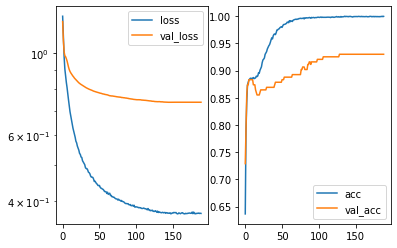

Predicted cell: Cells Probability: [[0.95112383]]
True Cell type: Cells
x [[0.3944249]]
True positional value x 0.7083333333333334
y [[0.722257]]
True positional value y 0.5


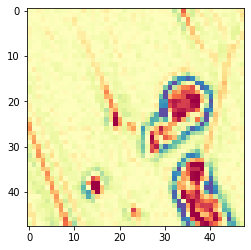

Epoch 190/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.3713 - acc: 0.9988 - val_loss: 0.7377 - val_acc: 0.9299

Epoch 00190: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.7377344347606195, 'val_acc': 0.9299065192169118, 'loss': 0.37125692201764987, 'acc': 0.998768170674642, 'lr': 9.999999e-19}


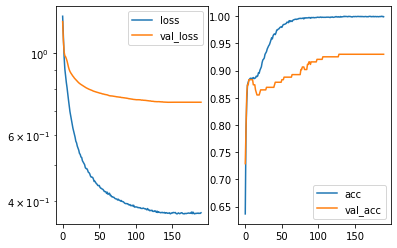

Predicted cell: Cells Probability: [[0.9982444]]
True Cell type: Cells
x [[0.16690618]]
True positional value x 0.2916666666666667
y [[0.717564]]
True positional value y 0.5


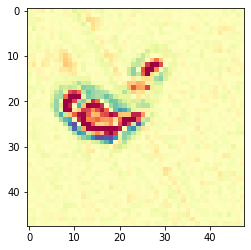

Epoch 191/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.3709 - acc: 0.9988 - val_loss: 0.7377 - val_acc: 0.9299

Epoch 00191: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.7377399763214254, 'val_acc': 0.9299065192169118, 'loss': 0.37089803303865176, 'acc': 0.998768170674642, 'lr': 9.999999e-19}


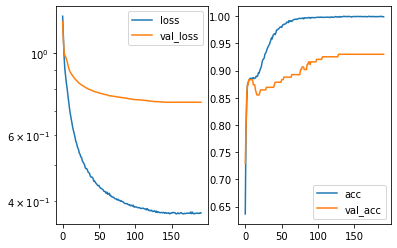

Predicted cell: Cells Probability: [[0.9954991]]
True Cell type: Cells
x [[0.37545043]]
True positional value x 0.7083333333333334
y [[0.4698562]]
True positional value y 0.2916666666666667


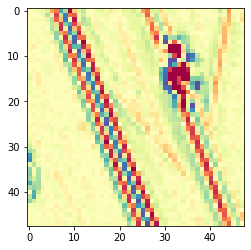

Epoch 192/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.3725 - acc: 0.9990 - val_loss: 0.7377 - val_acc: 0.9299

Epoch 00192: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.7376697341972422, 'val_acc': 0.9299065192169118, 'loss': 0.3724752224836775, 'acc': 0.9990145365397135, 'lr': 9.999999e-19}


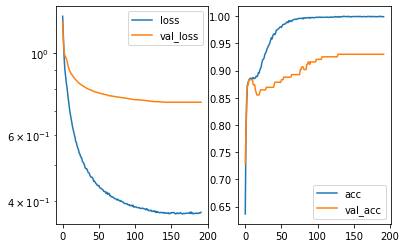

Predicted cell: Cells Probability: [[0.98157805]]
True Cell type: Cells
x [[0.58353174]]
True positional value x 0.2916666666666667
y [[0.6216108]]
True positional value y 0.5


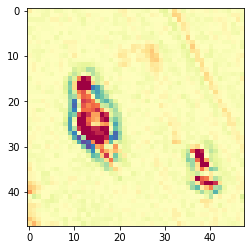

Epoch 193/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.3699 - acc: 0.9993 - val_loss: 0.7377 - val_acc: 0.9299

Epoch 00193: ReduceLROnPlateau reducing learning rate to 9.999999424161285e-20.

Epoch 00193: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.737676975883056, 'val_acc': 0.9299065192169118, 'loss': 0.36994120093894495, 'acc': 0.9992609024047852, 'lr': 9.999999e-19}


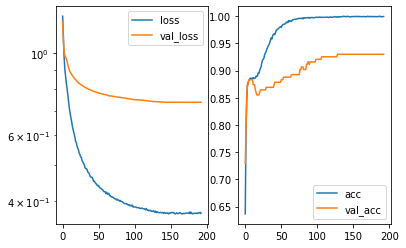

Predicted cell: Cells Probability: [[0.9992306]]
True Cell type: Cells
x [[0.45153382]]
True positional value x 0.7083333333333334
y [[0.24220034]]
True positional value y 0.2916666666666667


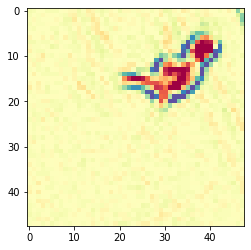

Epoch 194/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.3725 - acc: 0.9995 - val_loss: 0.7377 - val_acc: 0.9299

Epoch 00194: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.7376957897828004, 'val_acc': 0.9299065192169118, 'loss': 0.37249897038974794, 'acc': 0.9995072682698568, 'lr': 1e-19}


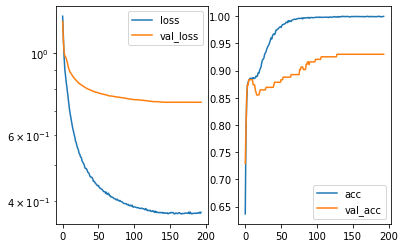

Predicted cell: Cells Probability: [[0.88125443]]
True Cell type: Cells
x [[0.53575075]]
True positional value x 0.2916666666666667
y [[0.6135734]]
True positional value y 0.7083333333333334


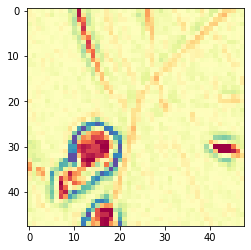

Epoch 195/250
4059/4059 [==============================] - 4s 1ms/step - loss: 0.3706 - acc: 0.9985 - val_loss: 0.7377 - val_acc: 0.9299

Epoch 00195: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.7376921733963155, 'val_acc': 0.9299065192169118, 'loss': 0.37061095319231263, 'acc': 0.9985218042221877, 'lr': 1e-19}


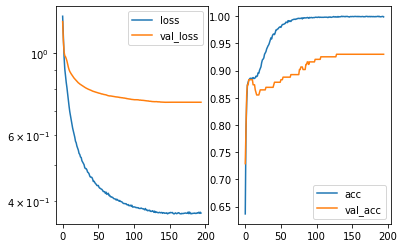

Predicted cell: Normal Probability: [[0.6991269]]
True Cell type: Normal
x [[0.6372361]]
True positional value x 0.5
y [[0.5866586]]
True positional value y 0.5


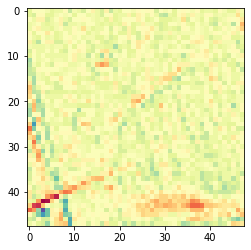

Epoch 196/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.3711 - acc: 0.9993 - val_loss: 0.7376 - val_acc: 0.9299

Epoch 00196: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.7375695048091567, 'val_acc': 0.9299065192169118, 'loss': 0.3710851682380785, 'acc': 0.9992609024047852, 'lr': 1e-19}


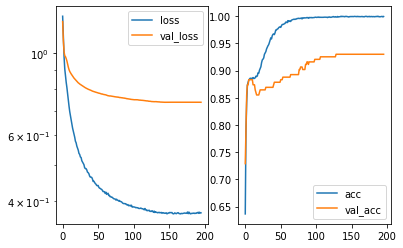

Predicted cell: Cells Probability: [[0.8957584]]
True Cell type: Cells
x [[0.4865976]]
True positional value x 0.7083333333333334
y [[0.61412114]]
True positional value y 0.2916666666666667


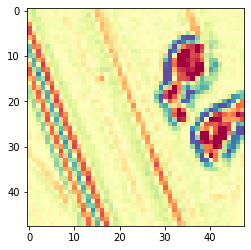

Epoch 197/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.3703 - acc: 0.9993 - val_loss: 0.7376 - val_acc: 0.9299

Epoch 00197: ReduceLROnPlateau reducing learning rate to 9.999999682655225e-21.

Epoch 00197: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.737648433614, 'val_acc': 0.9299065192169118, 'loss': 0.3702692792212385, 'acc': 0.9992609024047852, 'lr': 1e-19}


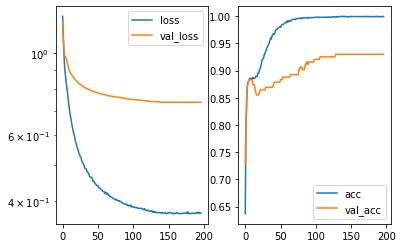

Predicted cell: Cells Probability: [[0.99689156]]
True Cell type: Cells
x [[0.47106338]]
True positional value x 0.7083333333333334
y [[0.38508412]]
True positional value y 0.5


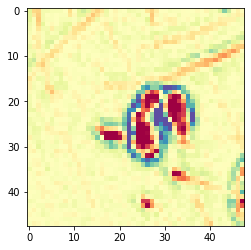

Epoch 198/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.3704 - acc: 0.9990 - val_loss: 0.7377 - val_acc: 0.9299

Epoch 00198: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.7377125047077643, 'val_acc': 0.9299065192169118, 'loss': 0.3704066227210158, 'acc': 0.9990145365397135, 'lr': 1e-20}


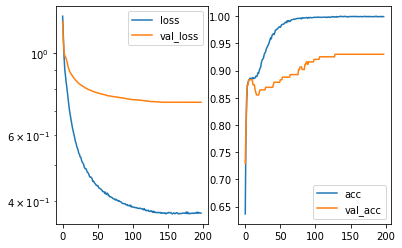

Predicted cell: Cells Probability: [[0.9857956]]
True Cell type: Cells
x [[0.33626577]]
True positional value x 0.2916666666666667
y [[0.83656913]]
True positional value y 0.7083333333333334


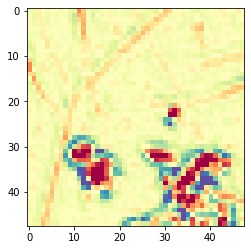

Epoch 199/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.3692 - acc: 0.9998 - val_loss: 0.7377 - val_acc: 0.9299

Epoch 00199: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.737653313396133, 'val_acc': 0.9299065192169118, 'loss': 0.3691702401162251, 'acc': 0.9997536341349283, 'lr': 1e-20}


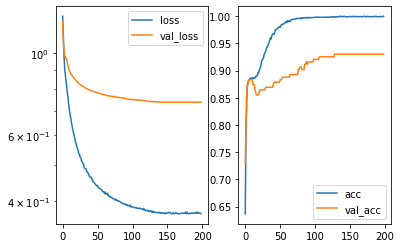

Predicted cell: Cells Probability: [[0.9939653]]
True Cell type: Cells
x [[0.3473659]]
True positional value x 0.2916666666666667
y [[0.52256864]]
True positional value y 0.2916666666666667


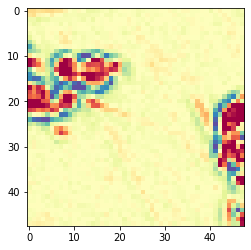

Epoch 200/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.3712 - acc: 0.9990 - val_loss: 0.7377 - val_acc: 0.9299

Epoch 00200: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.7376589240314805, 'val_acc': 0.9299065192169118, 'loss': 0.3711952824227238, 'acc': 0.9990145365397135, 'lr': 1e-20}


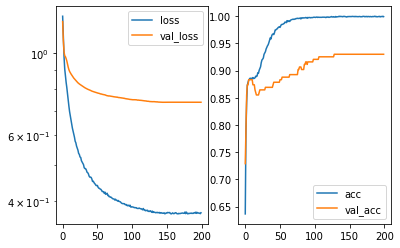

Predicted cell: Cells Probability: [[0.9925444]]
True Cell type: Cells
x [[0.28839025]]
True positional value x 0.2916666666666667
y [[0.28766802]]
True positional value y 0.5


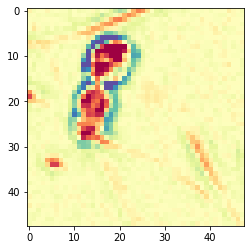

Epoch 201/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.3698 - acc: 0.9995 - val_loss: 0.7377 - val_acc: 0.9299

Epoch 00201: ReduceLROnPlateau reducing learning rate to 9.999999682655225e-22.

Epoch 00201: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.7376999342552969, 'val_acc': 0.9299065192169118, 'loss': 0.3698358086786061, 'acc': 0.9995072682698568, 'lr': 1e-20}


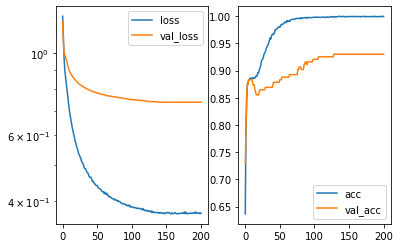

Predicted cell: Cells Probability: [[0.98600334]]
True Cell type: Cells
x [[0.6032107]]
True positional value x 0.2916666666666667
y [[0.78325313]]
True positional value y 0.7083333333333334


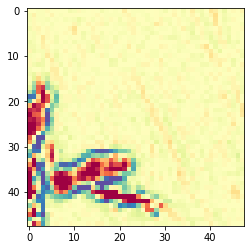

Epoch 202/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.3709 - acc: 0.9990 - val_loss: 0.7377 - val_acc: 0.9299

Epoch 00202: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.7377140878516937, 'val_acc': 0.9299065192169118, 'loss': 0.37089816638917633, 'acc': 0.9990145365397135, 'lr': 1e-21}


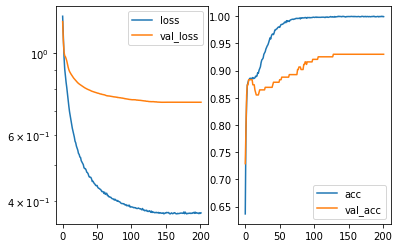

Predicted cell: Cells Probability: [[0.99096394]]
True Cell type: Cells
x [[0.27349344]]
True positional value x 0.5
y [[0.40770343]]
True positional value y 0.5


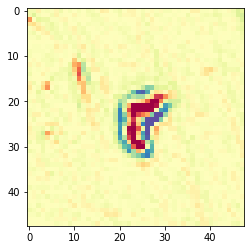

Epoch 203/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.3696 - acc: 0.9993 - val_loss: 0.7377 - val_acc: 0.9299

Epoch 00203: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.7376783128096679, 'val_acc': 0.9299065192169118, 'loss': 0.36958056774213416, 'acc': 0.9992609024047852, 'lr': 1e-21}


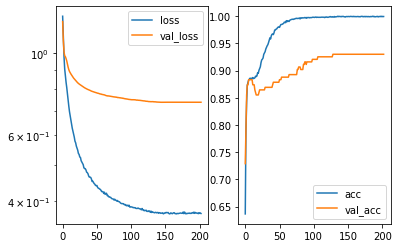

Predicted cell: Cells Probability: [[0.5842989]]
True Cell type: Normal
x [[0.56960976]]
True positional value x 0.5
y [[0.6340652]]
True positional value y 0.5


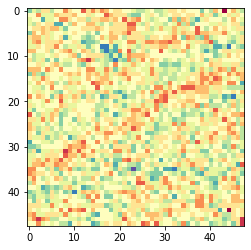

Epoch 204/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.3729 - acc: 0.9985 - val_loss: 0.7377 - val_acc: 0.9299

Epoch 00204: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.737699654614814, 'val_acc': 0.9299065192169118, 'loss': 0.3728850298061192, 'acc': 0.9985218042221877, 'lr': 1e-21}


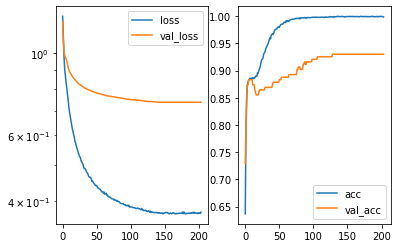

Predicted cell: Cells Probability: [[0.9003308]]
True Cell type: Cells
x [[0.5867873]]
True positional value x 0.7083333333333334
y [[0.8288715]]
True positional value y 0.7083333333333334


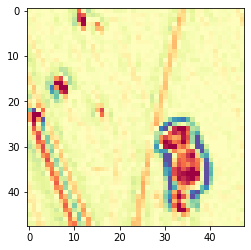

Epoch 205/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.3704 - acc: 0.9990 - val_loss: 0.7377 - val_acc: 0.9299

Epoch 00205: ReduceLROnPlateau reducing learning rate to 9.999999682655225e-23.

Epoch 00205: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.7377041622857067, 'val_acc': 0.9299065192169118, 'loss': 0.370411792172091, 'acc': 0.9990145365397135, 'lr': 1e-21}


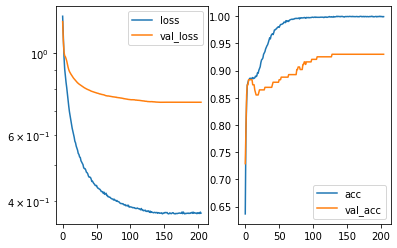

Predicted cell: Cells Probability: [[0.99587834]]
True Cell type: Cells
x [[0.4549987]]
True positional value x 0.7083333333333334
y [[0.4760972]]
True positional value y 0.7083333333333334


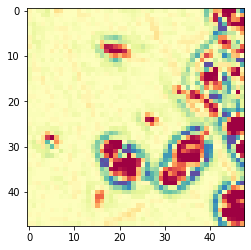

Epoch 206/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.3701 - acc: 0.9985 - val_loss: 0.7378 - val_acc: 0.9299

Epoch 00206: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.7377632433008925, 'val_acc': 0.9299065192169118, 'loss': 0.3701213194939796, 'acc': 0.9985218048095703, 'lr': 9.9999997e-23}


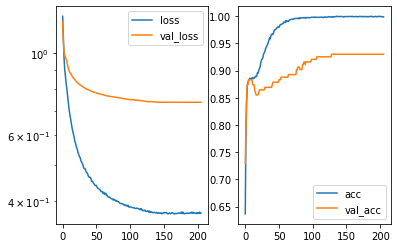

Predicted cell: Cells Probability: [[0.97729415]]
True Cell type: Cells
x [[0.5967742]]
True positional value x 0.7083333333333334
y [[0.6424413]]
True positional value y 0.5


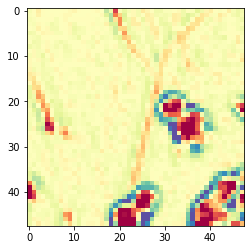

Epoch 207/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.3694 - acc: 0.9993 - val_loss: 0.7377 - val_acc: 0.9299

Epoch 00207: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.7377107845288571, 'val_acc': 0.9299065192169118, 'loss': 0.3694041446971024, 'acc': 0.9992609024047852, 'lr': 9.9999997e-23}


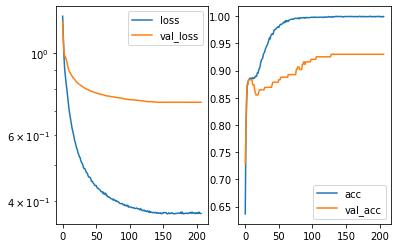

Predicted cell: Cells Probability: [[0.9969055]]
True Cell type: Cells
x [[0.47060364]]
True positional value x 0.7083333333333334
y [[0.38498828]]
True positional value y 0.5


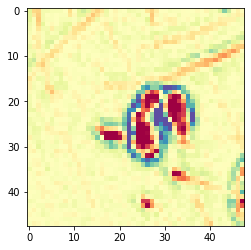

Epoch 208/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.3697 - acc: 0.9993 - val_loss: 0.7378 - val_acc: 0.9299

Epoch 00208: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.7377521746626524, 'val_acc': 0.9299065192169118, 'loss': 0.3696758846662173, 'acc': 0.9992609024047852, 'lr': 9.9999997e-23}


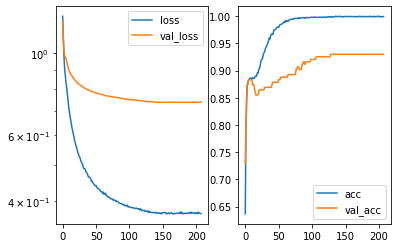

Predicted cell: Cells Probability: [[0.99164724]]
True Cell type: Cells
x [[0.5909998]]
True positional value x 0.5
y [[0.6064962]]
True positional value y 0.5


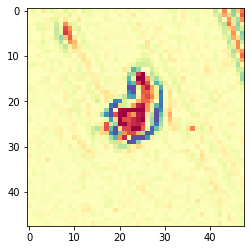

Epoch 209/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.3705 - acc: 0.9993 - val_loss: 0.7377 - val_acc: 0.9299

Epoch 00209: ReduceLROnPlateau reducing learning rate to 9.999999682655227e-24.

Epoch 00209: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.7377249592932585, 'val_acc': 0.9299065192169118, 'loss': 0.3704971123590467, 'acc': 0.9992609024047852, 'lr': 9.9999997e-23}


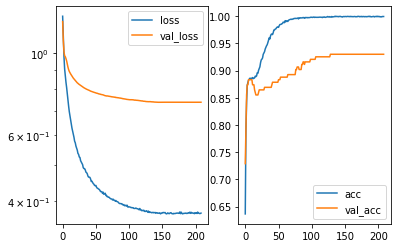

Predicted cell: Cells Probability: [[0.99314076]]
True Cell type: Cells
x [[0.40157378]]
True positional value x 0.2916666666666667
y [[0.659411]]
True positional value y 0.5


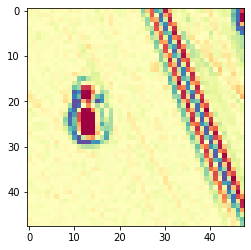

Epoch 210/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.3684 - acc: 0.9998 - val_loss: 0.7377 - val_acc: 0.9299

Epoch 00210: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.7377290903964889, 'val_acc': 0.9299065192169118, 'loss': 0.3684005661826029, 'acc': 0.9997536341349283, 'lr': 1e-23}


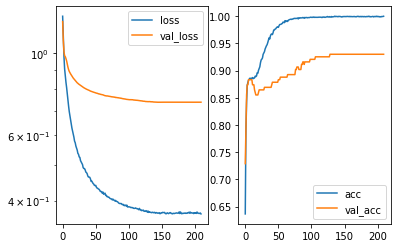

Predicted cell: Cells Probability: [[0.9820387]]
True Cell type: Cells
x [[0.1498563]]
True positional value x 0.2916666666666667
y [[0.59365475]]
True positional value y 0.7083333333333334


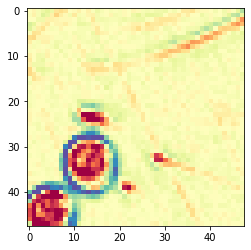

Epoch 211/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.3708 - acc: 0.9990 - val_loss: 0.7377 - val_acc: 0.9299

Epoch 00211: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.7376892355000861, 'val_acc': 0.9299065192169118, 'loss': 0.37075667471303, 'acc': 0.999014535952331, 'lr': 1e-23}


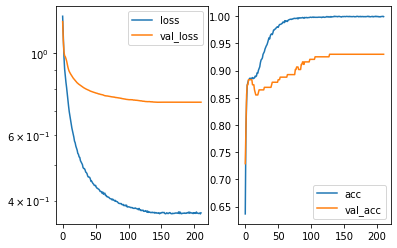

Predicted cell: Cells Probability: [[0.9644627]]
True Cell type: Cells
x [[0.6695478]]
True positional value x 0.5
y [[0.35343188]]
True positional value y 0.2916666666666667


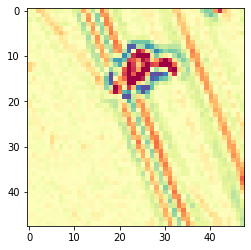

Epoch 212/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.3696 - acc: 0.9988 - val_loss: 0.7377 - val_acc: 0.9299

Epoch 00212: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.7376524176553031, 'val_acc': 0.9299065192169118, 'loss': 0.36964057105813425, 'acc': 0.998768170674642, 'lr': 1e-23}


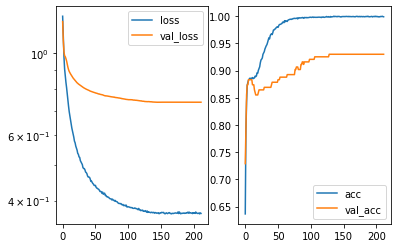

Predicted cell: Cells Probability: [[0.998245]]
True Cell type: Cells
x [[0.16705547]]
True positional value x 0.2916666666666667
y [[0.7171205]]
True positional value y 0.5


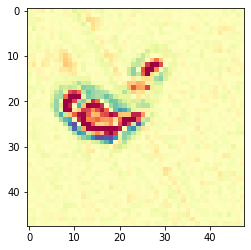

Epoch 213/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.3711 - acc: 0.9993 - val_loss: 0.7377 - val_acc: 0.9299

Epoch 00213: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.7376766149128708, 'val_acc': 0.9299065192169118, 'loss': 0.37108303313920227, 'acc': 0.9992609024047852, 'lr': 1e-23}


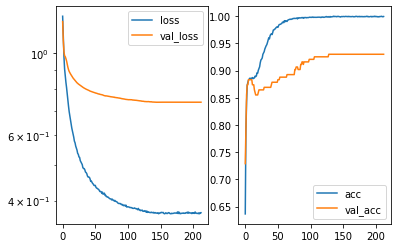

Predicted cell: Cells Probability: [[0.966028]]
True Cell type: Cells
x [[0.6650716]]
True positional value x 0.5
y [[0.5800814]]
True positional value y 0.5


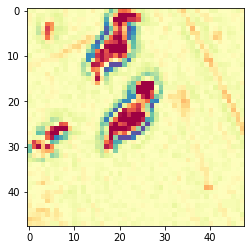

Epoch 214/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.3698 - acc: 0.9995 - val_loss: 0.7376 - val_acc: 0.9299

Epoch 00214: ReduceLROnPlateau reducing learning rate to 9.999999998199588e-25.

Epoch 00214: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.7376282148272078, 'val_acc': 0.9299065192169118, 'loss': 0.369762975121402, 'acc': 0.9995072682698568, 'lr': 1e-23}


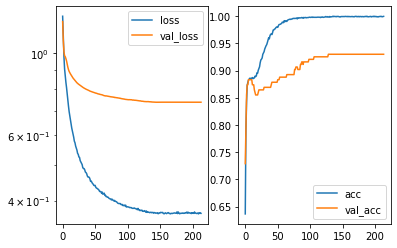

Predicted cell: Cells Probability: [[0.9922233]]
True Cell type: Cells
x [[0.2555141]]
True positional value x 0.7083333333333334
y [[0.32267857]]
True positional value y 0.2916666666666667


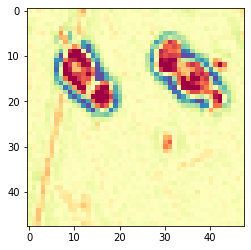

Epoch 215/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.3715 - acc: 0.9995 - val_loss: 0.7377 - val_acc: 0.9299

Epoch 00215: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.737701352511611, 'val_acc': 0.9299065192169118, 'loss': 0.37153545196022886, 'acc': 0.9995072682698568, 'lr': 1e-24}


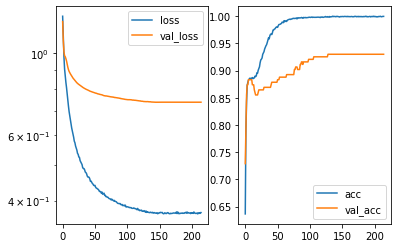

Predicted cell: Cells Probability: [[0.9169282]]
True Cell type: Cells
x [[0.6093082]]
True positional value x 0.7083333333333334
y [[0.72845703]]
True positional value y 0.7083333333333334


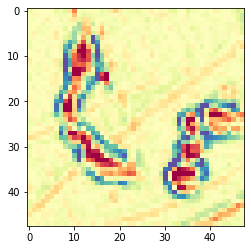

Epoch 216/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.3696 - acc: 0.9993 - val_loss: 0.7377 - val_acc: 0.9299

Epoch 00216: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.7376856915304594, 'val_acc': 0.9299065192169118, 'loss': 0.3696483310571766, 'acc': 0.9992609024047852, 'lr': 1e-24}


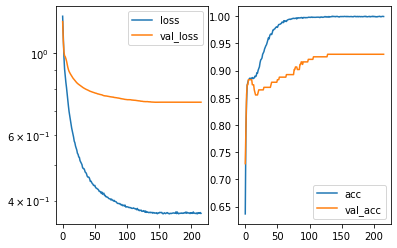

Predicted cell: Cells Probability: [[0.9314137]]
True Cell type: Cells
x [[0.498032]]
True positional value x 0.5
y [[0.45754]]
True positional value y 0.2916666666666667


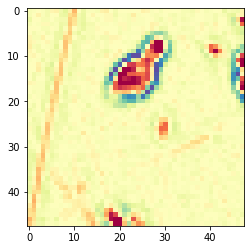

Epoch 217/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.3695 - acc: 0.9995 - val_loss: 0.7378 - val_acc: 0.9299

Epoch 00217: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.7377739498548419, 'val_acc': 0.9299065192169118, 'loss': 0.3695366699638611, 'acc': 0.9995072682698568, 'lr': 1e-24}


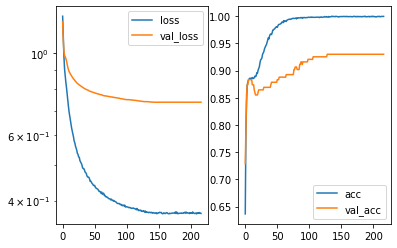

Predicted cell: Cells Probability: [[0.887724]]
True Cell type: Cells
x [[0.48459736]]
True positional value x 0.2916666666666667
y [[0.4851438]]
True positional value y 0.7083333333333334


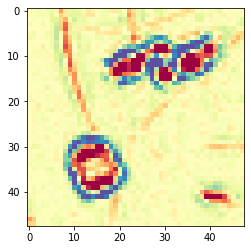

Epoch 218/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.3706 - acc: 0.9993 - val_loss: 0.7378 - val_acc: 0.9299

Epoch 00218: ReduceLROnPlateau reducing learning rate to 1.0000000195414814e-25.

Epoch 00218: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.7378029867867443, 'val_acc': 0.9299065192169118, 'loss': 0.37060261558329244, 'acc': 0.9992609024047852, 'lr': 1e-24}


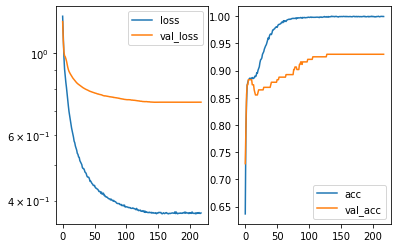

Predicted cell: Cells Probability: [[0.99480563]]
True Cell type: Cells
x [[0.3194155]]
True positional value x 0.2916666666666667
y [[0.4060725]]
True positional value y 0.5


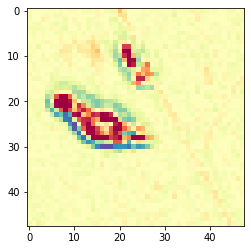

Epoch 219/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.3701 - acc: 0.9995 - val_loss: 0.7378 - val_acc: 0.9299

Epoch 00219: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.7377760566283609, 'val_acc': 0.9299065192169118, 'loss': 0.3700917609426945, 'acc': 0.9995072682698568, 'lr': 1e-25}


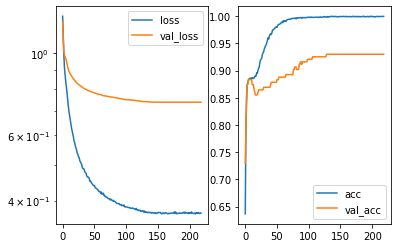

Predicted cell: Cells Probability: [[0.9892075]]
True Cell type: Cells
x [[0.46658024]]
True positional value x 0.2916666666666667
y [[0.63148093]]
True positional value y 0.7083333333333334


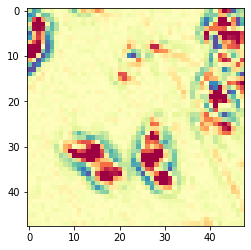

Epoch 220/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.3701 - acc: 0.9990 - val_loss: 0.7378 - val_acc: 0.9299

Epoch 00220: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.7378128332512401, 'val_acc': 0.9299065192169118, 'loss': 0.3700983124388413, 'acc': 0.9990145365397135, 'lr': 1e-25}


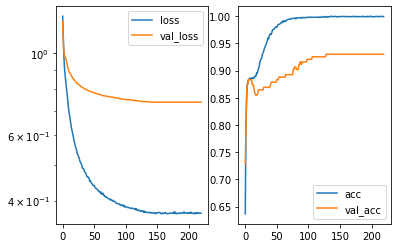

Predicted cell: Cells Probability: [[0.5845787]]
True Cell type: Normal
x [[0.56953245]]
True positional value x 0.5
y [[0.63348466]]
True positional value y 0.5


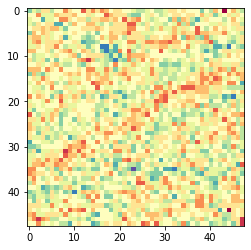

Epoch 221/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.3703 - acc: 0.9995 - val_loss: 0.7378 - val_acc: 0.9299

Epoch 00221: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.7378300740340046, 'val_acc': 0.9299065192169118, 'loss': 0.3703220190453277, 'acc': 0.9995072682698568, 'lr': 1e-25}


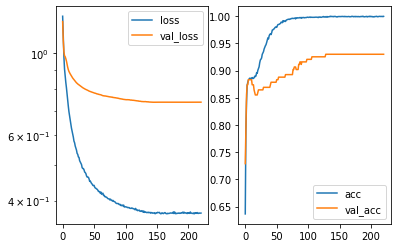

Predicted cell: Cells Probability: [[0.9948315]]
True Cell type: Cells
x [[0.4299811]]
True positional value x 0.5
y [[0.6948872]]
True positional value y 0.7083333333333334


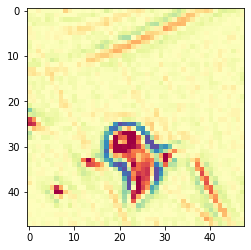

Epoch 222/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.3705 - acc: 0.9995 - val_loss: 0.7378 - val_acc: 0.9299

Epoch 00222: ReduceLROnPlateau reducing learning rate to 1.0000000195414814e-26.

Epoch 00222: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.7377855833445754, 'val_acc': 0.9299065192169118, 'loss': 0.3705238406368593, 'acc': 0.9995072682698568, 'lr': 1e-25}


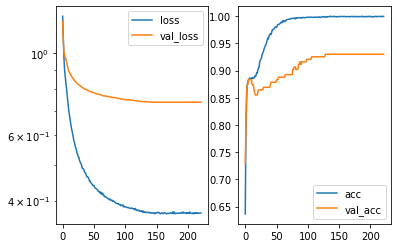

Predicted cell: Cells Probability: [[0.9381806]]
True Cell type: Cells
x [[0.49480867]]
True positional value x 0.7083333333333334
y [[0.34242794]]
True positional value y 0.2916666666666667


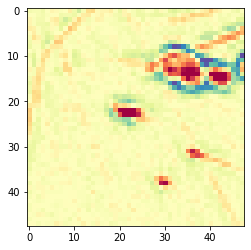

Epoch 223/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.3693 - acc: 0.9995 - val_loss: 0.7377 - val_acc: 0.9299

Epoch 00223: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.7377179270592805, 'val_acc': 0.9299065192169118, 'loss': 0.36931907328134334, 'acc': 0.9995072682698568, 'lr': 1e-26}


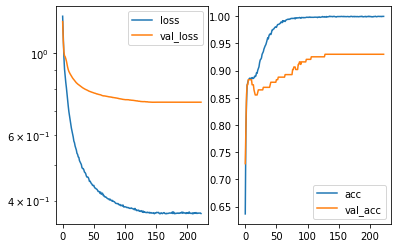

Predicted cell: Cells Probability: [[0.99576855]]
True Cell type: Cells
x [[0.1673985]]
True positional value x 0.7083333333333334
y [[0.51857835]]
True positional value y 0.7083333333333334


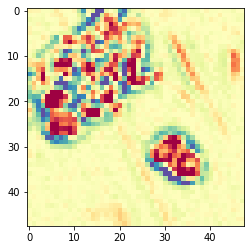

Epoch 224/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.3700 - acc: 0.9993 - val_loss: 0.7377 - val_acc: 0.9299

Epoch 00224: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.7377291037657551, 'val_acc': 0.9299065192169118, 'loss': 0.3699564837960076, 'acc': 0.9992609024047852, 'lr': 1e-26}


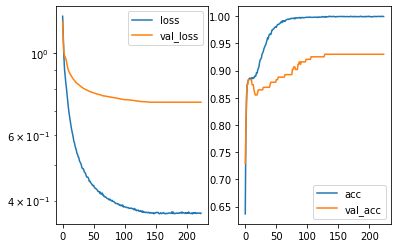

Predicted cell: Cells Probability: [[0.98576945]]
True Cell type: Cells
x [[0.33609235]]
True positional value x 0.2916666666666667
y [[0.836451]]
True positional value y 0.7083333333333334


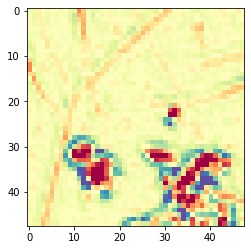

Epoch 225/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.3695 - acc: 0.9993 - val_loss: 0.7377 - val_acc: 0.9299

Epoch 00225: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.7377157211303711, 'val_acc': 0.9299065192169118, 'loss': 0.3695481017353089, 'acc': 0.9992609024047852, 'lr': 1e-26}


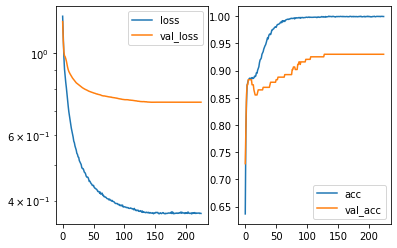

Predicted cell: Cells Probability: [[0.9845604]]
True Cell type: Cells
x [[0.429463]]
True positional value x 0.2916666666666667
y [[0.21805157]]
True positional value y 0.2916666666666667


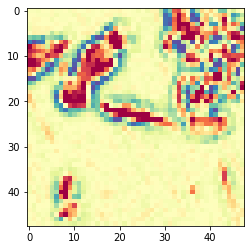

Epoch 226/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.3718 - acc: 0.9993 - val_loss: 0.7377 - val_acc: 0.9299

Epoch 00226: ReduceLROnPlateau reducing learning rate to 9.999999887266024e-28.

Epoch 00226: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.7377281612324937, 'val_acc': 0.9299065192169118, 'loss': 0.371834524087819, 'acc': 0.9992609024047852, 'lr': 1e-26}


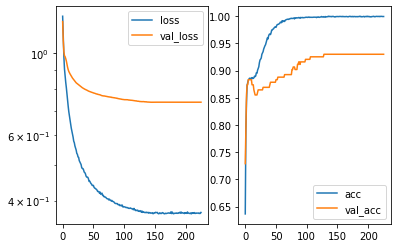

Predicted cell: Cells Probability: [[0.98987377]]
True Cell type: Cells
x [[0.4335]]
True positional value x 0.5
y [[0.52018416]]
True positional value y 0.2916666666666667


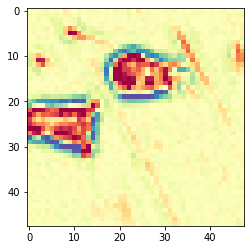

Epoch 227/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.3709 - acc: 0.9993 - val_loss: 0.7378 - val_acc: 0.9299

Epoch 00227: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.7378196114691619, 'val_acc': 0.9299065192169118, 'loss': 0.37093195714924715, 'acc': 0.9992609024047852, 'lr': 1e-27}


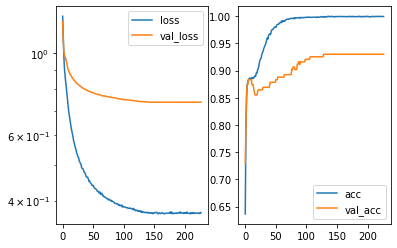

Predicted cell: Cells Probability: [[0.9965922]]
True Cell type: Cells
x [[0.85182846]]
True positional value x 0.7083333333333334
y [[0.49998713]]
True positional value y 0.5


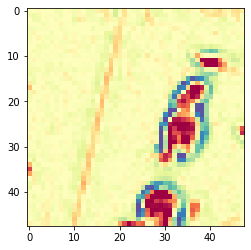

Epoch 228/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.3695 - acc: 0.9993 - val_loss: 0.7378 - val_acc: 0.9299

Epoch 00228: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.73776869016273, 'val_acc': 0.9299065192169118, 'loss': 0.36953325641216916, 'acc': 0.9992609024047852, 'lr': 1e-27}


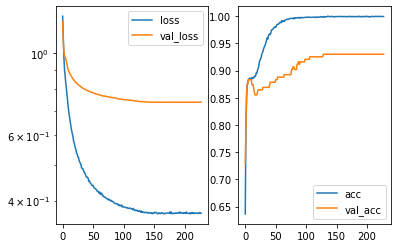

Predicted cell: Cells Probability: [[0.99307054]]
True Cell type: Cells
x [[0.70826316]]
True positional value x 0.5
y [[0.32003248]]
True positional value y 0.7083333333333334


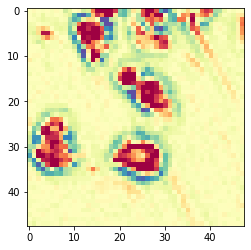

Epoch 229/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.3694 - acc: 0.9993 - val_loss: 0.7377 - val_acc: 0.9299

Epoch 00229: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.737740099987137, 'val_acc': 0.9299065192169118, 'loss': 0.3694446039599249, 'acc': 0.9992609024047852, 'lr': 1e-27}


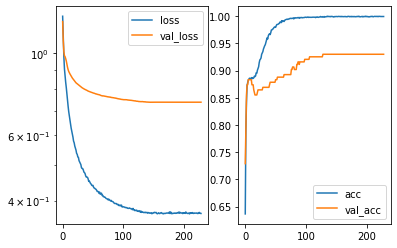

Predicted cell: Cells Probability: [[0.9974322]]
True Cell type: Cells
x [[0.54170907]]
True positional value x 0.2916666666666667
y [[0.22821355]]
True positional value y 0.2916666666666667


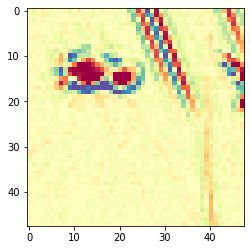

Epoch 230/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.3708 - acc: 0.9988 - val_loss: 0.7378 - val_acc: 0.9299

Epoch 00230: ReduceLROnPlateau reducing learning rate to 1.0000000272452012e-28.

Epoch 00230: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.7377951245441615, 'val_acc': 0.9299065192169118, 'loss': 0.3708031632448541, 'acc': 0.998768170674642, 'lr': 1e-27}


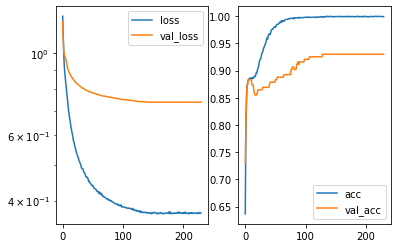

Predicted cell: Cells Probability: [[0.9943036]]
True Cell type: Cells
x [[0.69884527]]
True positional value x 0.7083333333333334
y [[0.4956161]]
True positional value y 0.5


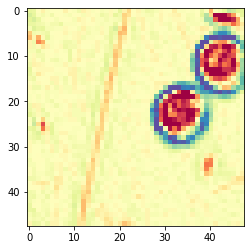

Epoch 231/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.3710 - acc: 0.9988 - val_loss: 0.7378 - val_acc: 0.9299

Epoch 00231: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.7378193997891149, 'val_acc': 0.9299065192169118, 'loss': 0.37096855334385065, 'acc': 0.998768170674642, 'lr': 1e-28}


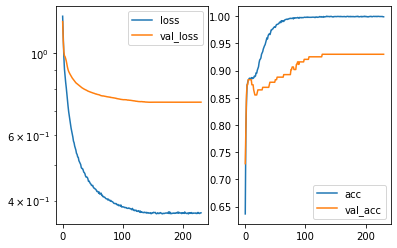

Predicted cell: Cells Probability: [[0.990225]]
True Cell type: Cells
x [[0.8163443]]
True positional value x 0.7083333333333334
y [[0.71302134]]
True positional value y 0.7083333333333334


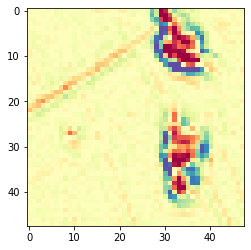

Epoch 232/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.3692 - acc: 0.9995 - val_loss: 0.7378 - val_acc: 0.9299

Epoch 00232: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.7378464547273155, 'val_acc': 0.9299065192169118, 'loss': 0.3692071015140522, 'acc': 0.9995072682698568, 'lr': 1e-28}


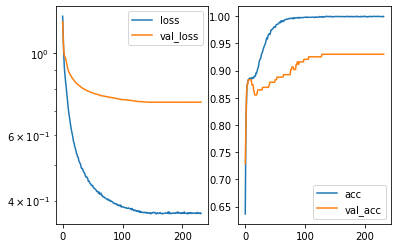

Predicted cell: Cells Probability: [[0.98879087]]
True Cell type: Cells
x [[0.877284]]
True positional value x 0.7083333333333334
y [[0.8460101]]
True positional value y 0.7083333333333334


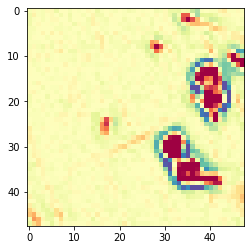

Epoch 233/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.3692 - acc: 0.9993 - val_loss: 0.7378 - val_acc: 0.9299

Epoch 00233: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.7377601616850523, 'val_acc': 0.9299065192169118, 'loss': 0.36918554792236186, 'acc': 0.9992609024047852, 'lr': 1e-28}


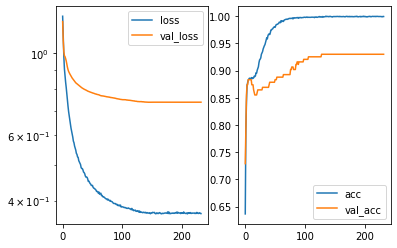

Predicted cell: Cells Probability: [[0.9897564]]
True Cell type: Cells
x [[0.6409847]]
True positional value x 0.7083333333333334
y [[0.7734819]]
True positional value y 0.7083333333333334


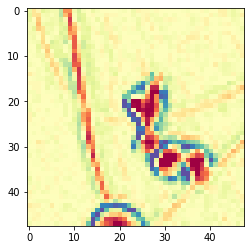

Epoch 234/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.3700 - acc: 0.9993 - val_loss: 0.7377 - val_acc: 0.9299

Epoch 00234: ReduceLROnPlateau reducing learning rate to 1.0000000031710769e-29.

Epoch 00234: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.7377415082165014, 'val_acc': 0.9299065192169118, 'loss': 0.36995762364856716, 'acc': 0.9992609024047852, 'lr': 1e-28}


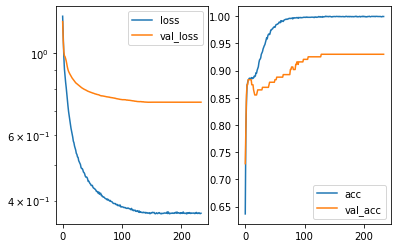

Predicted cell: Cells Probability: [[0.9865433]]
True Cell type: Cells
x [[0.693943]]
True positional value x 0.7083333333333334
y [[0.10439908]]
True positional value y 0.2916666666666667


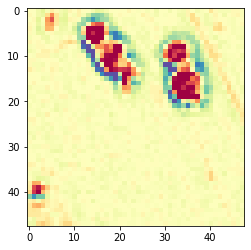

Epoch 235/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.3703 - acc: 0.9990 - val_loss: 0.7378 - val_acc: 0.9299

Epoch 00235: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.7377925253360071, 'val_acc': 0.9299065192169118, 'loss': 0.3703342956417621, 'acc': 0.9990145365397135, 'lr': 1e-29}


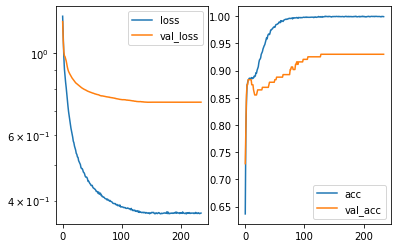

Predicted cell: Cells Probability: [[0.97211516]]
True Cell type: Cells
x [[0.301762]]
True positional value x 0.2916666666666667
y [[0.6729749]]
True positional value y 0.2916666666666667


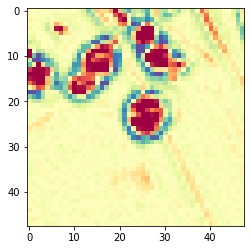

Epoch 236/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.3695 - acc: 0.9998 - val_loss: 0.7378 - val_acc: 0.9299

Epoch 00236: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.7377639529861022, 'val_acc': 0.9299065192169118, 'loss': 0.3694594251049302, 'acc': 0.9997536341349283, 'lr': 1e-29}


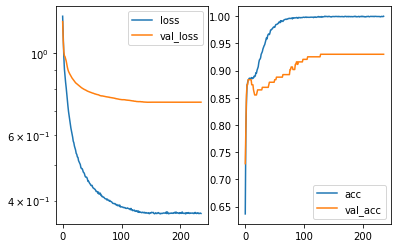

Predicted cell: Cells Probability: [[0.9968912]]
True Cell type: Cells
x [[0.4710037]]
True positional value x 0.7083333333333334
y [[0.38530183]]
True positional value y 0.5


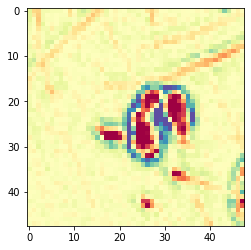

Epoch 237/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.3719 - acc: 0.9988 - val_loss: 0.7378 - val_acc: 0.9299

Epoch 00237: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.7378008053681561, 'val_acc': 0.9299065192169118, 'loss': 0.37189711699728956, 'acc': 0.998768170674642, 'lr': 1e-29}


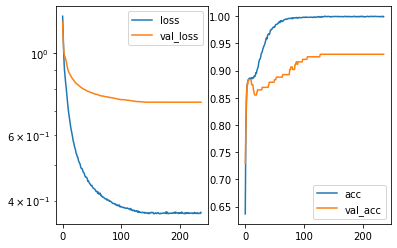

Predicted cell: Cells Probability: [[0.9854996]]
True Cell type: Cells
x [[0.2399037]]
True positional value x 0.5
y [[0.45733854]]
True positional value y 0.5


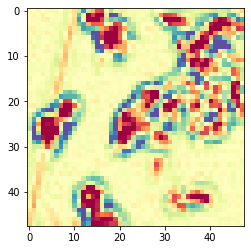

Epoch 238/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.3703 - acc: 0.9995 - val_loss: 0.7378 - val_acc: 0.9299

Epoch 00238: ReduceLROnPlateau reducing learning rate to 1.0000000031710769e-30.

Epoch 00238: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.7378131752816316, 'val_acc': 0.9299065192169118, 'loss': 0.3703162858318184, 'acc': 0.9995072682698568, 'lr': 1e-29}


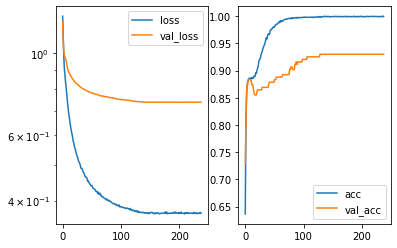

Predicted cell: Cells Probability: [[0.99823904]]
True Cell type: Cells
x [[0.16682817]]
True positional value x 0.2916666666666667
y [[0.7180832]]
True positional value y 0.5


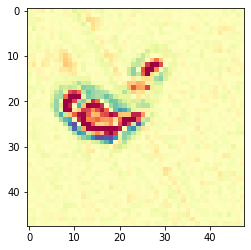

Epoch 239/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.3701 - acc: 0.9990 - val_loss: 0.7378 - val_acc: 0.9299

Epoch 00239: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.7377703267837239, 'val_acc': 0.9299065192169118, 'loss': 0.3701382086000351, 'acc': 0.9990145365397135, 'lr': 1e-30}


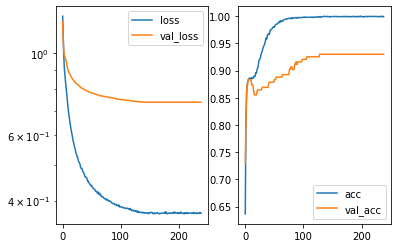

Predicted cell: Cells Probability: [[0.9970024]]
True Cell type: Cells
x [[0.734531]]
True positional value x 0.7083333333333334
y [[0.48252743]]
True positional value y 0.5


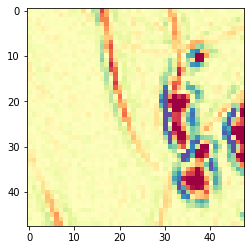

Epoch 240/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.3703 - acc: 0.9988 - val_loss: 0.7377 - val_acc: 0.9299

Epoch 00240: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.7377259976395937, 'val_acc': 0.9299065192169118, 'loss': 0.3703369250524276, 'acc': 0.998768170674642, 'lr': 1e-30}


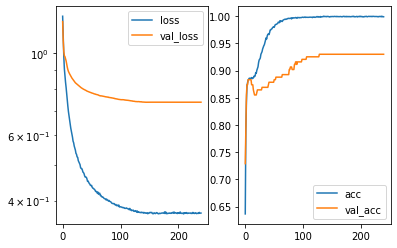

Predicted cell: Cells Probability: [[0.99224865]]
True Cell type: Cells
x [[0.3326798]]
True positional value x 0.2916666666666667
y [[0.48289552]]
True positional value y 0.2916666666666667


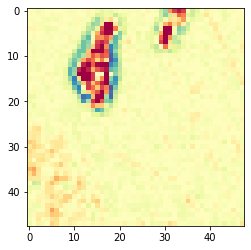

Epoch 241/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.3714 - acc: 0.9990 - val_loss: 0.7378 - val_acc: 0.9299

Epoch 00241: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.7378218630763972, 'val_acc': 0.9299065192169118, 'loss': 0.37140831545116454, 'acc': 0.9990145365397135, 'lr': 1e-30}


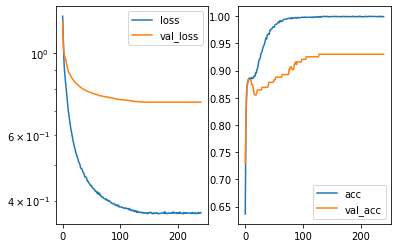

Predicted cell: Cells Probability: [[0.9613432]]
True Cell type: Normal
x [[0.46671706]]
True positional value x 0.5
y [[0.46292233]]
True positional value y 0.5


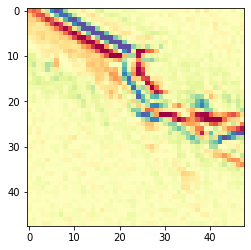

Epoch 242/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.3702 - acc: 0.9998 - val_loss: 0.7379 - val_acc: 0.9299

Epoch 00242: ReduceLROnPlateau reducing learning rate to 1.000000003171077e-31.

Epoch 00242: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.7378545331063672, 'val_acc': 0.9299065192169118, 'loss': 0.37016027010142083, 'acc': 0.9997536341349283, 'lr': 1e-30}


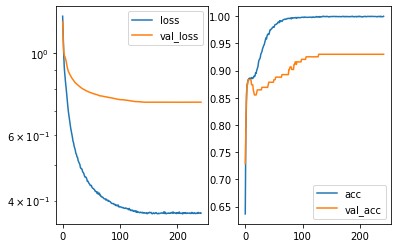

Predicted cell: Cells Probability: [[0.9892866]]
True Cell type: Cells
x [[0.64283705]]
True positional value x 0.7083333333333334
y [[0.24479856]]
True positional value y 0.2916666666666667


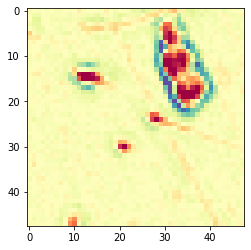

Epoch 243/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.3700 - acc: 0.9990 - val_loss: 0.7378 - val_acc: 0.9299

Epoch 00243: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.7378114707002016, 'val_acc': 0.9299065192169118, 'loss': 0.369992800998582, 'acc': 0.9990145365397135, 'lr': 1e-31}


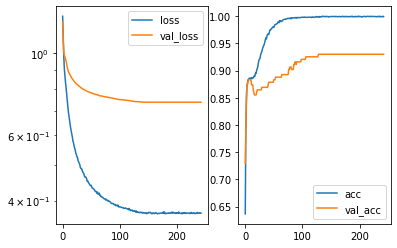

Predicted cell: Cells Probability: [[0.9987801]]
True Cell type: Cells
x [[0.7947181]]
True positional value x 0.7083333333333334
y [[0.34107438]]
True positional value y 0.2916666666666667


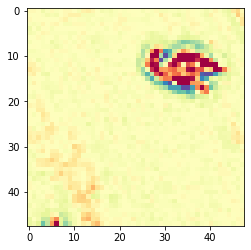

Epoch 244/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.3708 - acc: 0.9993 - val_loss: 0.7378 - val_acc: 0.9299

Epoch 00244: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.7377901712310648, 'val_acc': 0.9299065192169118, 'loss': 0.3708413996318198, 'acc': 0.9992609024047852, 'lr': 1e-31}


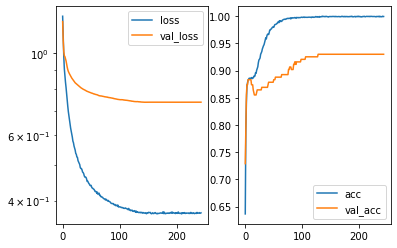

Predicted cell: Cells Probability: [[0.9928994]]
True Cell type: Cells
x [[0.35420886]]
True positional value x 0.2916666666666667
y [[0.7782097]]
True positional value y 0.7083333333333334


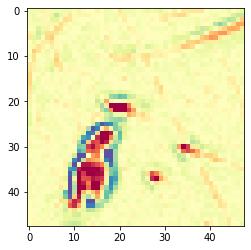

Epoch 245/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.3709 - acc: 0.9985 - val_loss: 0.7378 - val_acc: 0.9299

Epoch 00245: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.7378332726309232, 'val_acc': 0.9299065192169118, 'loss': 0.37086947212726734, 'acc': 0.9985218048095703, 'lr': 1e-31}


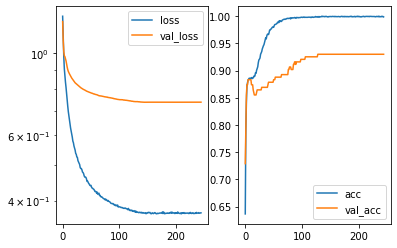

Predicted cell: Cells Probability: [[0.99079543]]
True Cell type: Cells
x [[0.7181692]]
True positional value x 0.5
y [[0.43675324]]
True positional value y 0.2916666666666667


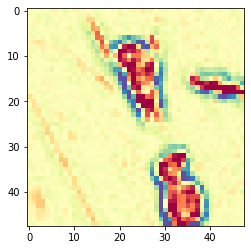

Epoch 246/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.3713 - acc: 0.9993 - val_loss: 0.7378 - val_acc: 0.9299

Epoch 00246: ReduceLROnPlateau reducing learning rate to 9.999999796611899e-33.

Epoch 00246: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.7378044607483338, 'val_acc': 0.9299065192169118, 'loss': 0.371331119403724, 'acc': 0.9992609024047852, 'lr': 1e-31}


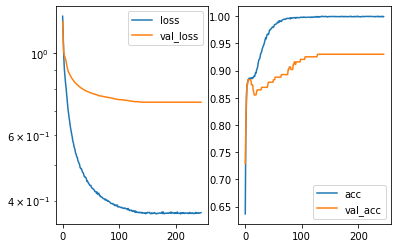

Predicted cell: Cells Probability: [[0.99450374]]
True Cell type: Cells
x [[0.7004524]]
True positional value x 0.2916666666666667
y [[0.21904087]]
True positional value y 0.2916666666666667


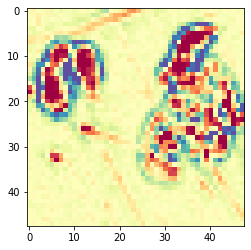

Epoch 247/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.3699 - acc: 0.9993 - val_loss: 0.7378 - val_acc: 0.9299

Epoch 00247: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.7377789889540628, 'val_acc': 0.9299065192169118, 'loss': 0.3698516523097941, 'acc': 0.9992609024047852, 'lr': 9.9999995e-33}


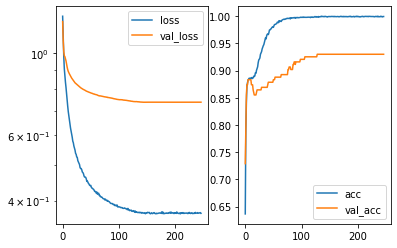

Predicted cell: Cells Probability: [[0.992543]]
True Cell type: Cells
x [[0.50609636]]
True positional value x 0.2916666666666667
y [[0.8065107]]
True positional value y 0.7083333333333334


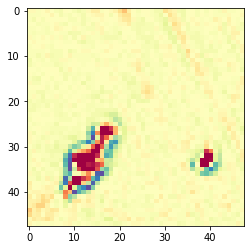

Epoch 248/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.3701 - acc: 0.9990 - val_loss: 0.7378 - val_acc: 0.9299

Epoch 00248: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.7378366316590353, 'val_acc': 0.9299065192169118, 'loss': 0.37013406833130374, 'acc': 0.9990145365397135, 'lr': 9.9999995e-33}


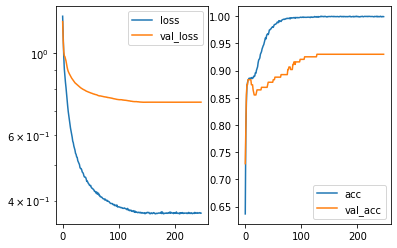

Predicted cell: Cells Probability: [[0.5434496]]
True Cell type: Normal
x [[0.6500684]]
True positional value x 0.5
y [[0.35009506]]
True positional value y 0.5


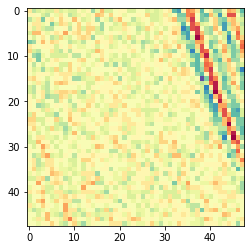

Epoch 249/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.3703 - acc: 0.9993 - val_loss: 0.7377 - val_acc: 0.9299

Epoch 00249: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.7377406392142037, 'val_acc': 0.9299065192169118, 'loss': 0.37027601954619205, 'acc': 0.9992609024047852, 'lr': 9.9999995e-33}


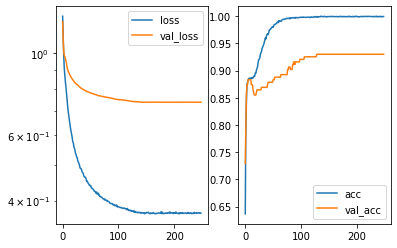

Predicted cell: Cells Probability: [[0.957955]]
True Cell type: Cells
x [[0.2788587]]
True positional value x 0.2916666666666667
y [[0.31036258]]
True positional value y 0.7083333333333334


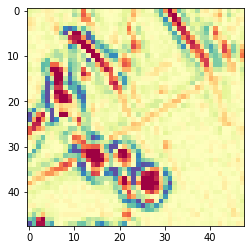

Epoch 250/250
4059/4059 [==============================] - 5s 1ms/step - loss: 0.3708 - acc: 0.9990 - val_loss: 0.7378 - val_acc: 0.9299

Epoch 00250: ReduceLROnPlateau reducing learning rate to 9.999999502738312e-34.

Epoch 00250: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd38SMALL.h5
{'val_loss': 0.737846678662523, 'val_acc': 0.9299065192169118, 'loss': 0.3707817260063056, 'acc': 0.9990145365397135, 'lr': 9.9999995e-33}


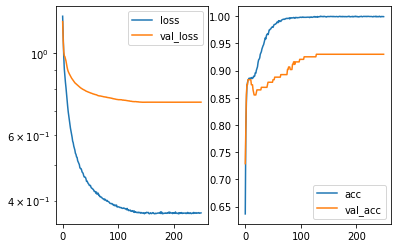

Predicted cell: Cells Probability: [[0.9955974]]
True Cell type: Cells
x [[0.59376633]]
True positional value x 0.5
y [[0.7571677]]
True positional value y 0.7083333333333334


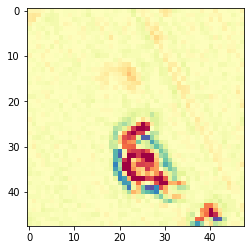

In [5]:
static_model = NEATStatic(config, model_dir, model_name)

static_model.loadData()

static_model.TrainModel()
